In [1]:
# Importar librerías necesarias

from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
from statsmodels.tsa.api import (seasonal_decompose)
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,kpss
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score
from keras.layers import LSTM
from keras.layers import GRU
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro, bartlett
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss
import warnings

# Evitar advertencias
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('weatherAUS.csv')

# ANALISIS EXPLORATORIO DE DATOS (EDA)

* El analisis exploratorio de datos tiene como objetivo obtener informacion sobre el dataset escogido

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
df.tail

<bound method NDFrame.tail of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W  

In [6]:
df.shape

(142193, 24)

# PREPROCESAMIENTO

In [2]:
#agregar histogrmama de frecuencia

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
# Interpolación lineal para todas las columnas numéricas
df.interpolate(method='linear', inplace=True)

In [9]:
df.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  142193.000000  142193.000000  142193.000000  136254.000000   
mean       12.189054      23.228314       2.376365       6.447059   
std         6.402475       7.116966       8.483392       5.535747   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.600000      17.900000       0.000000       3.000000   
50%        12.000000      22.600000       0.000000       5.400000   
75%        16.800000      28.200000       0.800000       8.400000   
max        33.900000      48.100000     371.000000     145.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  136254.000000  142193.000000  142193.000000  142193.000000   
mean        7.658013      39.973821      14.005556      18.764957   
std         3.375156      13.355620       8.880367       8.871893   
min         0.000000       6.000000       0.000000       0.000000   
25%         5.547009      31.000000       7.000000      13.000000   
50%         7.927784      39.000000      13.000000      19.000000   
75%        10.500000      48.000000      19.000000      24.000000   
max        14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  142193.000000  142193.000000  142193.000000  142193.000000   
mean       68.877719      51.464555    1017.366767    1014.974359   
std        19.113684      20.710776       7.022037       6.973601   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.600000    1010.200000   
50%        70.000000      52.000000    1017.300000    1014.900000   
75%        83.000000      65.000000    1022.100000    1019.700000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  142193.000000  142191.000000  142193.000000  142193.000000   
mean        4.650447       4.613358      16.963255      21.723837   
std         2.666258       2.547449       6.510640       6.937013   
min         0.000000       0.000000      -7.200000      -5.400000   
25%         2.000000       2.126394      12.200000      16.700000   
50%         5.000000       5.000000      16.700000      21.200000   
75%         7.000000       7.000000      21.550000      26.500000   
max         9.000000       9.000000      40.200000      46.700000   

             RISK_MM  
count  142193.000000  
mean        2.360682  
std         8.477969  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.800000  
max       371.000000

In [10]:
# Inspeccionar los primeros valores de la columna
print(df['Date'].head())

# Reemplazar posibles valores incorrectos
# Por ejemplo, si hay valores vacíos o nulos que deberían ser reemplazados
df['Date'] = df['Date'].replace('', pd.NA)

# Convertir la columna a datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verificar la conversión
print(df['Date'].head())


0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object
0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]


In [11]:
#establecer fecha como indice
df.set_index('Date', inplace=True)

In [12]:
# Verificar tipos de datos
print("Tipos de datos originales:")
print(df.dtypes)

# Convertir columnas object a int con impresión del mapeo
def convert_object_to_int_with_mapping(df):
    mappings = {}
    for col in df.select_dtypes(include=['object']).columns:
        try:
            # Intentar convertir directamente a int
            df[col] = df[col].astype(int)
        except ValueError:
            # Si falla, convertir a categoría y luego a códigos enteros
            df[col] = df[col].astype('category')
            # Guardar el mapeo
            mappings[col] = dict(enumerate(df[col].cat.categories))
            df[col] = df[col].cat.codes
    return df, mappings

# Convertir las columnas
df, mappings = convert_object_to_int_with_mapping(df)

# Verificar que las columnas se han convertido correctamente
print("\nTipos de datos después de la conversión:")
print(df.dtypes)

# Imprimir el mapeo de valores categóricos a enteros
print("\nMapeos de valores categóricos a enteros:")
for col, mapping in mappings.items():
    print(f"\nColumna: {col}")
    for code, category in mapping.items():
        print(f"Valor entero {code} pertenece al valor original '{category}'")


Tipos de datos originales:
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

Tipos de datos después de la conversión:
Location            int8
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir         int8
WindGustSpeed    float64
WindDir9am          int8
WindDir3pm          int8
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      

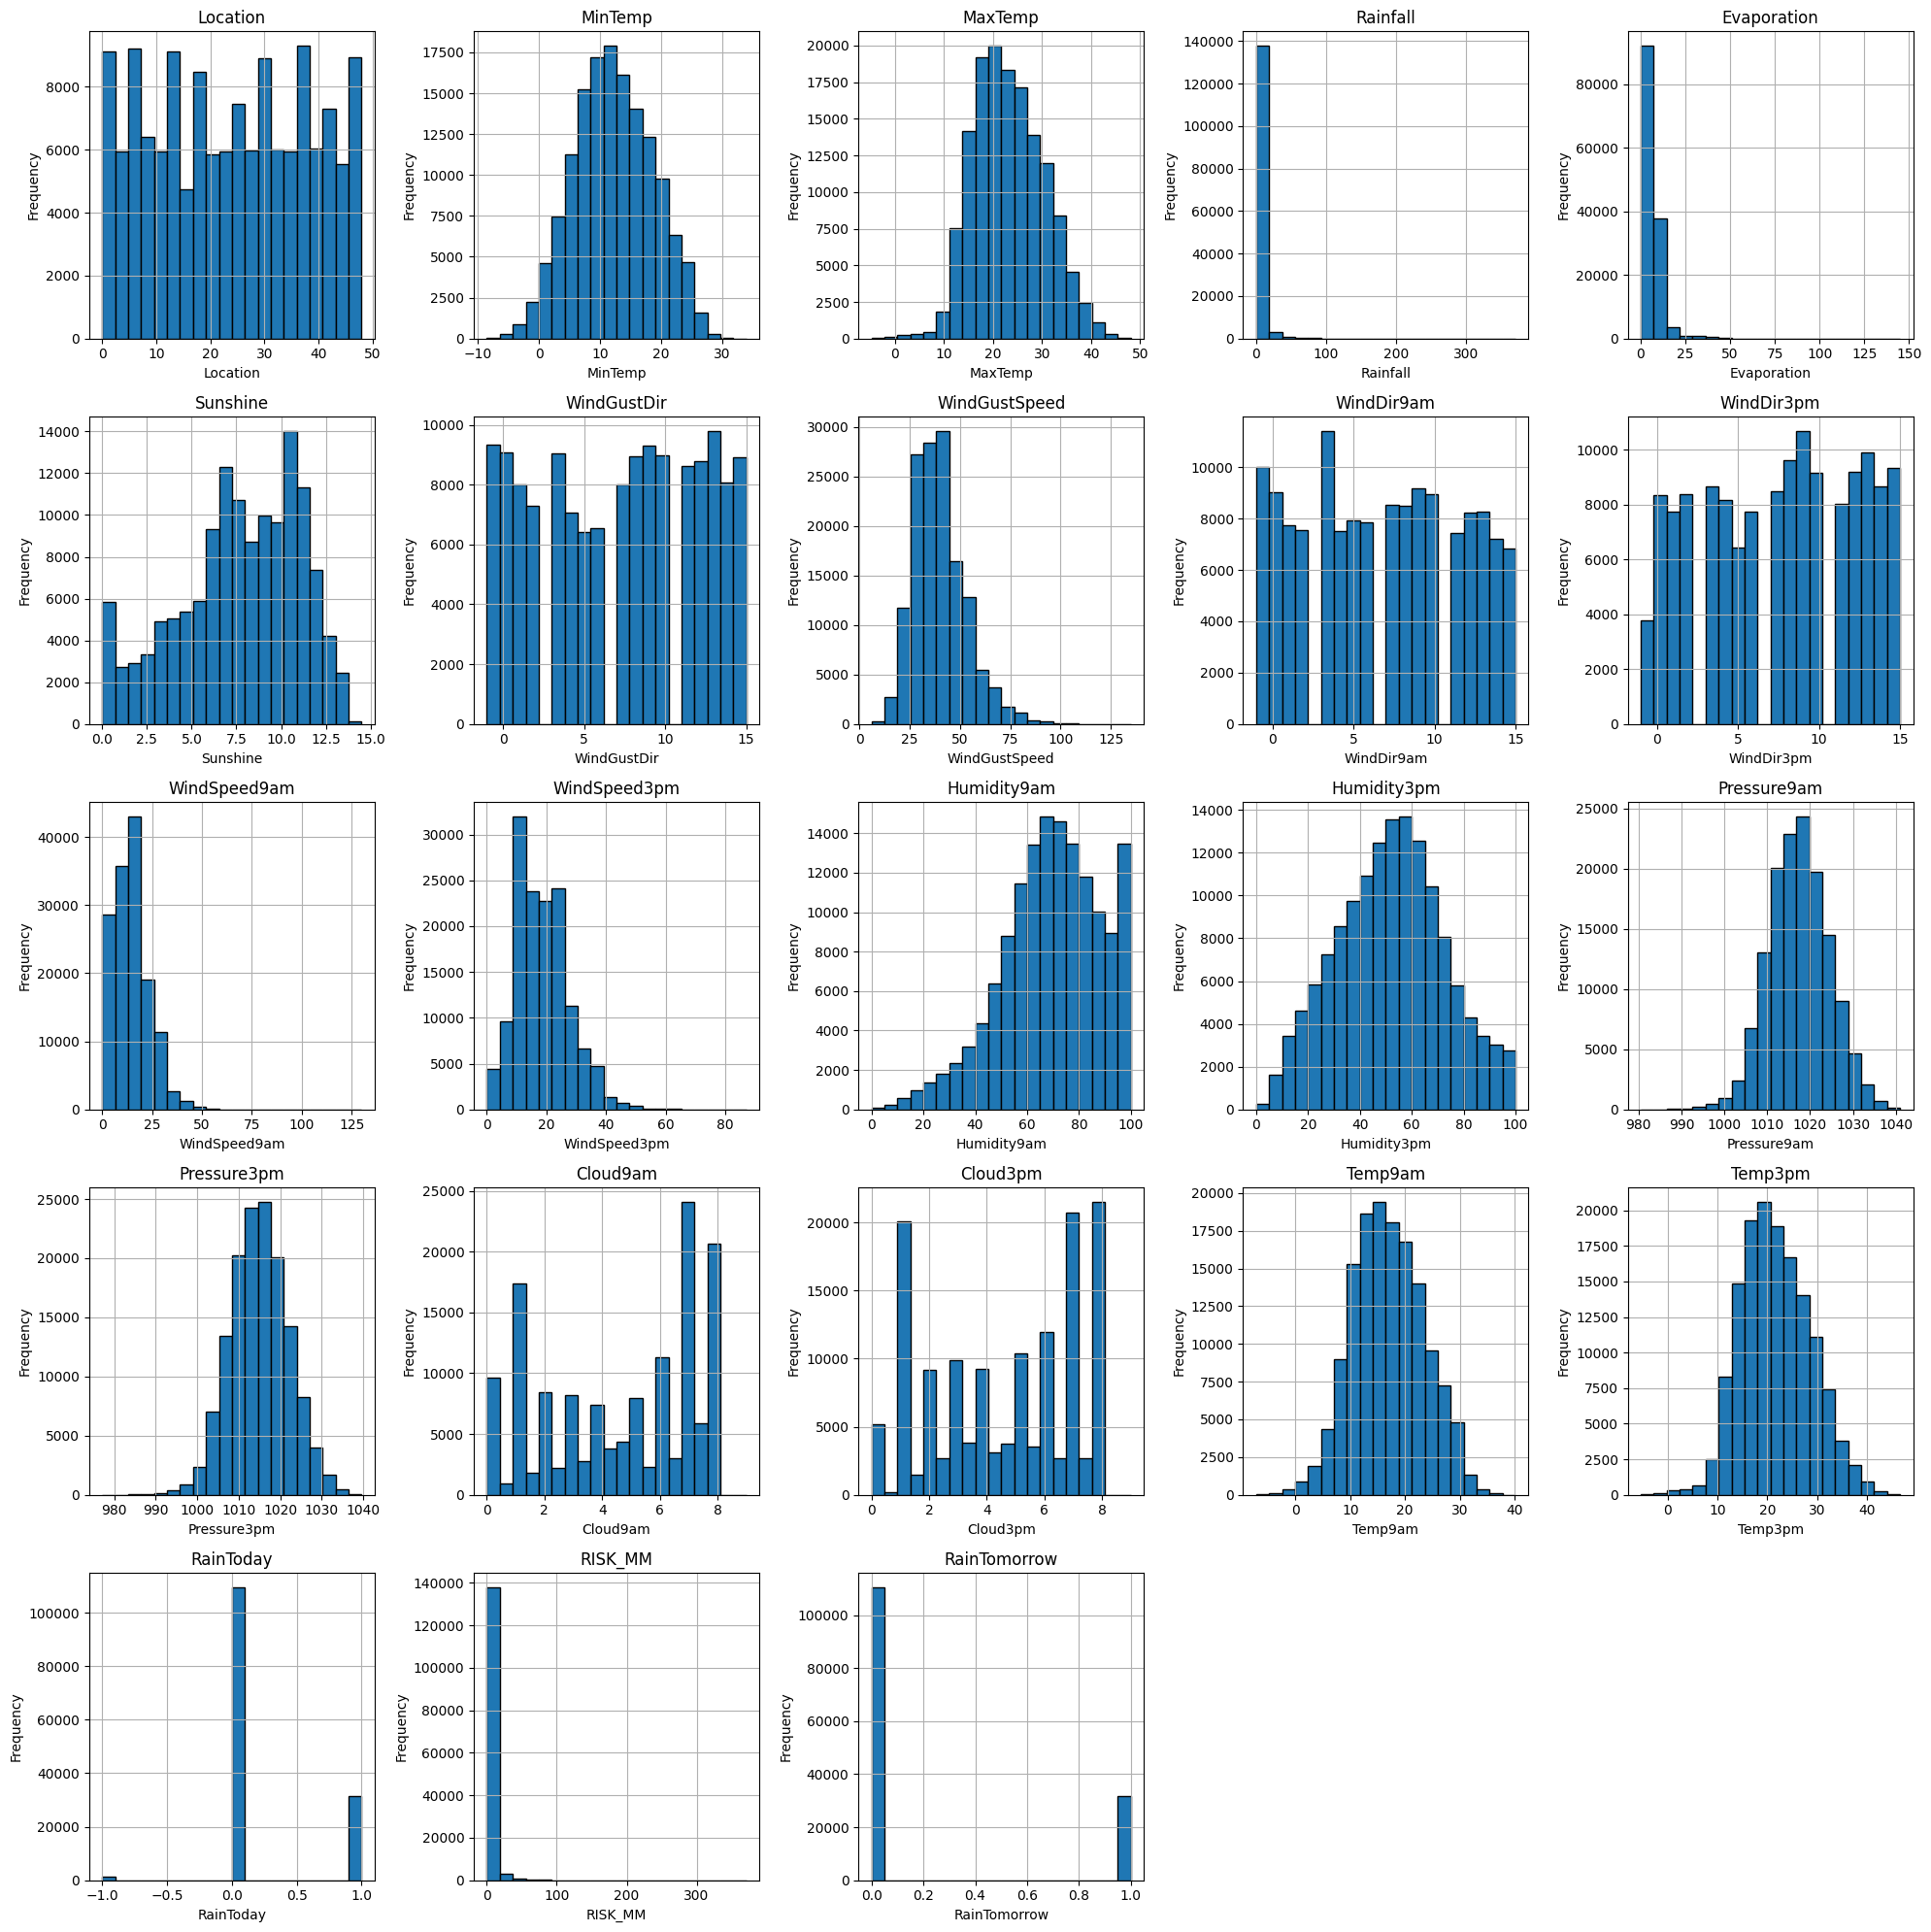

In [13]:
# Número de columnas en el DataFrame
num_cols = len(df.columns)

# Calcular el número de filas necesarias (5 columnas por fila)
num_rows = (num_cols + 4) // 5

# Crear subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 4 * num_rows))
axes = axes.flatten()

# Crear histogramas
for i, col in enumerate(df.columns):
    ax = axes[i]
    df[col].plot(kind='hist', ax=ax, title=col, bins=20, edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Eliminar subplots vacíos
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


In [14]:
# Verificar si hay valores negativos en la columna 'RainToday'
negativos = df[df['RainToday'] < 0]

# Imprimir el número de la fila que tiene un valor negativo
if not negativos.empty:
    for index in negativos.index:
        print(f'Fila con valor negativo en "RainToday": {index}')
else:
    print("No se encontraron valores negativos en 'RainToday'.")


Fila con valor negativo en "RainToday": 2008-12-16 00:00:00
Fila con valor negativo en "RainToday": 2009-09-11 00:00:00
Fila con valor negativo en "RainToday": 2010-02-10 00:00:00
Fila con valor negativo en "RainToday": 2010-02-12 00:00:00
Fila con valor negativo en "RainToday": 2010-02-18 00:00:00
Fila con valor negativo en "RainToday": 2010-02-27 00:00:00
Fila con valor negativo en "RainToday": 2010-03-02 00:00:00
Fila con valor negativo en "RainToday": 2010-03-11 00:00:00
Fila con valor negativo en "RainToday": 2010-08-05 00:00:00
Fila con valor negativo en "RainToday": 2011-09-14 00:00:00
Fila con valor negativo en "RainToday": 2011-10-11 00:00:00
Fila con valor negativo en "RainToday": 2012-10-06 00:00:00
Fila con valor negativo en "RainToday": 2013-05-10 00:00:00
Fila con valor negativo en "RainToday": 2013-10-11 00:00:00
Fila con valor negativo en "RainToday": 2014-06-05 00:00:00
Fila con valor negativo en "RainToday": 2014-09-24 00:00:00
Fila con valor negativo en "RainToday": 

In [15]:
# Verificar si hay valores negativos en la columna 'RainToday' y reemplazarlos por 0
df['RainToday'] = df['RainToday'].apply(lambda x: 0 if x == -1 else x)

# Imprimir el número de filas que tenían valor negativo y fueron cambiadas
negativos = (df['RainToday'] == 0).sum()
print(f'Se han reemplazado {negativos} valores negativos con 0 en la columna "RainToday".')


Se han reemplazado 110738 valores negativos con 0 en la columna "RainToday".


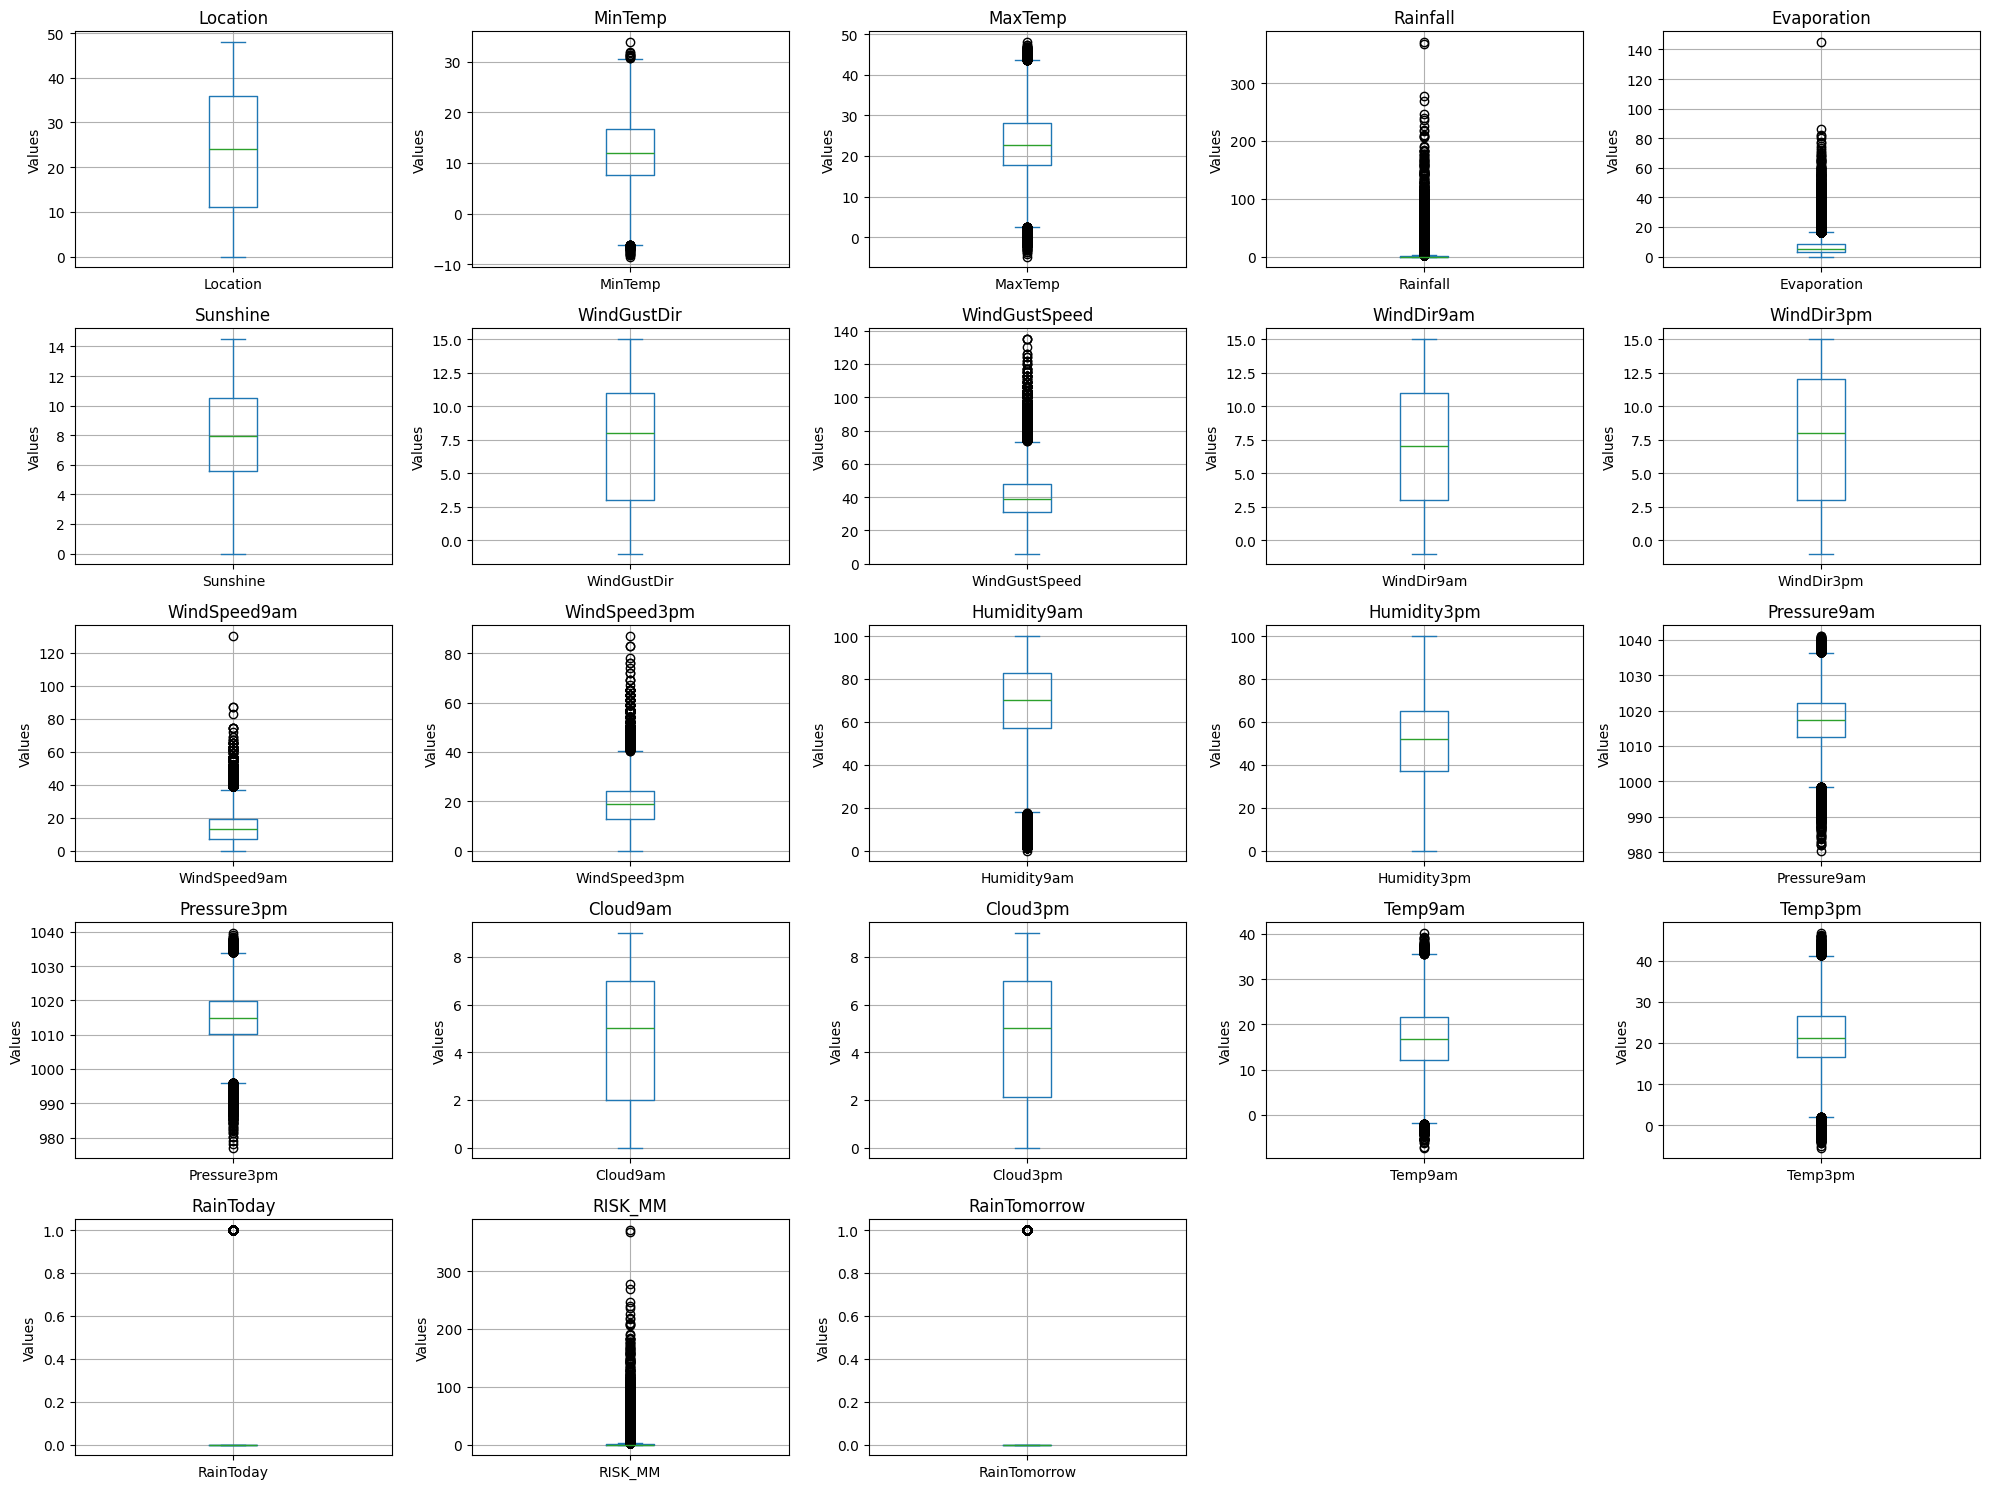

In [16]:
# Crear boxplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))  # Ajusta el número de filas y columnas según la cantidad de variables
axes = axes.flatten()  # Aplanar el array de ejes para facilitar el acceso

for i, col in enumerate(df.columns):
    ax = axes[i]
    df[col].plot(kind='box', ax=ax, title=col)
    ax.set_ylabel('Values')
    ax.grid(True)

# Eliminar los ejes vacíos si hay menos variables que subgráficos
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

# TRATAMIENTO DE OUTLIERS


El boxplot por columna proporciono informacion necesaria sobre la cantidad de outliers.
Los outliers de detectan mediante el metodo de recorrido intercuartil, luego de esos se convertiran en NaN, para luego imputar los valores perdidos mediante el metodo de la interpolacion, de esta manera disminuimos los errores.

In [17]:
# Función para identificar outliers utilizando el método IQR
def detectar_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    return (data < umbral_inferior) | (data > umbral_superior)

# Lista de columnas a procesar (de acuerdo a los boxplots de la imagen)
columnas = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
            'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 
            'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
            'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Asegurarse de que el índice es un DatetimeIndex y está en orden cronológico
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Eliminar etiquetas duplicadas en el índice
df = df[~df.index.duplicated(keep='first')]

# Identificar outliers en cada columna especificada y convertirlos en NaN
for column in columnas:
    outliers = detectar_outliers_IQR(df[column])
    df.loc[outliers, column] = np.nan

# Resamplear los datos a una frecuencia diaria y rellenar valores faltantes con interpolación
df = df.resample('D').interpolate()

# Imprimir el dataframe resultante
print(df)


            Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
Date                                                                       
2007-11-01       9.0      8.0     24.3       0.0     3.400000   6.300000   
2007-11-02       9.0     14.0     26.9       0.0     4.400000   9.700000   
2007-11-03       9.0     13.7     23.4       0.0     5.800000   3.300000   
2007-11-04       9.0     13.3     15.5       0.0     7.200000   9.100000   
2007-11-05       9.0      7.6     16.1       0.0     5.600000  10.600000   
...              ...      ...      ...       ...          ...        ...   
2017-06-21      44.0      5.2     13.6       0.0     0.600000   0.000000   
2017-06-22      20.0     -0.5     16.7       0.0     1.400000   7.000000   
2017-06-23       3.0      4.1     27.8       0.0     4.449123  11.000000   
2017-06-24      12.0      6.2     11.8       0.0     1.400000   9.466509   
2017-06-25      11.0      8.5     19.3       0.0    12.192398   9.294480   

           

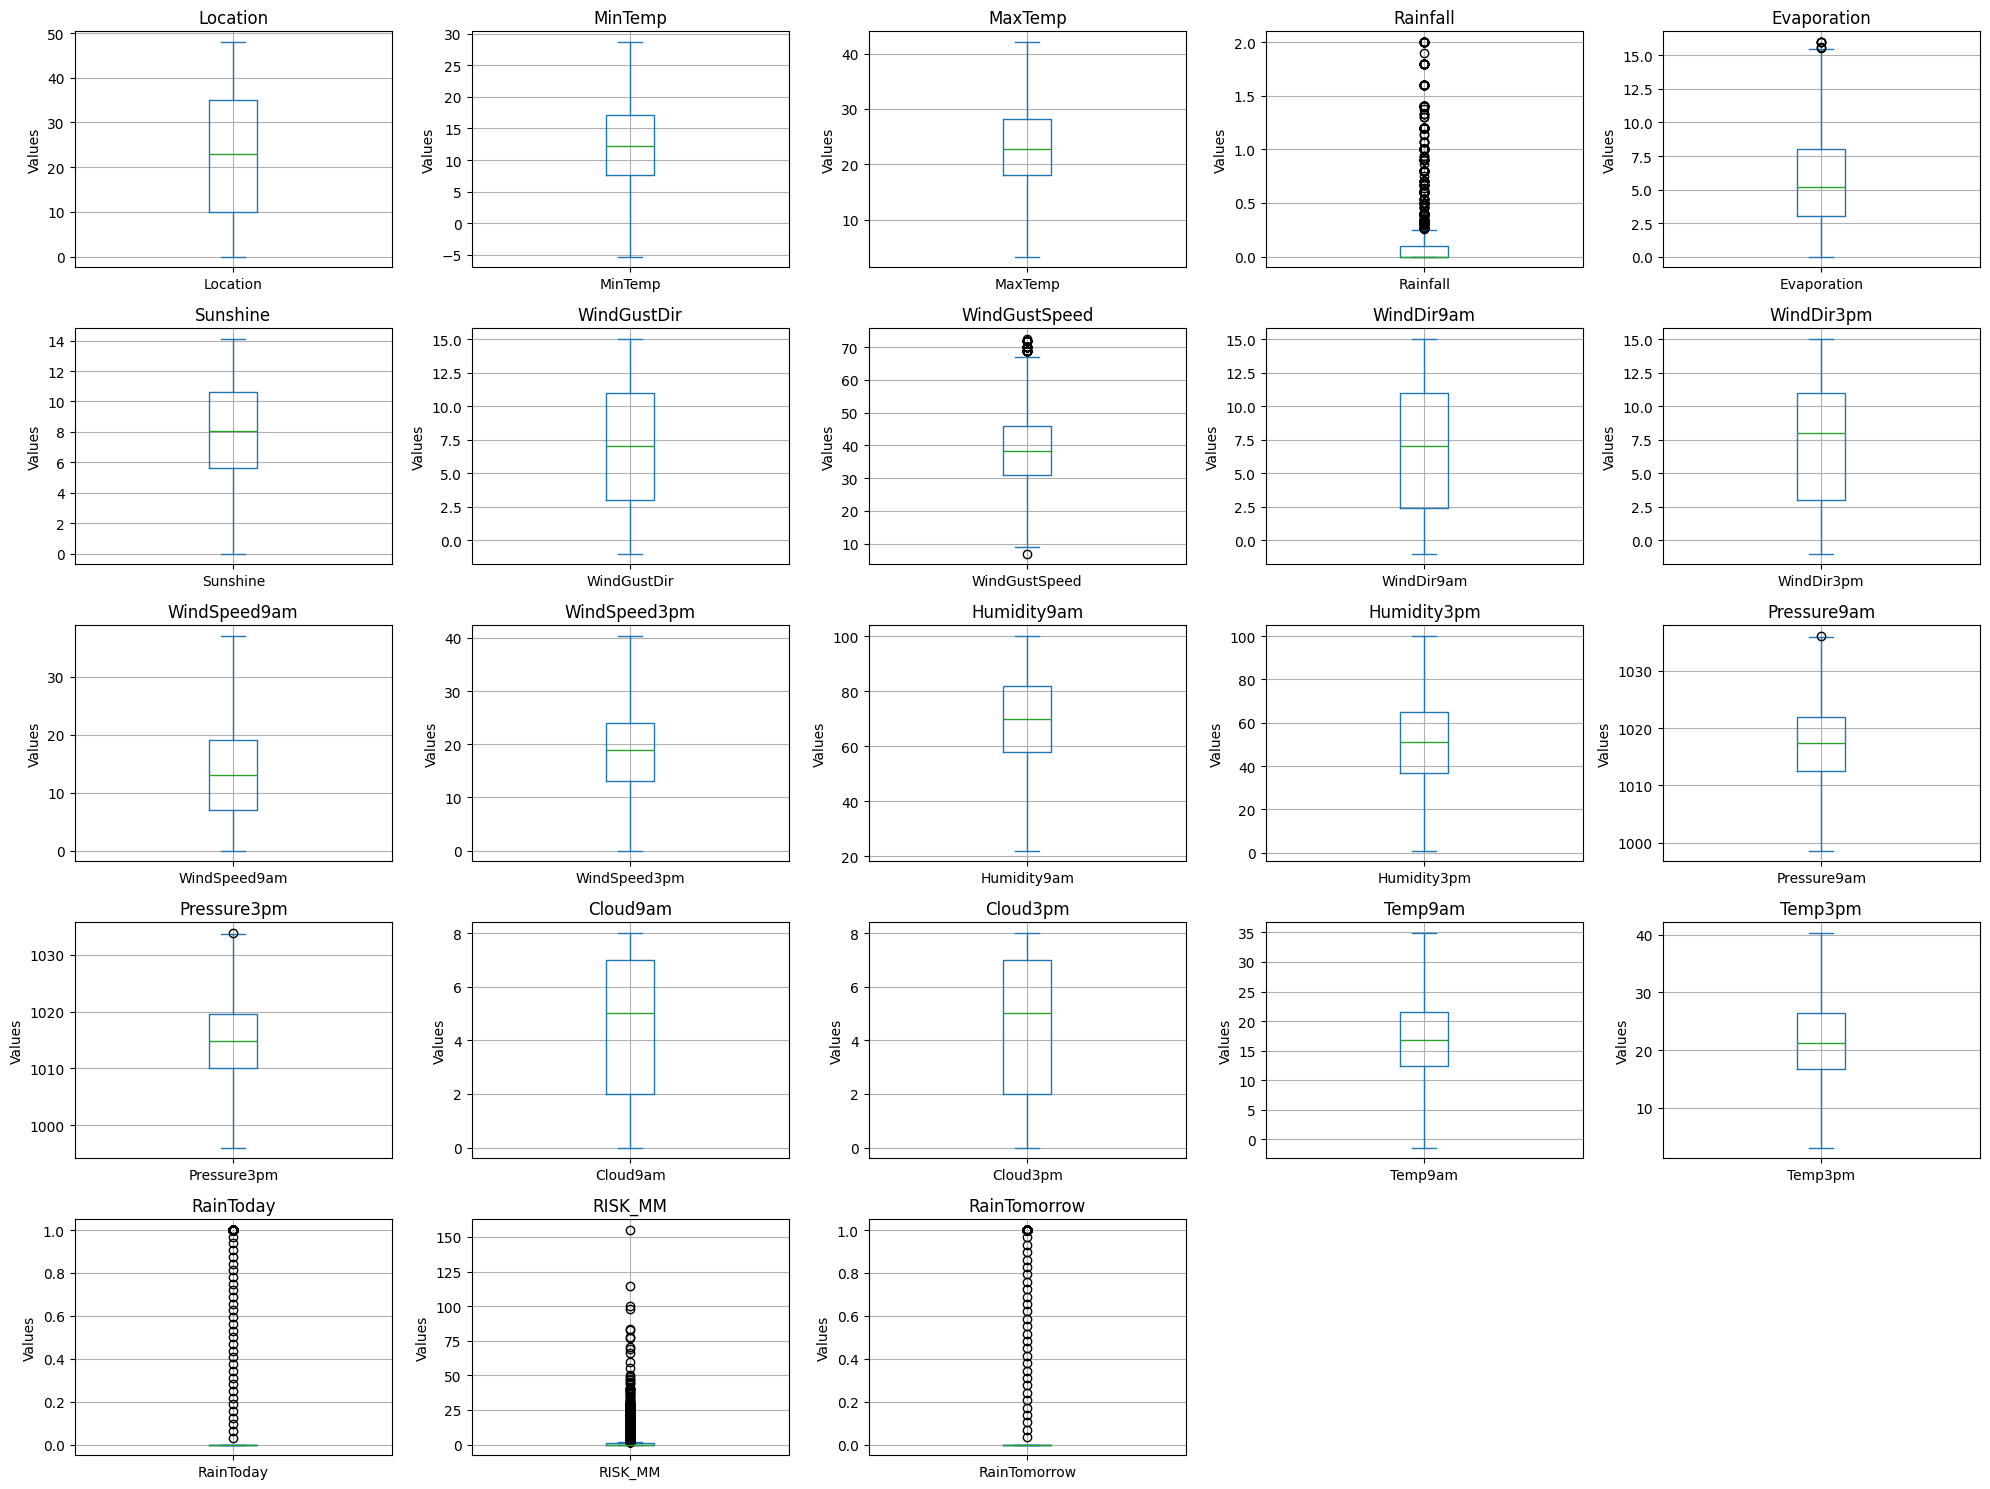

(3525, 23)

In [18]:
# Crear boxplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))  # Ajusta el número de filas y columnas según la cantidad de variables
axes = axes.flatten()  # Aplanar el array de ejes para facilitar el acceso

for i, col in enumerate(df.columns):
    ax = axes[i]
    df[col].plot(kind='box', ax=ax, title=col)
    ax.set_ylabel('Values')
    ax.grid(True)

# Eliminar los ejes vacíos si hay menos variables que subgráficos
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

df.shape

In [19]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

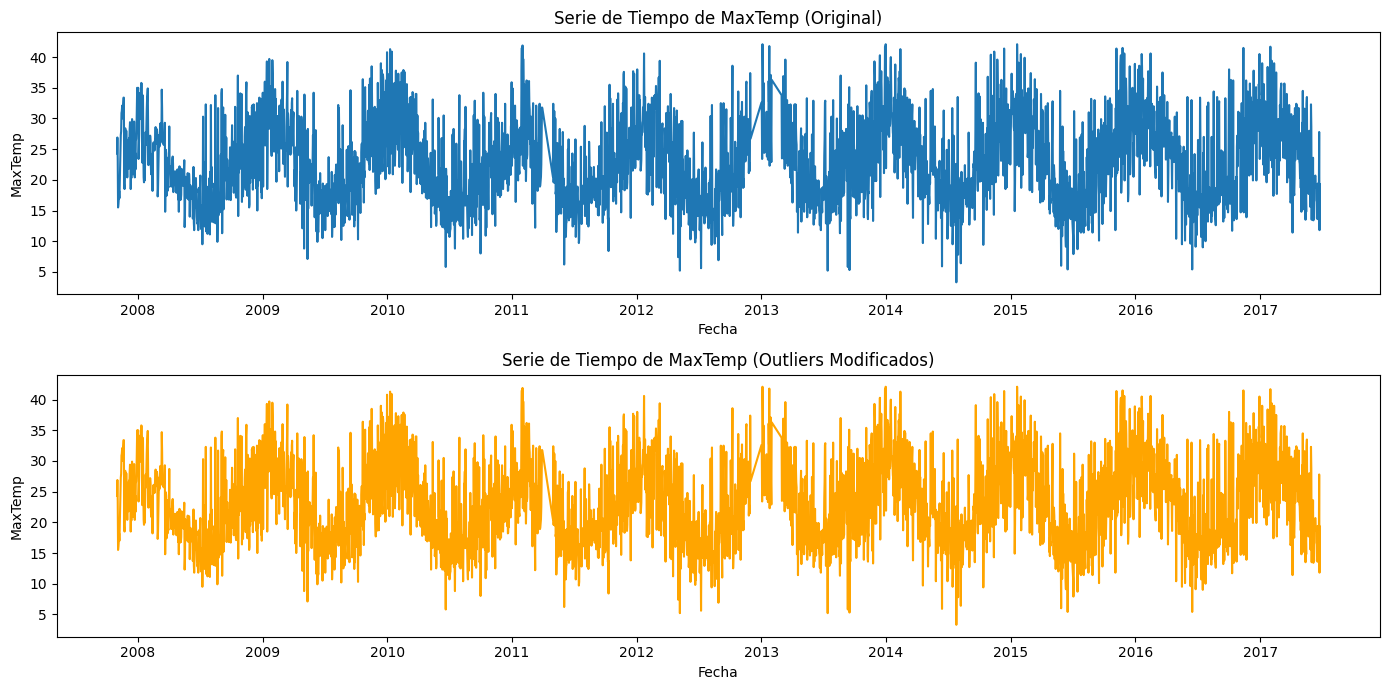

In [20]:
# Visualizar la serie de tiempo de la columna 'MinTemp'
plt.figure(figsize=(14, 7))

# Subplot 1: Serie de tiempo original
plt.subplot(2, 1, 1)
plt.plot(df.index, df['MaxTemp'], label='Original')
plt.title('Serie de Tiempo de MaxTemp (Original)')
plt.xlabel('Fecha')
plt.ylabel('MaxTemp')

# Subplot 2: Serie de tiempo con outliers modificados
plt.subplot(2, 1, 2)
plt.plot(df.index, df['MaxTemp'], label='Modificada', color='orange')
plt.title('Serie de Tiempo de MaxTemp (Outliers Modificados)')
plt.xlabel('Fecha')
plt.ylabel('MaxTemp')

plt.tight_layout()
plt.show()

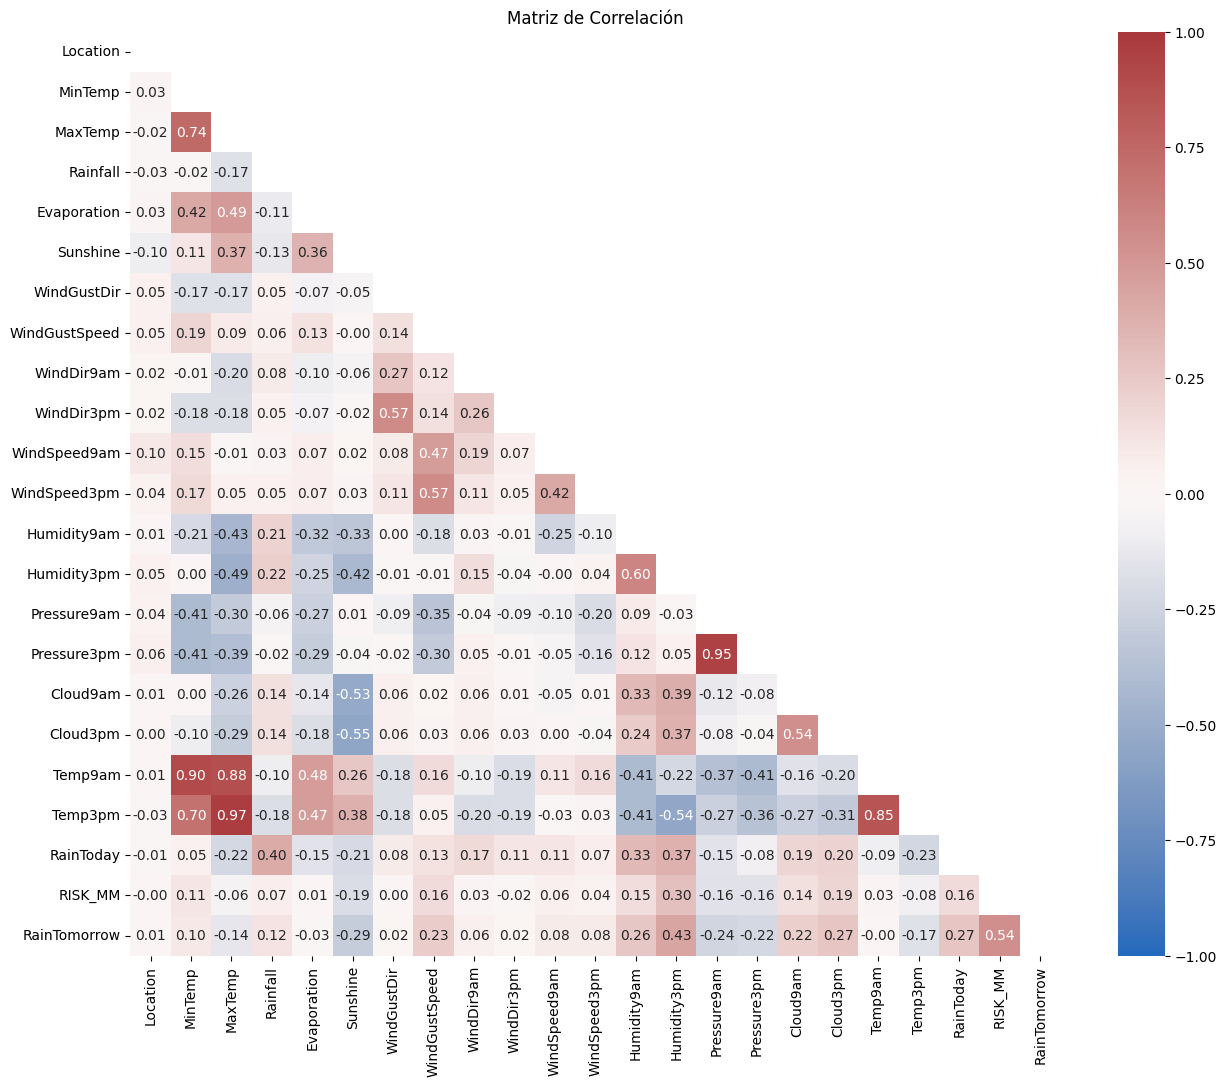

In [21]:
# Calcular la matriz de correlación
matrix = df.corr().round(2)

# Crear una máscara para ocultar la parte superior del triángulo de la matriz
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 12))

# Dibujar el heatmap con la matriz de correlación
sns.heatmap(matrix, annot=True, fmt=".2f", vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, annot_kws={"size": 10})

# Título del heatmap
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

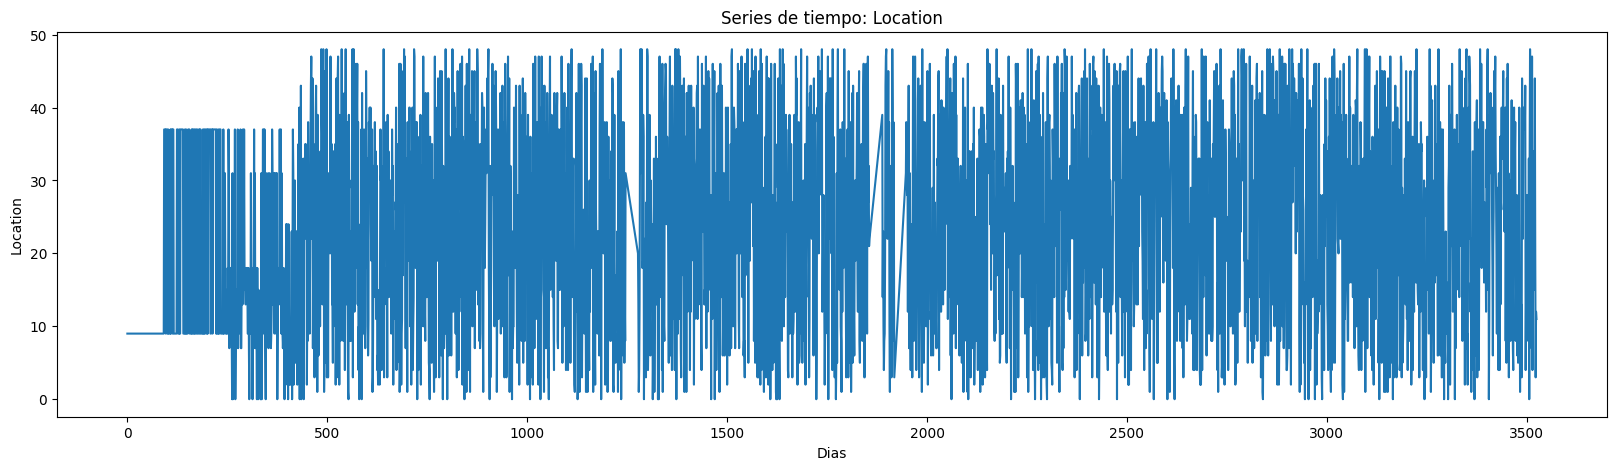

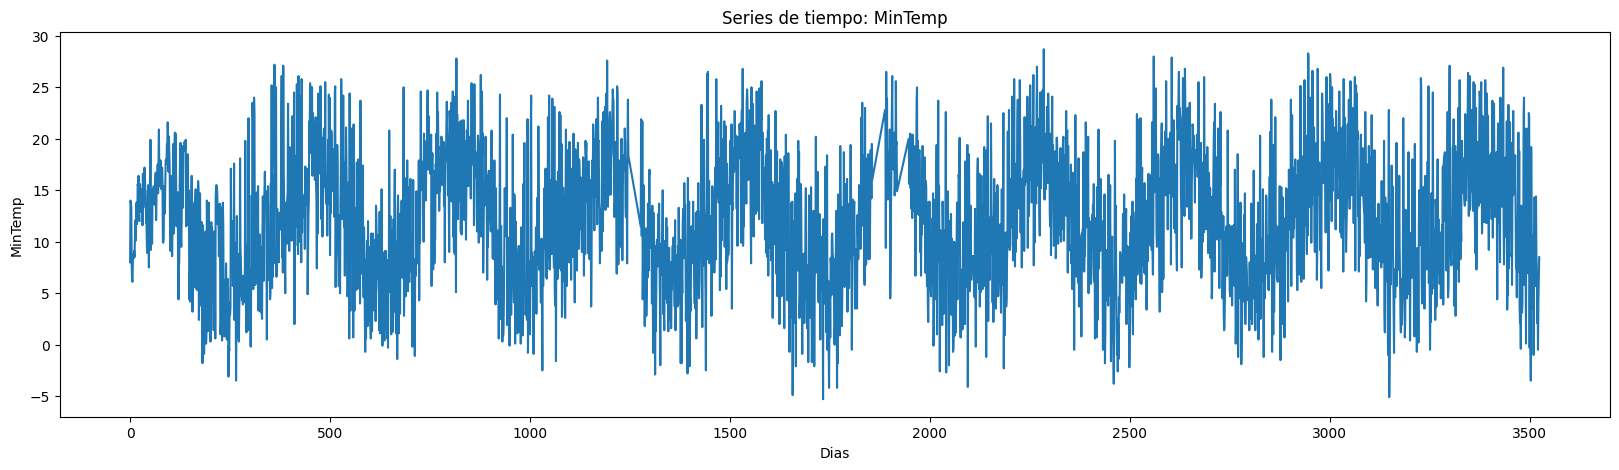

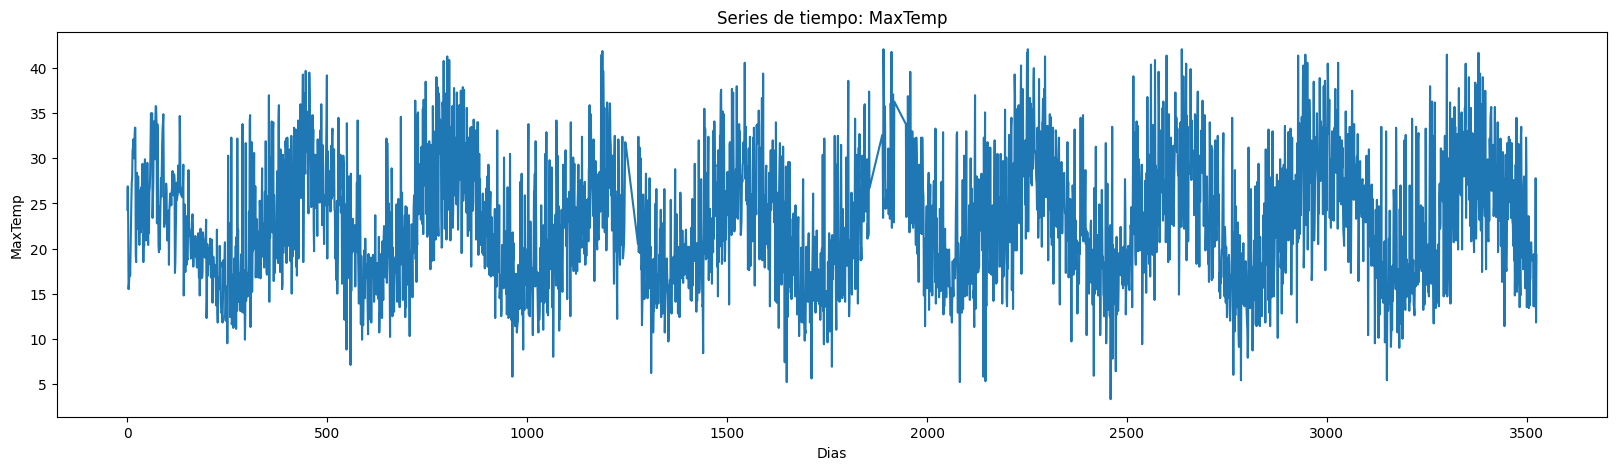

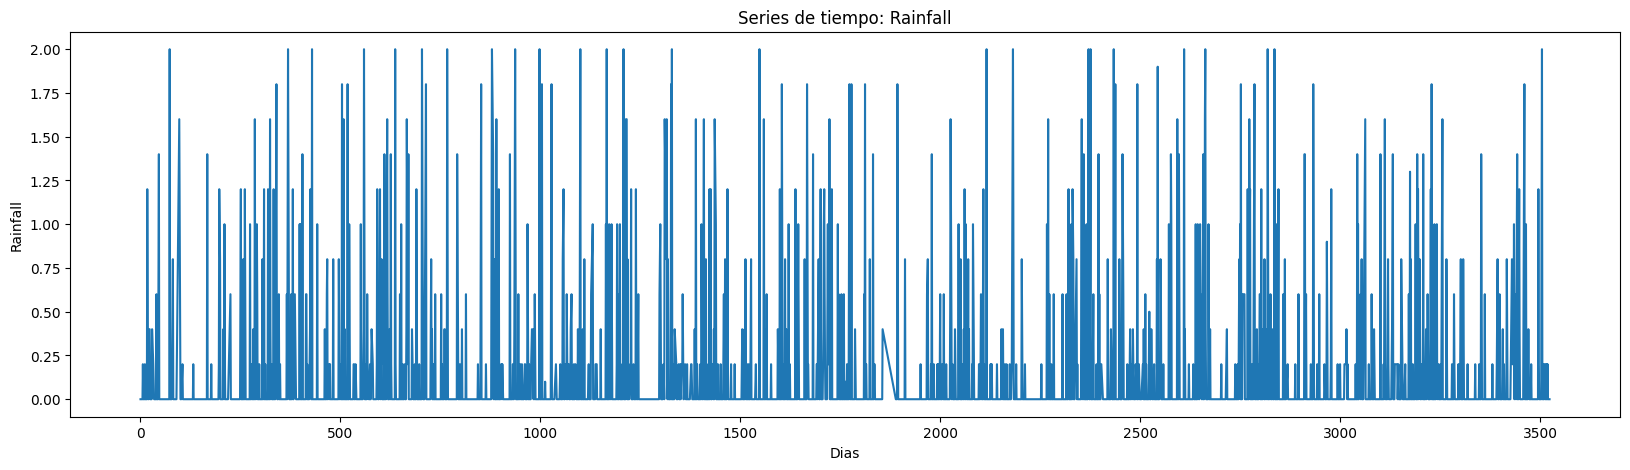

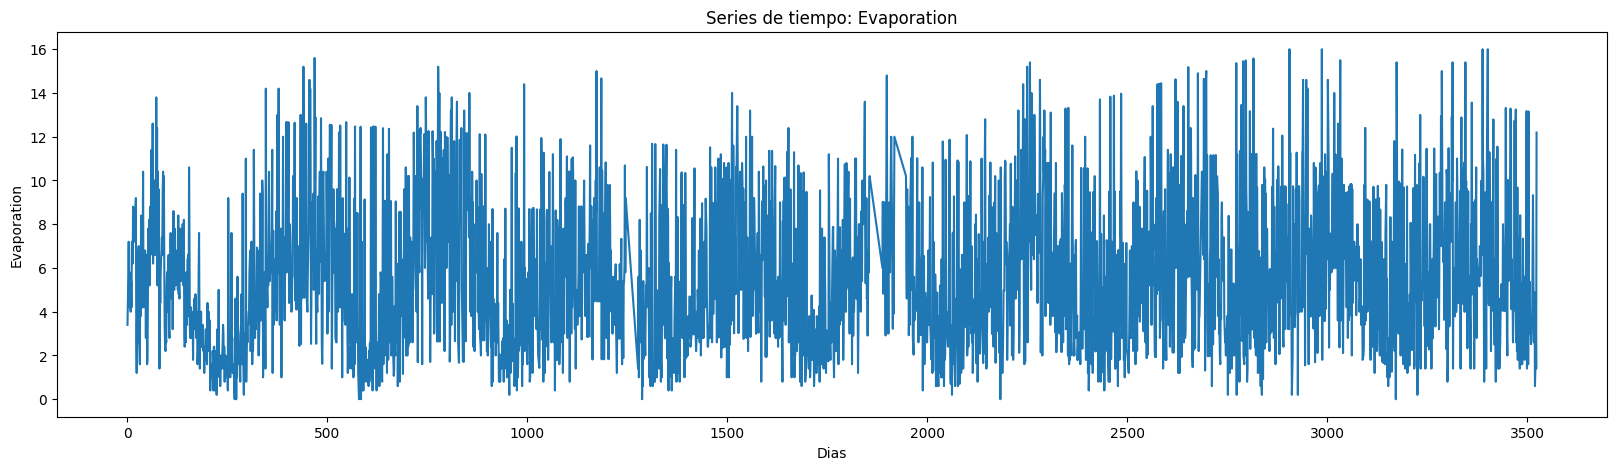

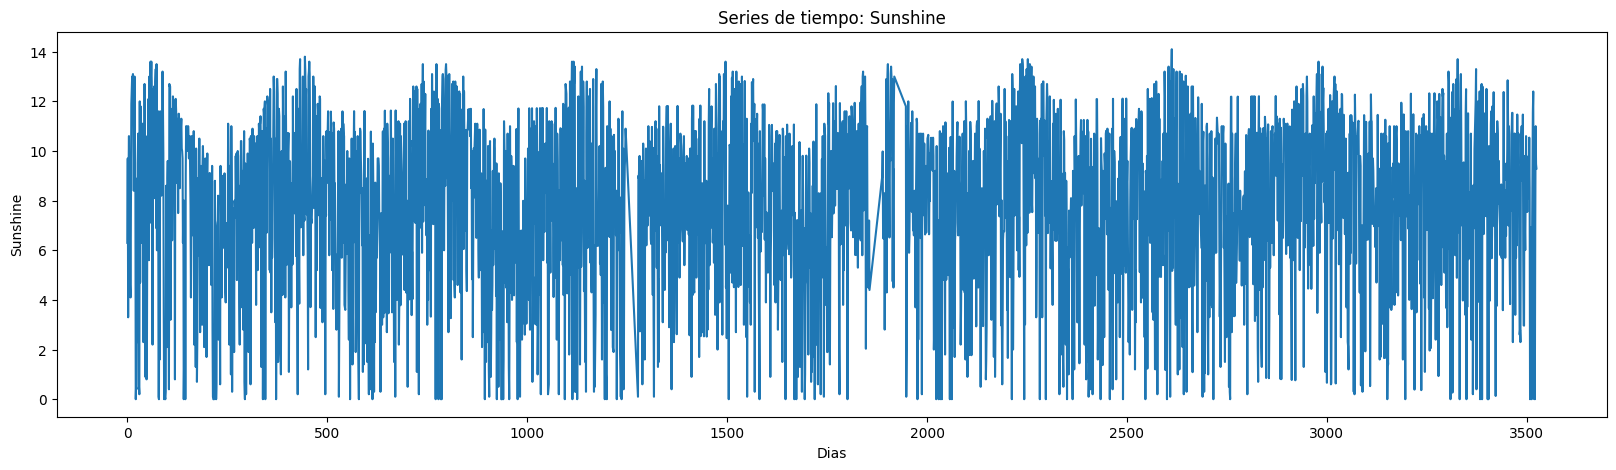

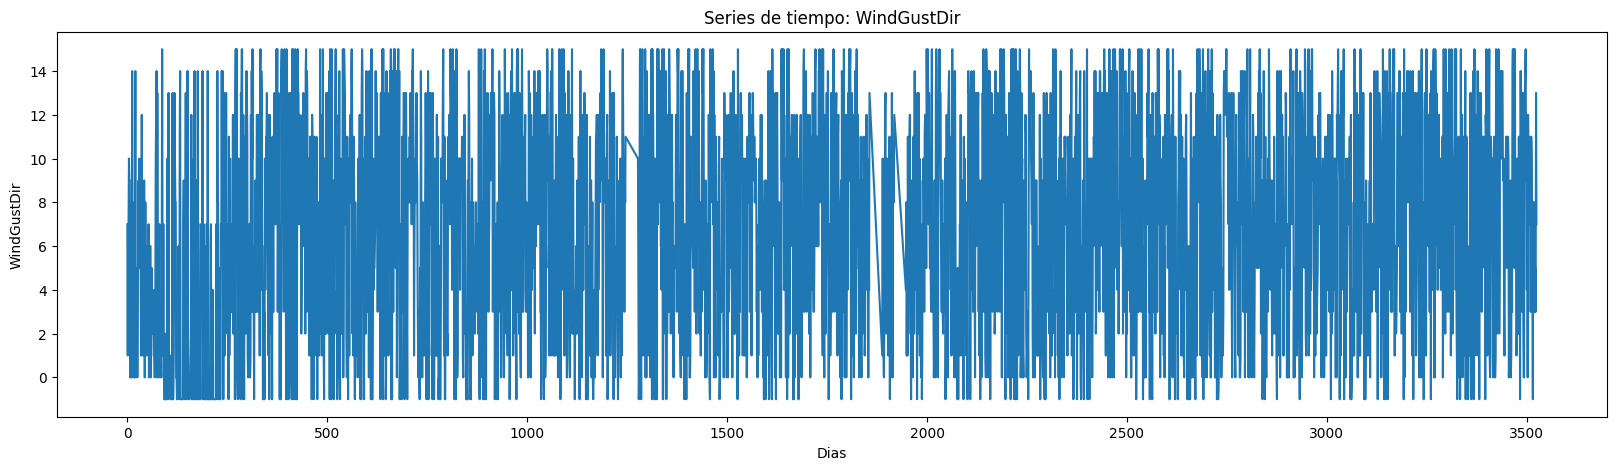

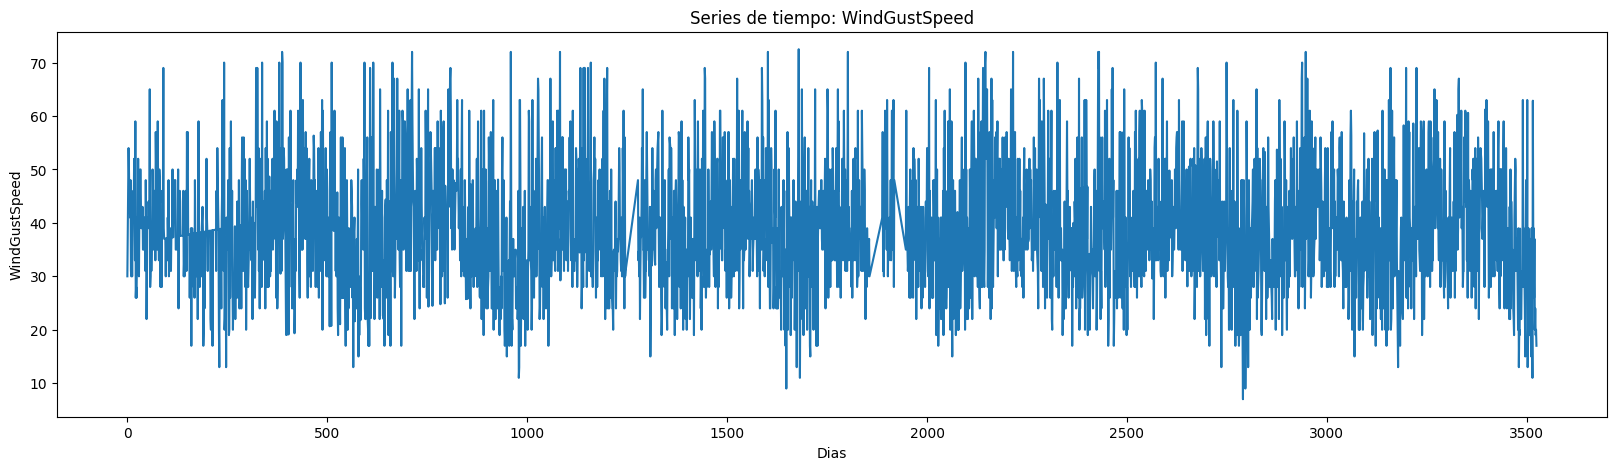

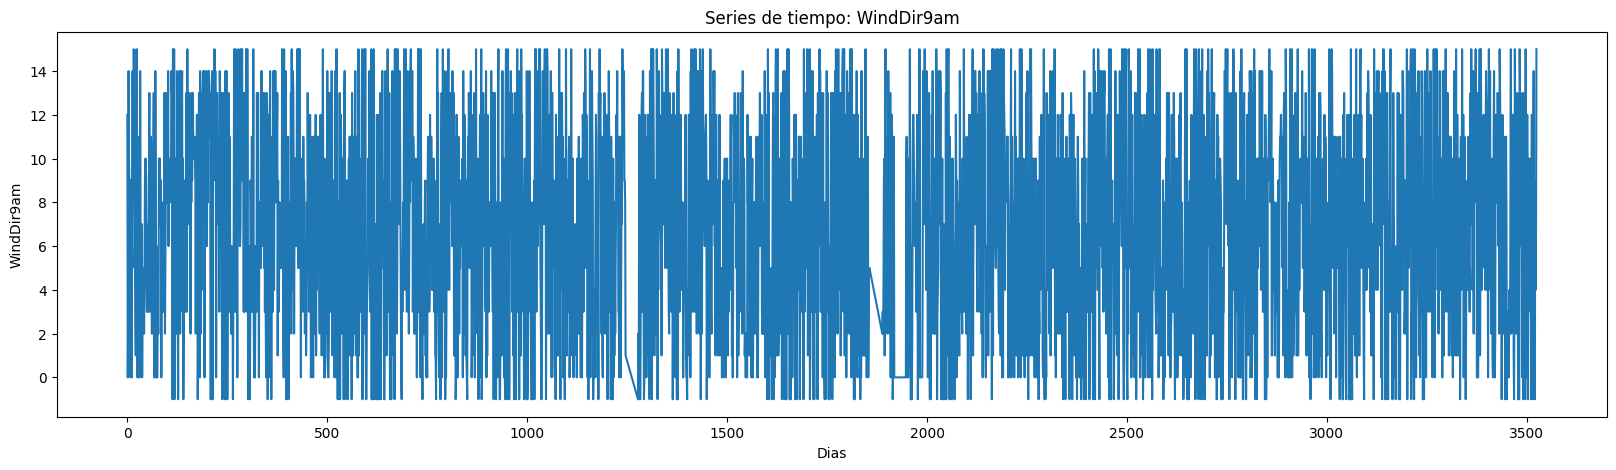

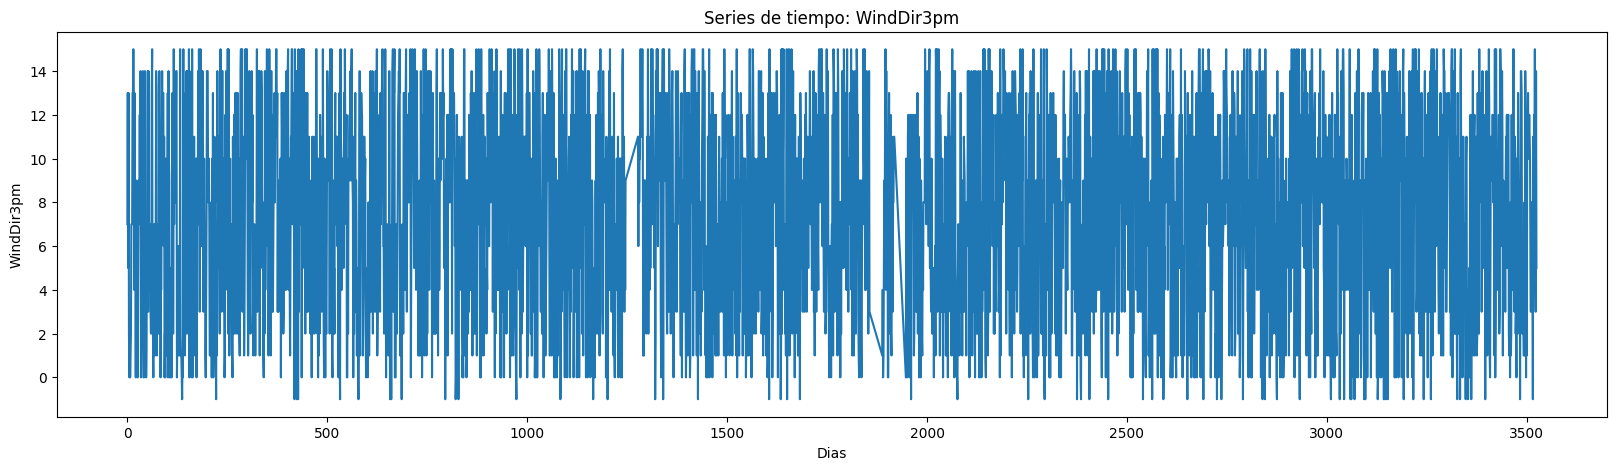

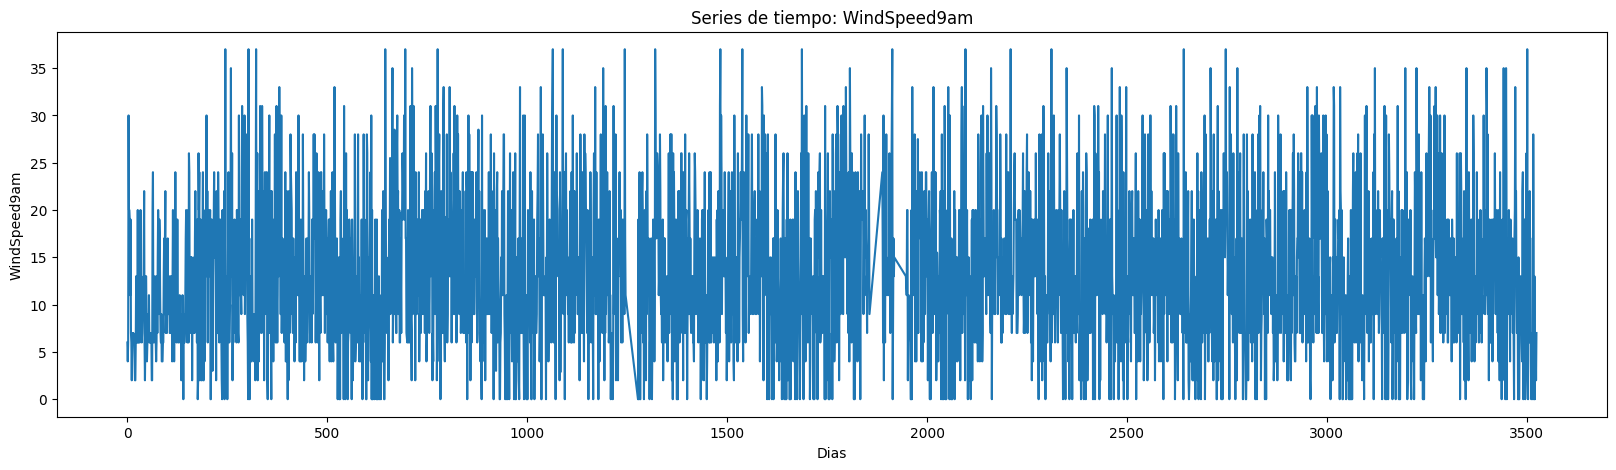

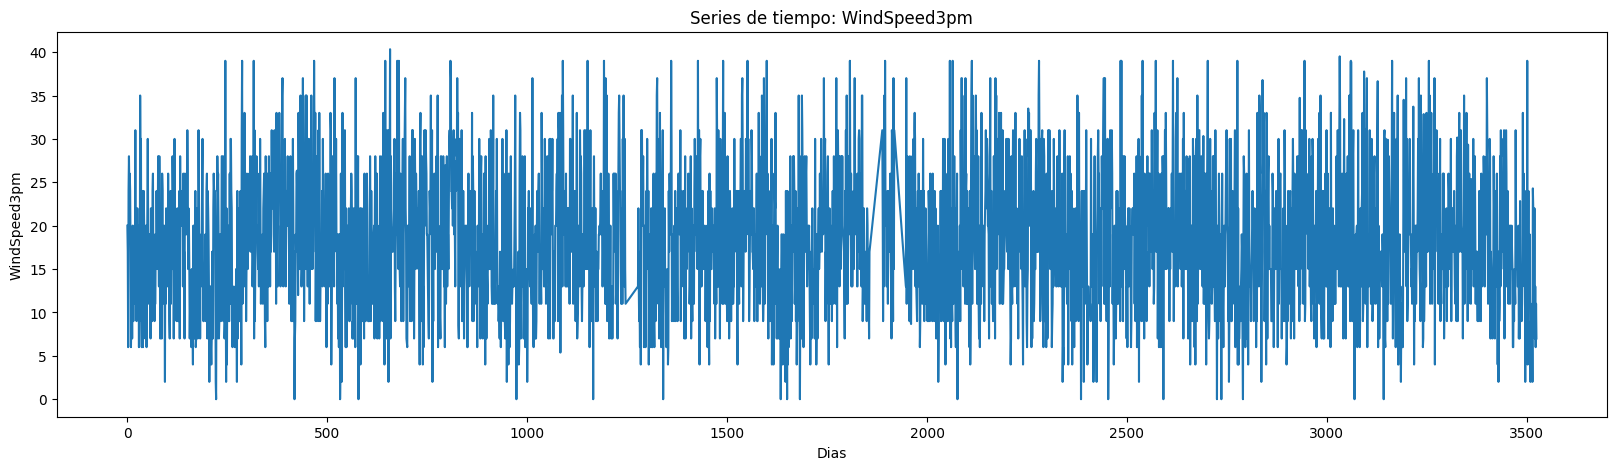

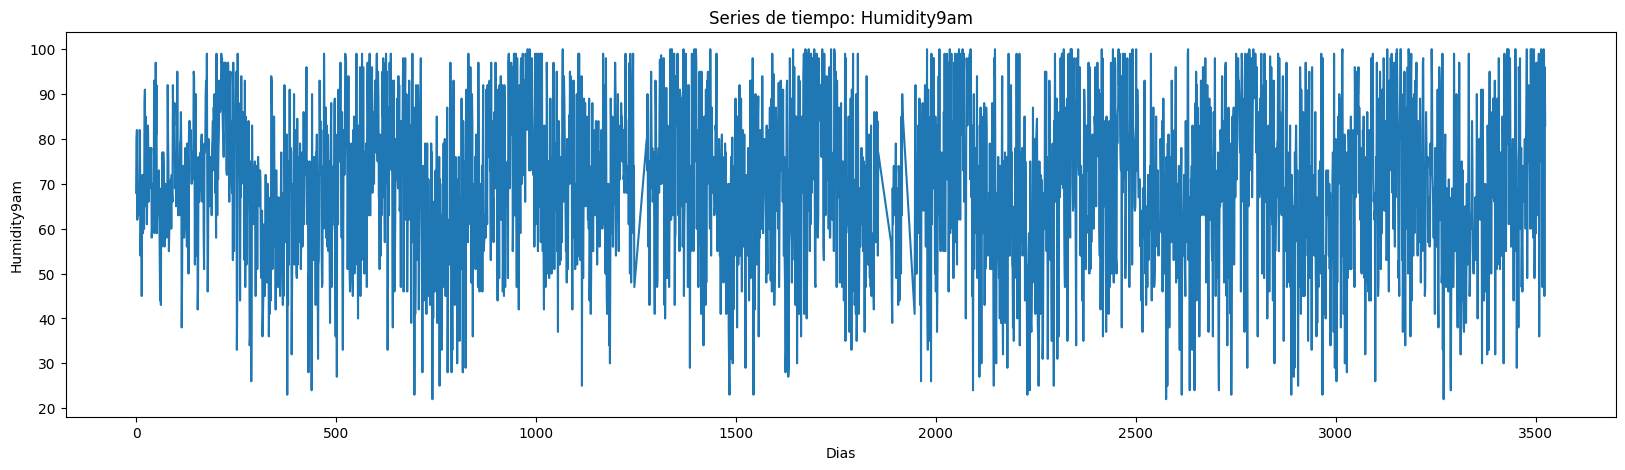

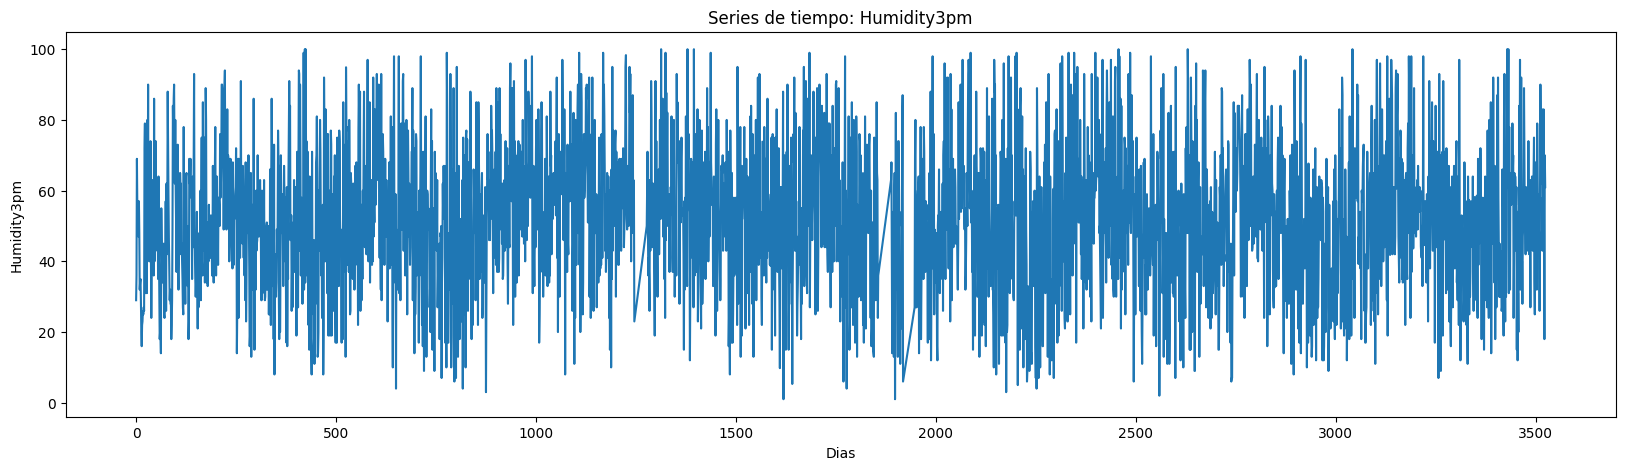

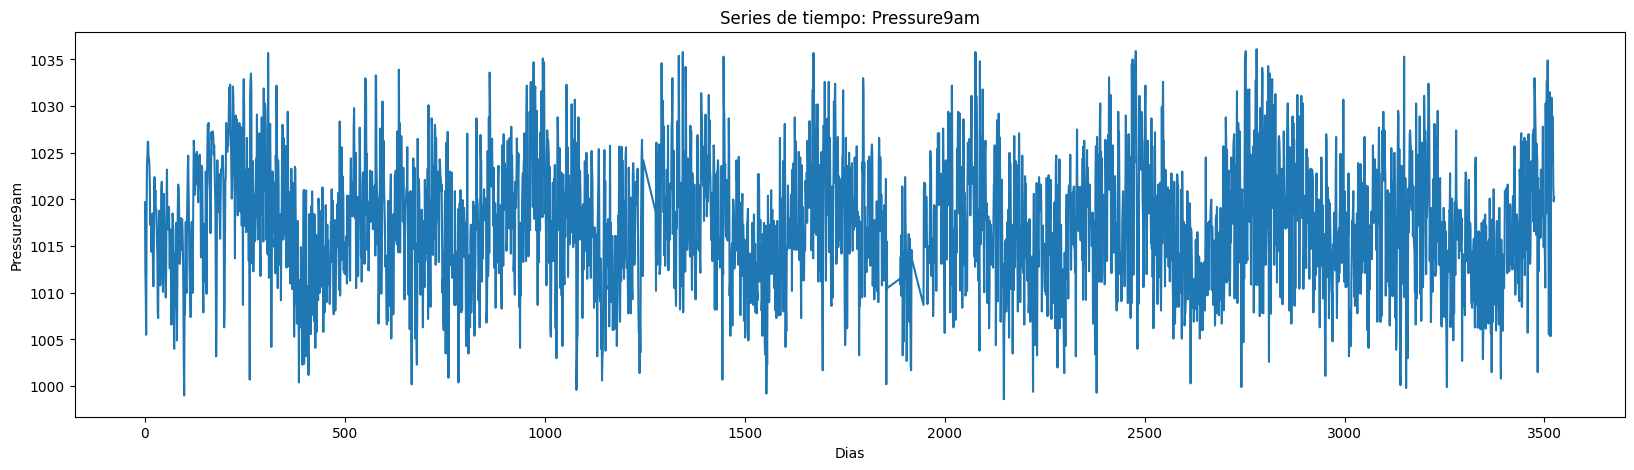

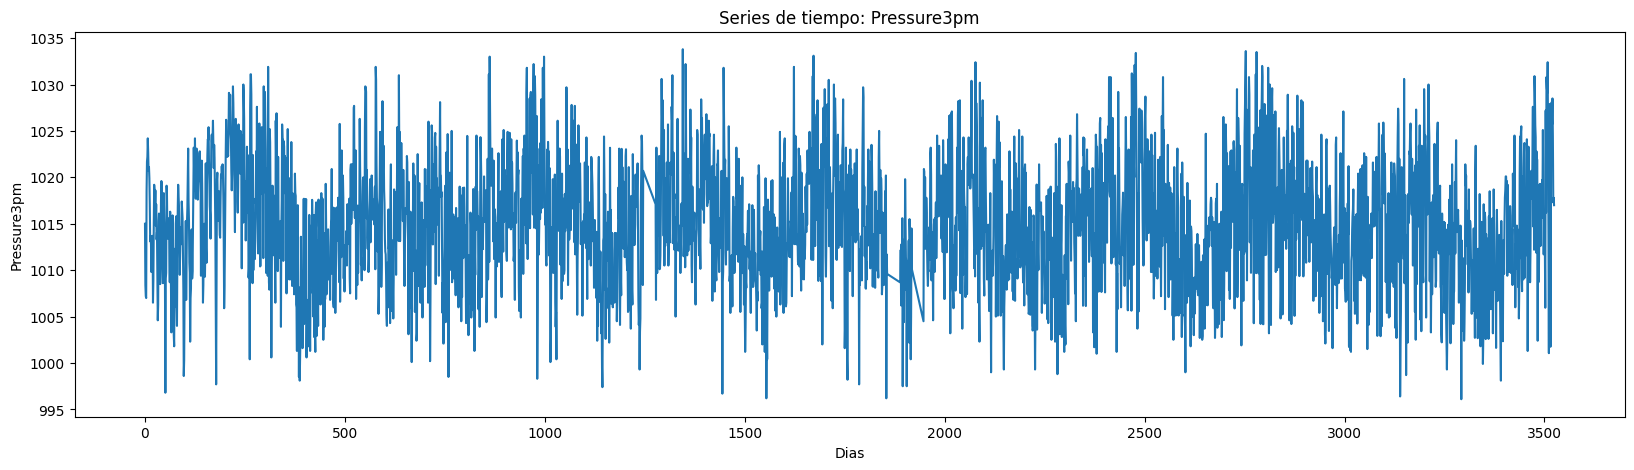

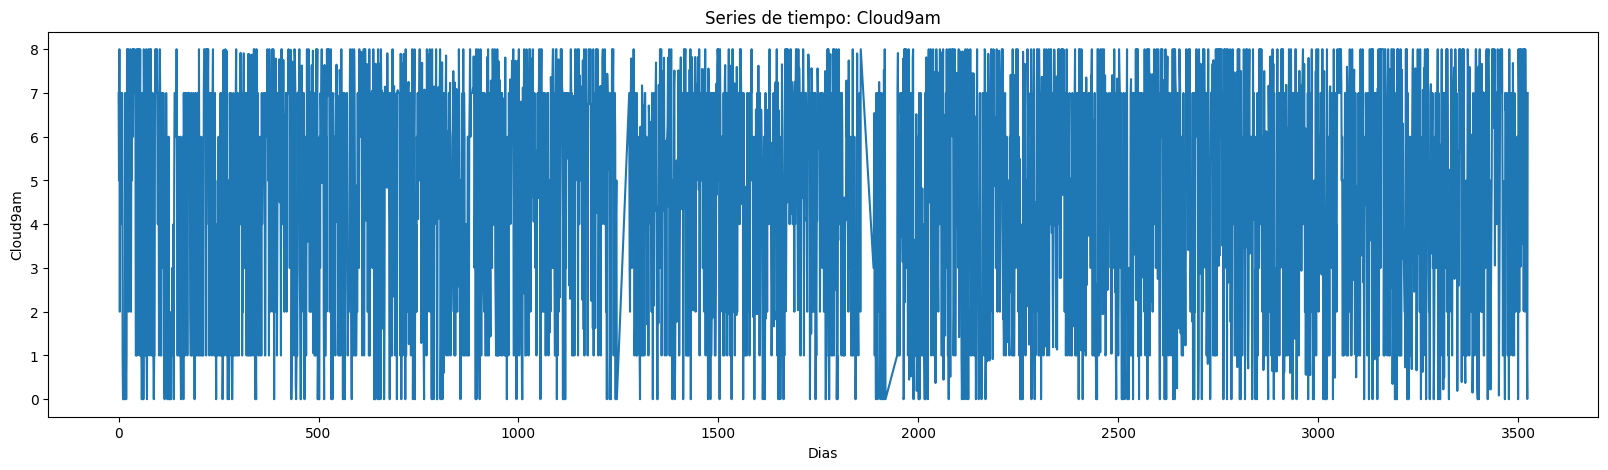

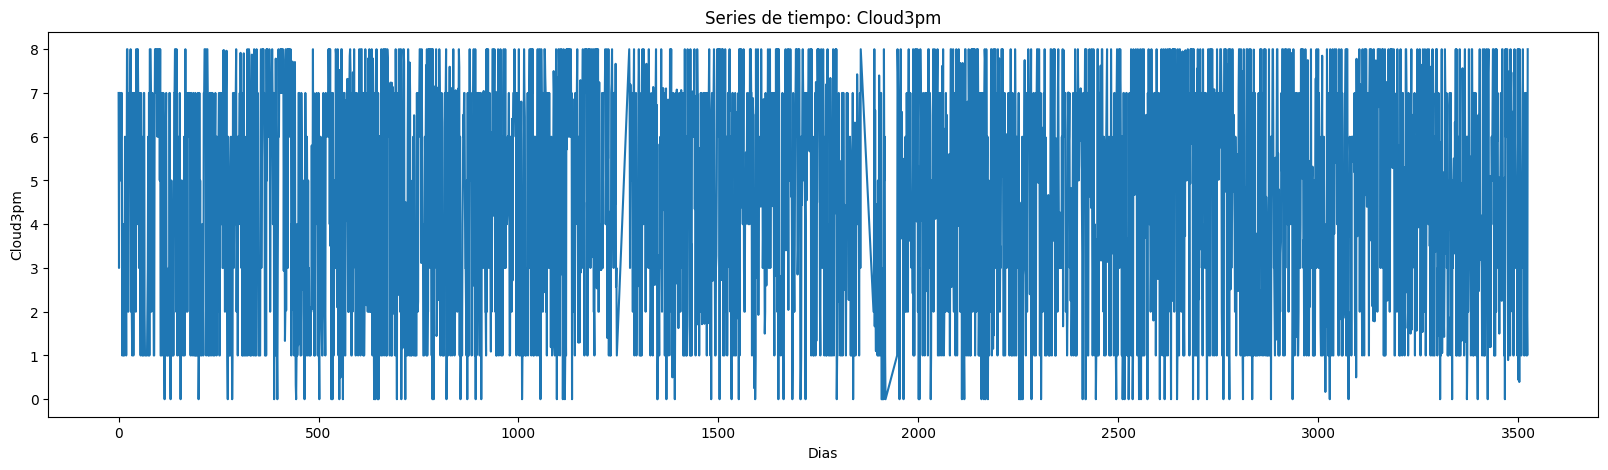

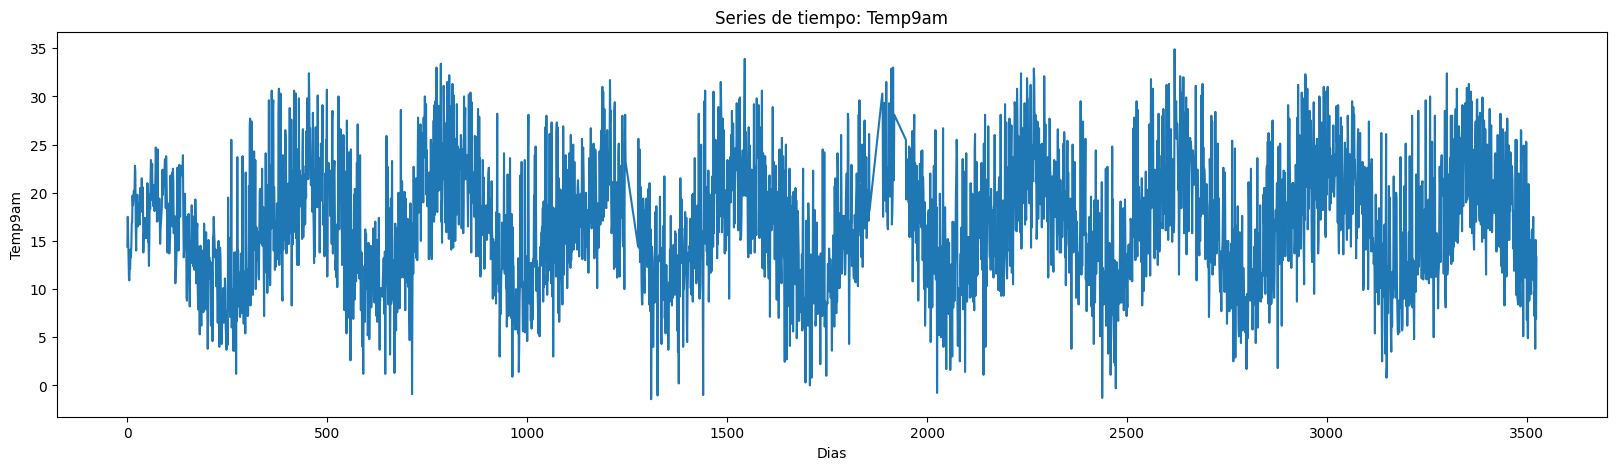

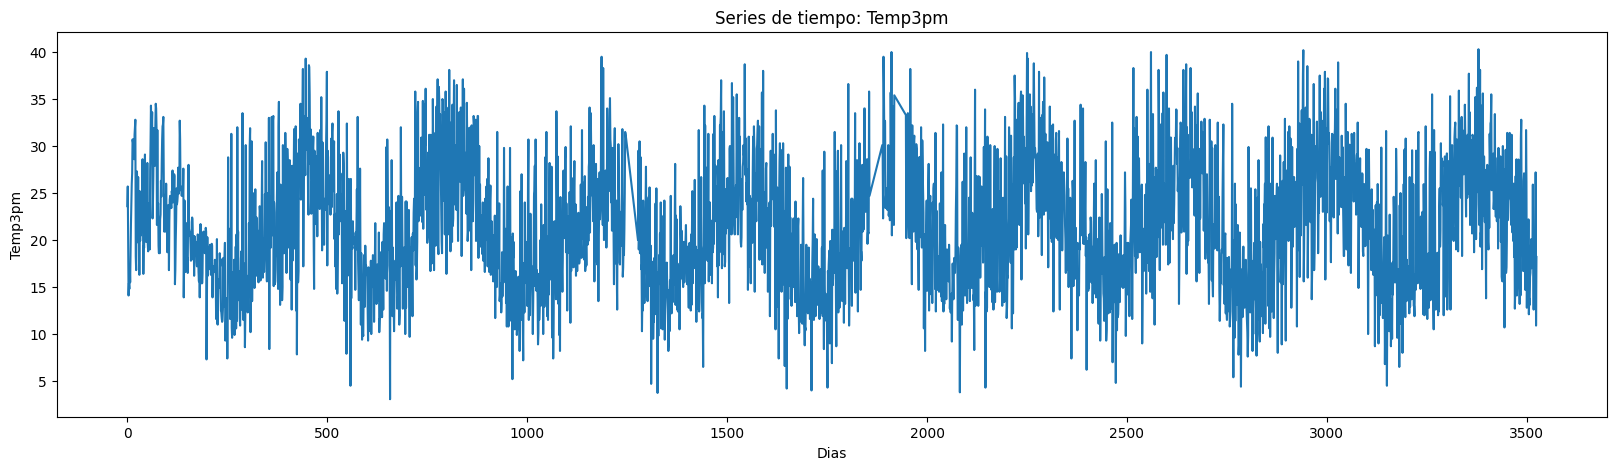

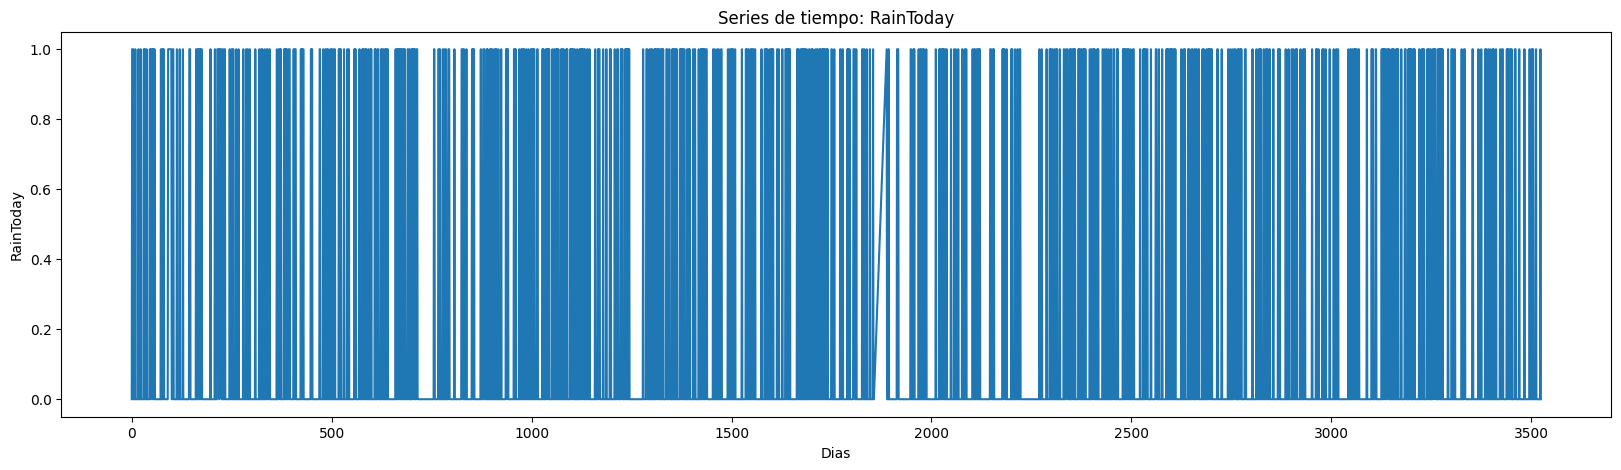

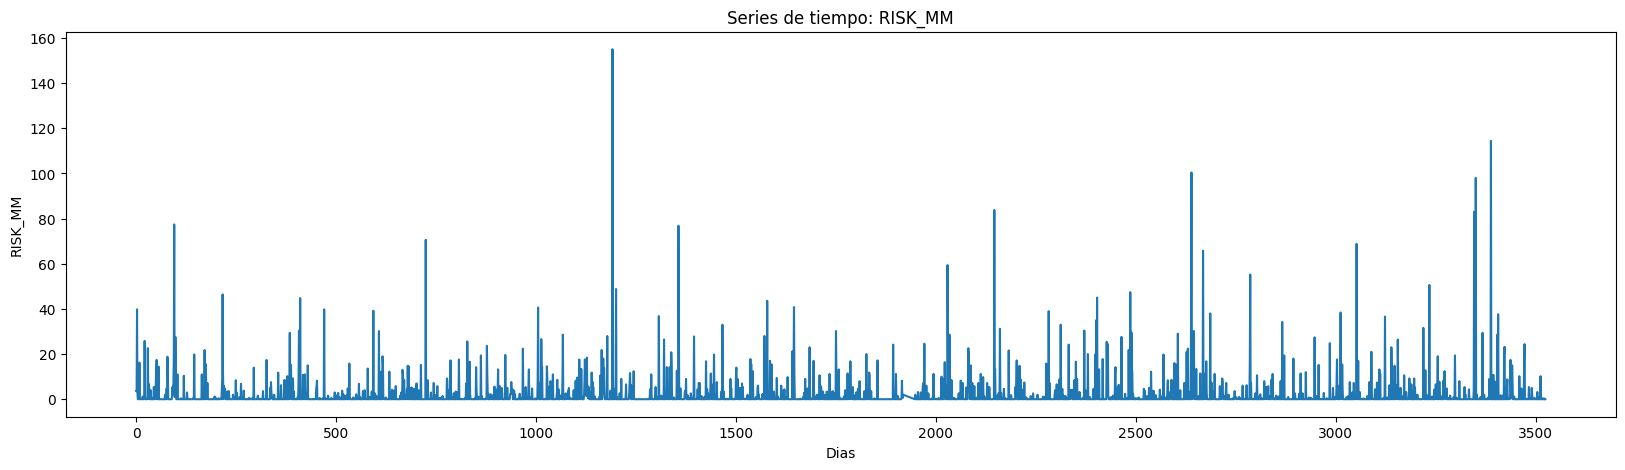

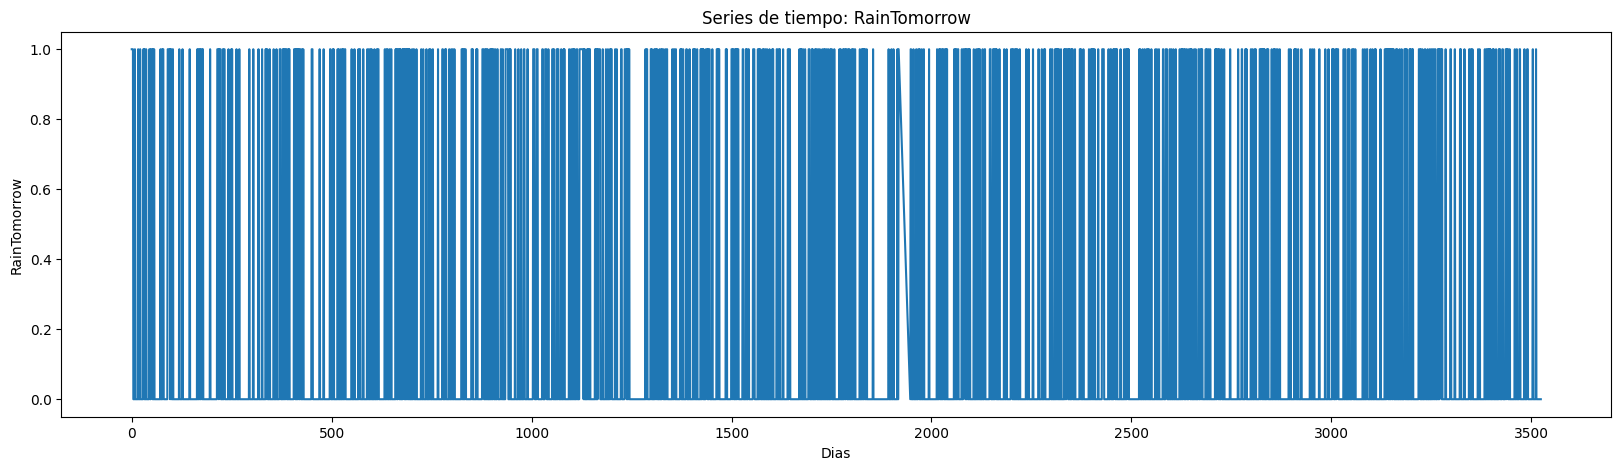

In [22]:
import matplotlib.pyplot as plt

# Define el tamaño de cada figura
fig_size = (20, 5)  # Ajusta el tamaño según tus necesidades

# Itera sobre las columnas del DataFrame
for column in df.columns:
    plt.figure(figsize=fig_size)  # Crea una nueva figura para cada columna
    df[column].plot(use_index=False)
    plt.xlabel('Dias')
    plt.ylabel(column)
    plt.title(f'Series de tiempo: {column}')
    plt.show()

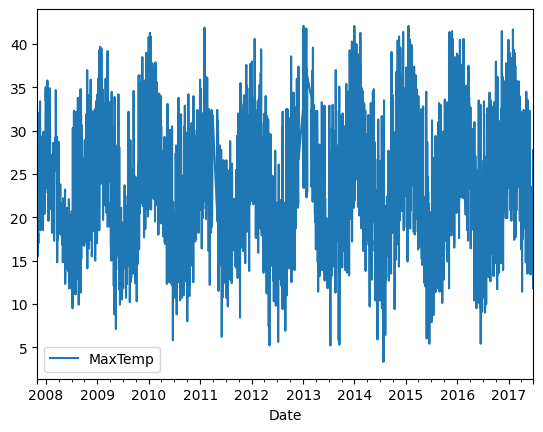

In [23]:
# Serie de tiempo
df.plot(y="MaxTemp")
plt.show()

# Descomposición

In [24]:
# Importar libreria para realizar descomposición de la serie
from statsmodels.tsa.api import (seasonal_decompose)

In [25]:
# Establecer formato de tamaño de gráficos
plt.rcParams["figure.figsize"] = [8, 5]

Text(0.5, 1.05, 'Descomposición de la serie en 30 días (modelo aditivo)')

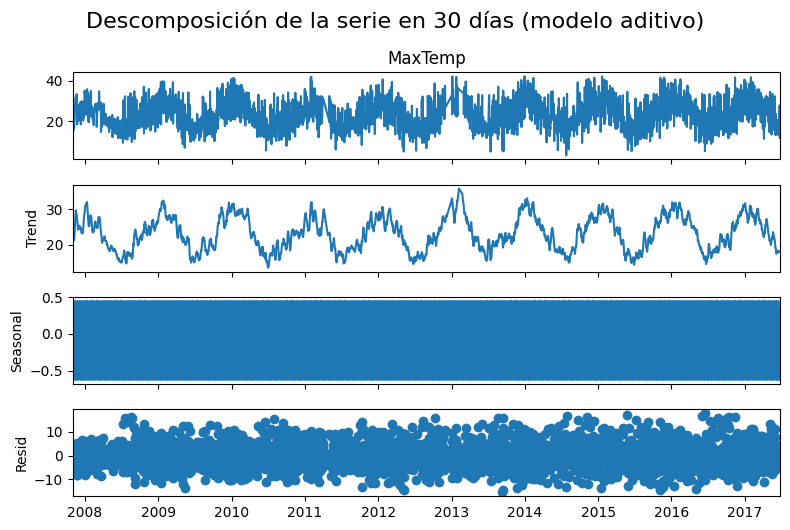

In [26]:
# Descomposición de la serie
sd = seasonal_decompose(df["MaxTemp"],period=12)
sd.plot();
plt.suptitle('Descomposición de la serie en 30 días (modelo aditivo)', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Descomposición de la serie en 1 año (modelo aditivo)')

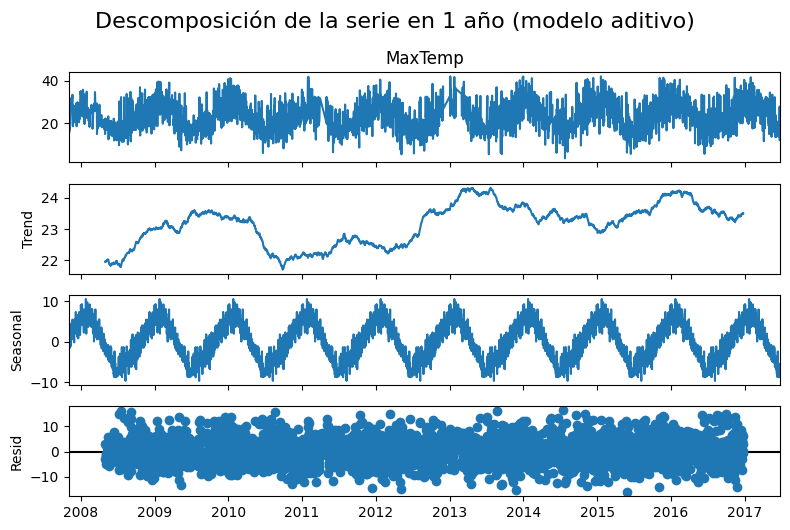

In [27]:
# Descomposición de la serie
sd = seasonal_decompose(df["MaxTemp"],period=365)
sd.plot();
plt.suptitle('Descomposición de la serie en 1 año (modelo aditivo)', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Descomposición de la serie en 1 año (modelo multiplicativo)')

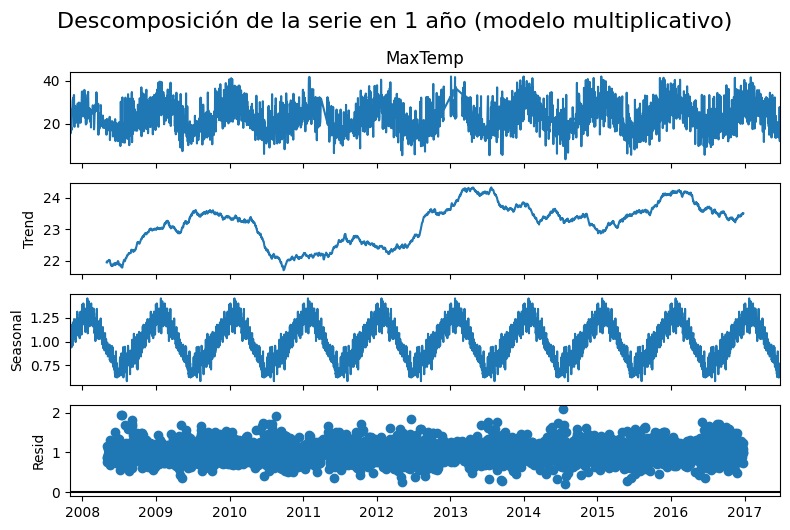

In [28]:
# Descomposición de la serie
sd = seasonal_decompose(df["MaxTemp"],model="multiplicative",period=365)
sd.plot();
plt.suptitle('Descomposición de la serie en 1 año (modelo multiplicativo)', fontsize=16, y=1.05)

# Autocovarianza

In [29]:
#Calcular la varianza de la serie de tiempo
varianza = df['MaxTemp'].var()
print(varianza)

47.52050802799859


In [30]:
#Calcular la autocovarianza con lag de 1
autocovarianza_lag1 = df['MaxTemp'].cov(df['MaxTemp'].shift(1))
#Calcular la autocovarianza con lag de 7
autocovarianza_lag7 = df['MaxTemp'].cov(df['MaxTemp'].shift(7))
#Calcular la autocovarianza con lag de 30
autocovarianza_lag30 = df['MaxTemp'].cov(df['MaxTemp'].shift(30))
print("Autocovarianza:")
print("Autocovarianza con 1 rezago: ",round(autocovarianza_lag1,4))
print("Autocovarianza con 7 rezagos: ", round(autocovarianza_lag7,4))
print("Autocovarianza con 30 rezagos: ", round(autocovarianza_lag30,4))

Autocovarianza:
Autocovarianza con 1 rezago:  21.4506
Autocovarianza con 7 rezagos:  18.9616
Autocovarianza con 30 rezagos:  16.5615


In [31]:
print("Comparación con la varianza:")
print("Autocovarianza con 1 rezago:", round(autocovarianza_lag1 / varianza,4))
print("Autocovarianza con 7 rezagos:", round(autocovarianza_lag7 / varianza,4))
print("Autocovarianza con 30 rezagos:", round(autocovarianza_lag30 / varianza,4))

Comparación con la varianza:
Autocovarianza con 1 rezago: 0.4514
Autocovarianza con 7 rezagos: 0.399
Autocovarianza con 30 rezagos: 0.3485


# Autocorrelación

In [32]:
autocorrelation_lag1 = df['MaxTemp'].autocorr(lag=1)
print("Autocorrelación con 1 rezago: ", round(autocorrelation_lag1,4))

autocorrelation_lag7 = df['MaxTemp'].autocorr(lag=7)
print("Autocorrelación con 7 rezagos: ", round(autocorrelation_lag7,4))

autocorrelation_lag30 = df['MaxTemp'].autocorr(lag=30)
print("Autocorrelación con 30 rezagos: ", round(autocorrelation_lag30,4))

Autocorrelación con 1 rezago:  0.4513
Autocorrelación con 7 rezagos:  0.3989
Autocorrelación con 30 rezagos:  0.3479


In [33]:
# Importar librería
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

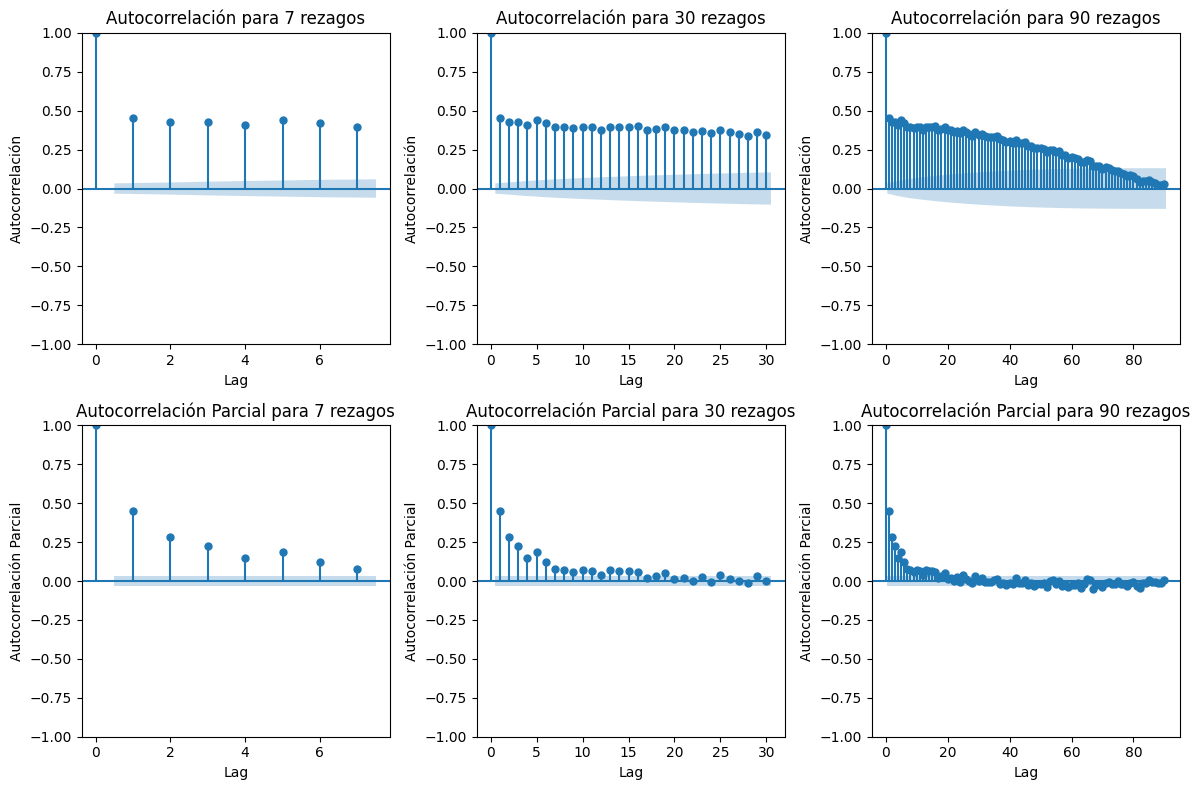

In [34]:
# Números de rezagos
lag_numbers = [7, 30, 90]

# Títulos
titles_acf = ['Autocorrelación para 7 rezagos', 'Autocorrelación para 30 rezagos', 'Autocorrelación para 90 rezagos']
titles_pacf = ['Autocorrelación Parcial para 7 rezagos', 'Autocorrelación Parcial para 30 rezagos', 'Autocorrelación Parcial para 90 rezagos']

# Configurar el número total de gráficos
num_plots = len(lag_numbers)

# Configurar el número de filas y columnas
num_rows = 2
num_cols = num_plots

# Configurar el tamaño de la figura
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Generar los gráficos de ACF
for lag, title, ax in zip(lag_numbers, titles_acf, axes[0]):
    plot_acf(df['MaxTemp'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación')

# Generar los gráficos de PACF
for lag, title, ax in zip(lag_numbers, titles_pacf, axes[1]):
    plot_pacf(df['MaxTemp'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación Parcial')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

# Estacionariedad

In [35]:
# Definir función para calcular estacionariedad
def print_results(output, test='adf'):
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    decision = 'No Estacionaria'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Estacionaria'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Estacionaria'
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Rezagos': lags,
    'Decisión': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value

    return pd.Series(output_dict, name=test)

In [36]:
adf_output = adfuller(df['MaxTemp'])
kpss_output = kpss(df['MaxTemp'])
pd.concat([
    print_results(adf_output, 'adf'),
    print_results(kpss_output, 'kpss')
    ], axis=1)

adf          kpss
Test Statistic            -4.287317      0.111712
p-value                    0.000467           0.1
Rezagos                          18            35
Decisión               Estacionaria  Estacionaria
Critical Value (1%)       -3.432217         0.739
Critical Value (5%)       -2.862365         0.463
Critical Value (10%)      -2.567209         0.347
Critical Value (2.5%)           NaN         0.574

# MODELOS ESTOCÁSTICOS

# PREPROCESAMIENTO

In [37]:
# Asegurarse de que el índice es de tipo datetime
df.index = pd.to_datetime(df.index, errors='coerce')

# Calcular el índice que represente aproximadamente el 80% de tus datos
index_split = int(len(df) * 0.80)

# Seleccionar la fecha correspondiente al índice calculado
split_date = df.iloc[index_split].name

print(f"Fecha de división: {split_date}")

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df.loc[df.index <= split_date]
test = df.loc[df.index > split_date]

print(f'Train set: {train.shape}')
print(f'Test set: {test.shape}')


Fecha de división: 2015-07-22 00:00:00
Train set: (2821, 23)
Test set: (704, 23)


In [38]:
# Definir variable objetivo
y_train = train["MaxTemp"]
y_test = test["MaxTemp"]

In [39]:
# Últimas fechas del conjunto de entrenamiento
y_train.tail()

Date
2015-07-18    15.2
2015-07-19    17.5
2015-07-20    20.9
2015-07-21    19.3
2015-07-22    14.3
Freq: D, Name: MaxTemp, dtype: float64

In [40]:
# Primeras fechas del conjunto de prueba
y_test.head()

Date
2015-07-23    26.9
2015-07-24    11.6
2015-07-25    17.7
2015-07-26    11.4
2015-07-27    17.6
Freq: D, Name: MaxTemp, dtype: float64

# Modelo AR(p)

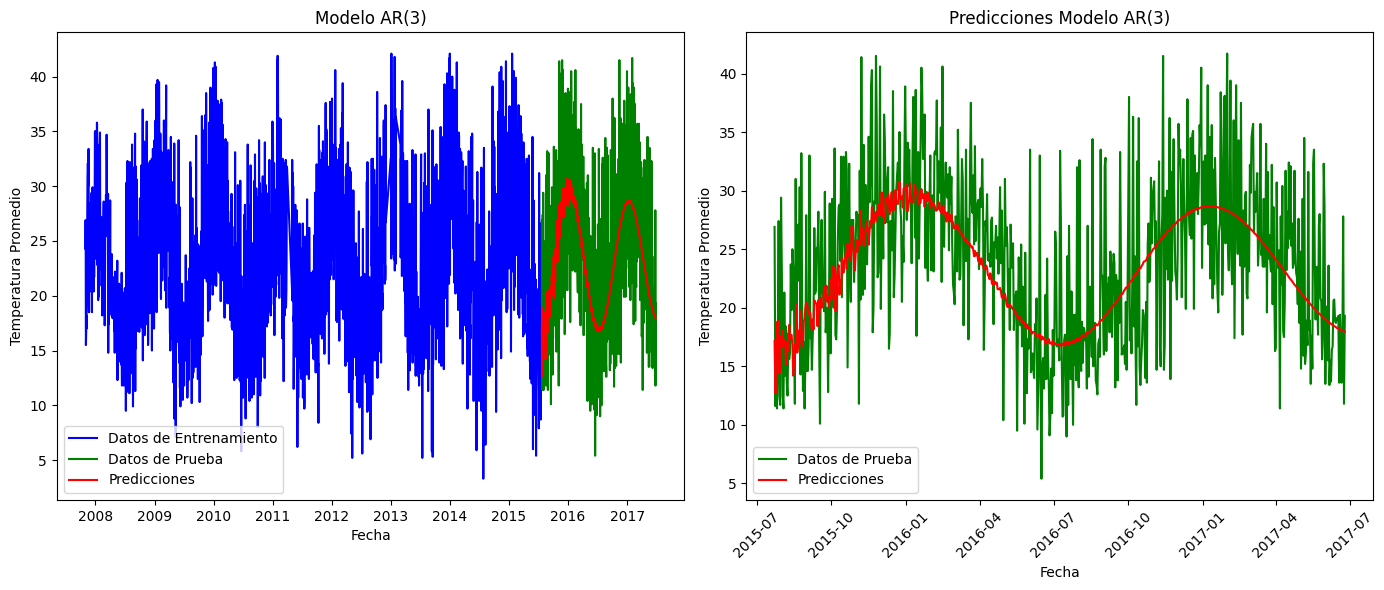

            Predicción AR(3)  Observación
Date                                     
2015-07-23         17.151725         26.9
2015-07-24         12.677358         11.6
2015-07-25         16.990826         17.7
2015-07-26         18.776886         11.4
2015-07-27         17.445049         17.6
...                      ...          ...
2017-06-21         18.070993         13.6
2017-06-22         18.050470         16.7
2017-06-23         18.019629         27.8
2017-06-24         17.994567         11.8
2017-06-25         17.960844         19.3

[704 rows x 2 columns]


In [41]:
# Asegurarse de que el índice es un DatetimeIndex y está en orden cronológico
y_train.index = pd.to_datetime(y_train.index)
y_train = y_train.sort_index()
y_test.index = pd.to_datetime(y_test.index)
y_test = y_test.sort_index()

# Resamplear los datos a una frecuencia diaria y rellenar valores faltantes con interpolación
y_train = y_train.resample('D').interpolate()
y_test = y_test.resample('D').interpolate()

# Ahora, el índice tiene una frecuencia definida
y_train.index.freq = 'D'
y_test.index.freq = 'D'

# Modelo AR
modelo_AR = AutoReg(y_train, lags=200)
result = modelo_AR.fit()

# Predicción
pred_AR = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Ajustar el rango de fechas de las predicciones para que coincida con el índice de y_test
pred_df = pd.DataFrame({"Predicción AR(3)": pred_AR, "Observación": y_test})
pred_df.index = y_test.index  # Asegurarse de que las predicciones usen el índice de y_test

# Gráfico
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(y_test, label="Datos de Prueba", color="green")
plt.plot(pred_df['Predicción AR(3)'], label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Promedio")
plt.title("Modelo AR(3)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test, label="Datos de Prueba", color="green")
plt.plot(pred_df['Predicción AR(3)'], label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Promedio")
plt.title("Predicciones Modelo AR(3)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imprimir la tabla
print(pred_df)

In [42]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_AR = mean_absolute_error(y_test, pred_AR)
mape_AR = mean_absolute_percentage_error(y_test, pred_AR)
rmse_AR = rmse(y_test, pred_AR)
rmspe_AR = rmspe(y_test, pred_AR)
r2_AR = r2_score(y_test, pred_AR)

# Imprimir las métricas
print(f"MAE: {mae_AR:.2f}")
print(f"MAPE: {mape_AR:.2f}%")
print(f"RMSE: {rmse_AR:.2f}")
print(f"RMSPE: {rmspe_AR:.2f}%")
print(f"r2: {r2_AR:.2f}")

MAE: 4.60
MAPE: 0.21%
RMSE: 5.81
RMSPE: 2.82%
r2: 0.33


# Modelo MA(q)

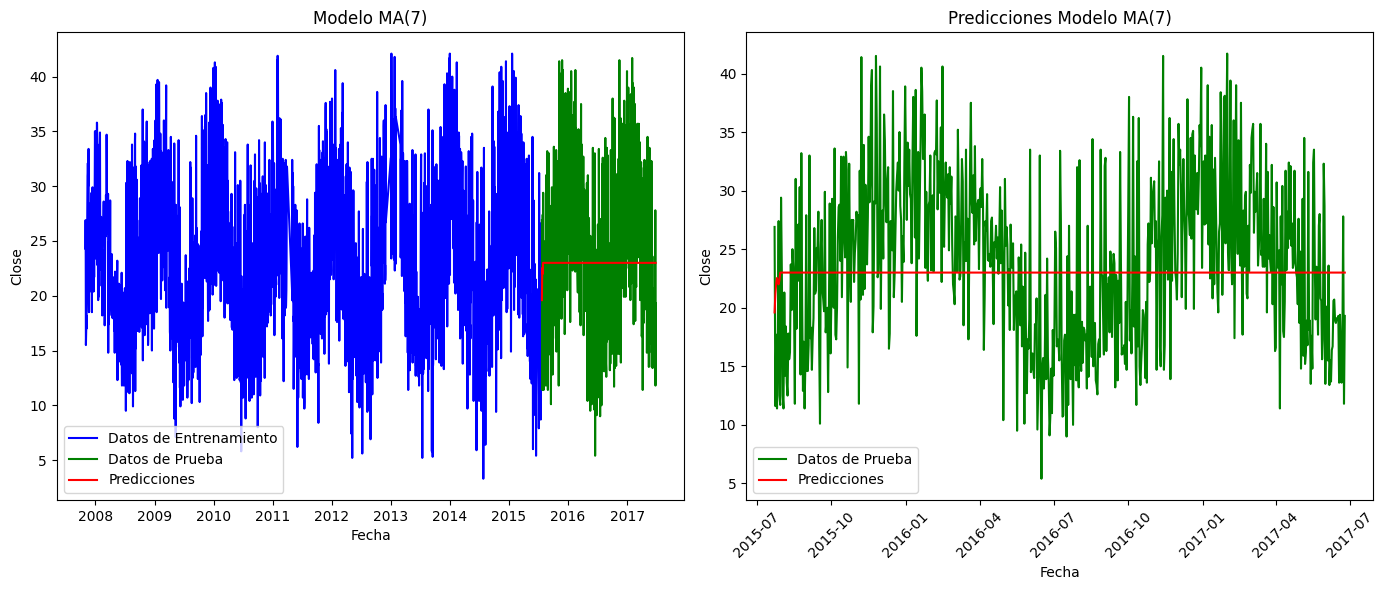

            Predicción MA(7)  Observación
Fecha                                    
2015-07-23         19.598675    26.900000
2015-07-24         21.188757    11.600000
2015-07-25         22.070728    17.700000
2015-07-26         22.539271    11.400000
2015-07-27         22.195935    17.600000
2015-07-28         21.996772    27.400000
2015-07-29         22.356708    12.500000
2015-07-30         23.001568    11.700000
2015-07-31         23.001568    29.400000
2015-08-01         23.001568    22.900000
2015-08-02         23.001568    12.500000
2015-08-03         23.001568    11.400000
2015-08-04         23.001568    21.300000
2015-08-05         23.001568    14.200000
2015-08-06         23.001568    18.400000
2015-08-07         23.001568    13.600000
2015-08-08         23.001568    12.500000
2015-08-09         23.001568    17.800000
2015-08-10         23.001568    15.600000
2015-08-11         23.001568    16.200000
2015-08-12         23.001568    23.700000
2015-08-13         23.001568    19

In [43]:
# Ajustar el modelo MA con los datos de entrenamiento
modelo_MA = ARIMA(y_train, order=(0, 0, 7))  # (p=0, d=0, q=7) para un modelo MA con 7 rezagos
result = modelo_MA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_MA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_MA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo MA(7)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_MA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo MA(7)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción MA(7)": pred_MA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))




In [44]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_MA = mean_absolute_error(y_test, pred_MA)
mape_MA = mean_absolute_percentage_error(y_test, pred_MA)
rmse_MA = rmse(y_test, pred_MA)
rmspe_MA = rmspe(y_test, pred_MA)
r2_MA = r2_score(y_test, pred_MA)

# Imprimir las métricas
print(f"MAE: {mae_MA:.2f}")
print(f"MAPE: {mape_MA:.2f}%")
print(f"RMSE: {rmse_MA:.2f}")
print(f"RMSPE: {rmspe_MA:.2f}%")
print(f"r2: {r2_MA:.2f}")

MAE: 5.94
MAPE: 0.28%
RMSE: 7.17
RMSPE: 3.81%
r2: -0.02


# Modelo ARMA

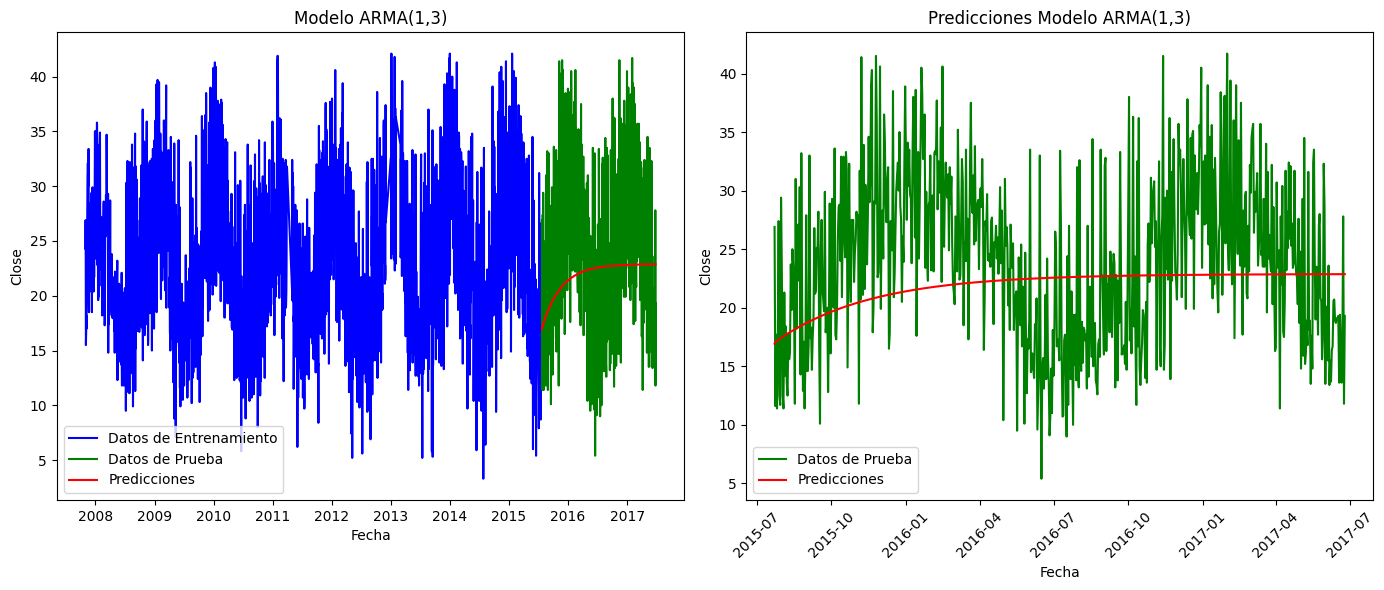

            Predicción ARMA(1,3)  Observación
Fecha                                        
2015-07-23             16.926541    26.900000
2015-07-24             17.045148    11.600000
2015-07-25             17.139953    17.700000
2015-07-26             17.188467    11.400000
2015-07-27             17.236570    17.600000
2015-07-28             17.284267    27.400000
2015-07-29             17.331561    12.500000
2015-07-30             17.378455    11.700000
2015-07-31             17.424953    29.400000
2015-08-01             17.471058    22.900000
2015-08-02             17.516774    12.500000
2015-08-03             17.562103    11.400000
2015-08-04             17.607050    21.300000
2015-08-05             17.651616    14.200000
2015-08-06             17.695806    18.400000
2015-08-07             17.739623    13.600000
2015-08-08             17.783069    12.500000
2015-08-09             17.826148    17.800000
2015-08-10             17.868864    15.600000
2015-08-11             17.911218  

In [45]:
# -------------------- MODELAMIENTO -------------------- #


# Ajustar el modelo ARMA con los datos de entrenamiento
modelo_ARMA = ARIMA(y_train, order=(1, 0, 3))  # (p=1, d=0, q=3) para un modelo ARMA con AR(1) y MA(3)
result = modelo_ARMA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_ARMA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo ARMA(1,3)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo ARMA(1,3)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción ARMA(1,3)": pred_ARMA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))

In [46]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_ARMA = mean_absolute_error(y_test, pred_ARMA)
mape_ARMA = mean_absolute_percentage_error(y_test, pred_ARMA)
rmse_ARMA = rmse(y_test, pred_ARMA)
rmspe_ARMA = rmspe(y_test, pred_ARMA)
r2_ARMA = r2_score(y_test, pred_ARMA)

# Imprimir las métricas
print(f"MAE: {mae_ARMA:.2f}")
print(f"MAPE: {mape_ARMA:.2f}%")
print(f"RMSE: {rmse_ARMA:.2f}")
print(f"RMSPE: {rmspe_ARMA:.2f}%")
print(f"r2: {r2_ARMA:.2f}")

MAE: 6.13
MAPE: 0.27%
RMSE: 7.47
RMSPE: 3.62%
r2: -0.11


# Modelo ARIMA(p,d,q)

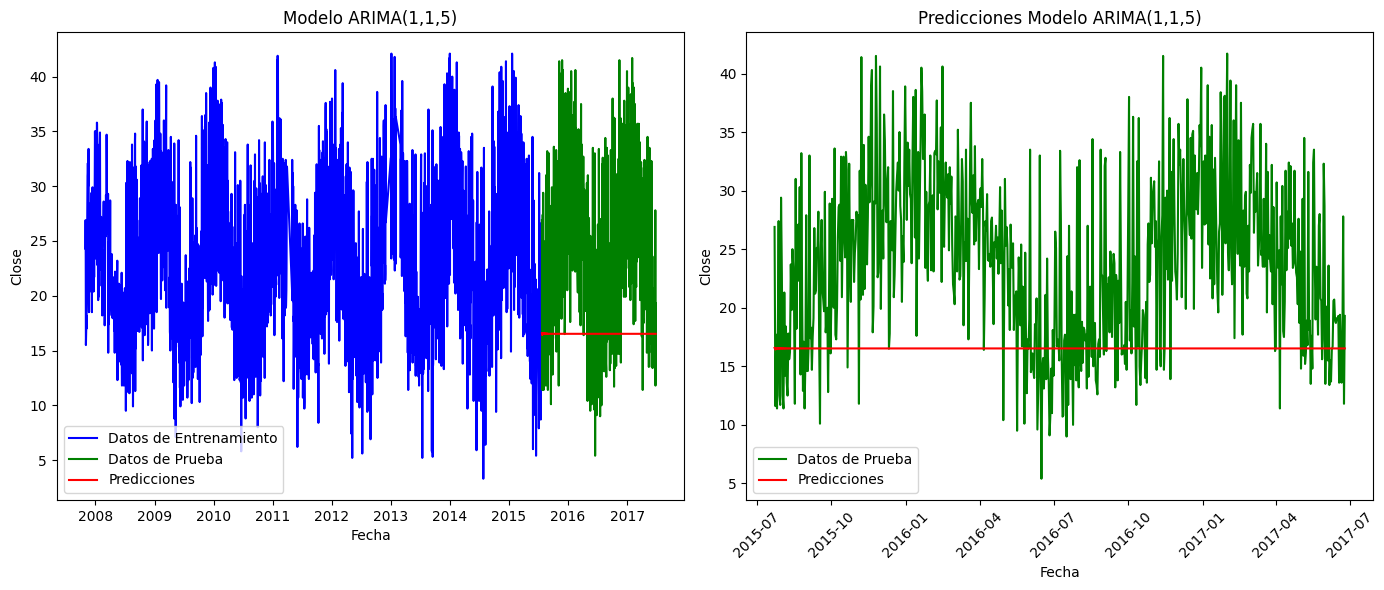

            Predicción ARIMA(1,1,5)  Observación
Fecha                                           
2015-07-23                16.571814    26.900000
2015-07-24                16.431423    11.600000
2015-07-25                16.543703    17.700000
2015-07-26                16.484756    11.400000
2015-07-27                16.562762    17.600000
2015-07-28                16.490084    27.400000
2015-07-29                16.557798    12.500000
2015-07-30                16.494709    11.700000
2015-07-31                16.553489    29.400000
2015-08-01                16.498724    22.900000
2015-08-02                16.549748    12.500000
2015-08-03                16.502209    11.400000
2015-08-04                16.546501    21.300000
2015-08-05                16.505234    14.200000
2015-08-06                16.543683    18.400000
2015-08-07                16.507860    13.600000
2015-08-08                16.541236    12.500000
2015-08-09                16.510140    17.800000
2015-08-10          

In [47]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA con los datos de entrenamiento
modelo_ARIMA = ARIMA(y_train, order=(1, 1, 5))  # (p=1, d=1, q=5) para un modelo ARIMA con AR(1), diferencia de grado 1 y MA(5)
result = modelo_ARIMA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_ARIMA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')  # typ='levels' para obtener las predicciones originales y no las diferencias

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo ARIMA(1,1,5)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo ARIMA(1,1,5)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción ARIMA(1,1,5)": pred_ARIMA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))

In [48]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_ARIMA = mean_absolute_error(y_test, pred_ARIMA)
mape_ARIMA = mean_absolute_percentage_error(y_test, pred_ARIMA)
rmse_ARIMA = rmse(y_test, pred_ARIMA)
rmspe_ARIMA = rmspe(y_test, pred_ARIMA)
r2_ARIMA = r2_score(y_test, pred_ARIMA)

# Imprimir las métricas
print(f"MAE: {mae_ARIMA:.2f}")
print(f"MAPE: {mape_ARIMA:.2f}%")
print(f"RMSE: {rmse_ARIMA:.2f}")
print(f"RMSPE: {rmspe_ARIMA:.2f}%")
print(f"r2: {r2_ARIMA:.2f}")

MAE: 8.45
MAPE: 0.32%
RMSE: 10.37
RMSPE: 3.63%
r2: -1.14


# Modelo SARIMA(p,d,q)(P,D,Q,s)

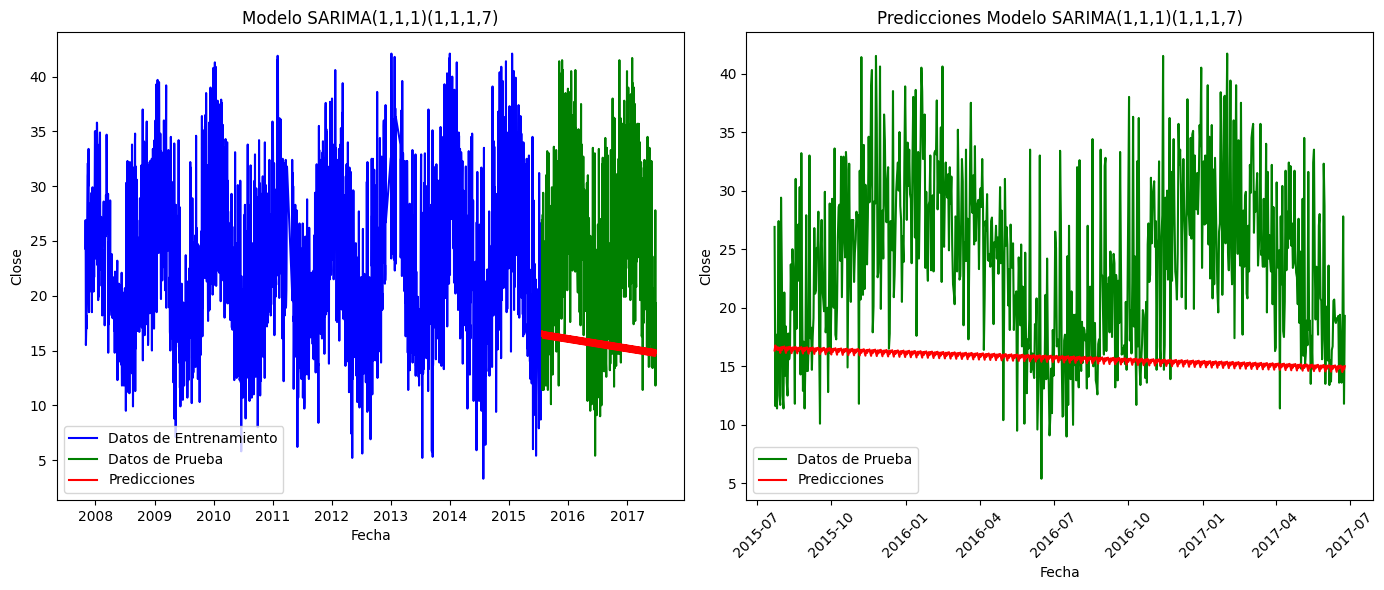

            Predicción SARIMA(1,1,1)(1,1,1,7)  Observación
Fecha                                                     
2015-07-23                          16.348138    26.900000
2015-07-24                          16.783656    11.600000
2015-07-25                          16.444616    17.700000
2015-07-26                          16.639246    11.400000
2015-07-27                          16.385839    17.600000
2015-07-28                          16.610399    27.400000
2015-07-29                          16.499105    12.500000
2015-07-30                          16.148057    11.700000
2015-07-31                          16.634956    29.400000
2015-08-01                          16.380083    22.900000
2015-08-02                          16.654854    12.500000
2015-08-03                          16.540946    11.400000
2015-08-04                          16.695831    21.300000
2015-08-05                          16.397854    14.200000
2015-08-06                          16.138423    18.4000

In [49]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA con los datos de entrenamiento
modelo_SARIMA = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result = modelo_SARIMA.fit()

# Generar un rango de fechas para las predicciones
date_range = pd.date_range(start=y_test.index[0], periods=len(y_test), freq='D')

# Hacer predicciones en el conjunto de prueba
pred_SARIMA = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_SARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo SARIMA(1,1,1)(1,1,1,7)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_SARIMA, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo SARIMA(1,1,1)(1,1,1,7)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción SARIMA(1,1,1)(1,1,1,7)": pred_SARIMA, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))

In [50]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_SARIMA = mean_absolute_error(y_test, pred_SARIMA)
mape_SARIMA = mean_absolute_percentage_error(y_test, pred_SARIMA)
rmse_SARIMA = rmse(y_test, pred_SARIMA)
rmspe_SARIMA = rmspe(y_test, pred_SARIMA)
r2_SARIMA = r2_score(y_test, pred_SARIMA)

# Imprimir las métricas
print(f"MAE: {mae_SARIMA:.2f}")
print(f"MAPE: {mape_SARIMA:.2f}%")
print(f"RMSE: {rmse_SARIMA:.2f}")
print(f"RMSPE: {rmspe_SARIMA:.2f}%")
print(f"r2: {r2_SARIMA:.2f}")

MAE: 9.06
MAPE: 0.34%
RMSE: 11.00
RMSPE: 3.81%
r2: -1.41


# Modelo ARIMAX(p,d,q)

In [51]:
# Todas las columnas excepto "Close" son variables exógenas
X_train = train.drop(columns=["MaxTemp"])
X_test = test.drop(columns=["MaxTemp"])

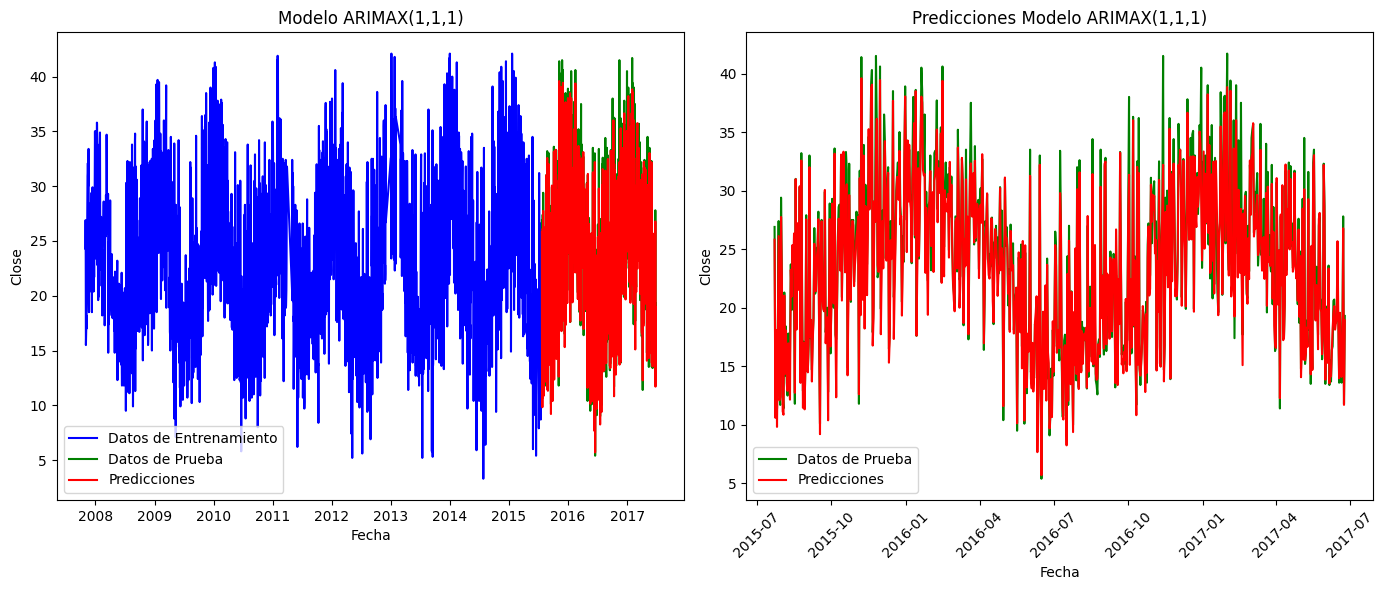

            Predicción ARIMAX(1,1,1)  Observación
Fecha                                            
2015-07-23                 25.811096    26.900000
2015-07-24                 10.602375    11.600000
2015-07-25                 18.092482    17.700000
2015-07-26                  9.826871    11.400000
2015-07-27                 17.855698    17.600000
2015-07-28                 26.118792    27.400000
2015-07-29                 12.105782    12.500000
2015-07-30                 12.358798    11.700000
2015-07-31                 27.749112    29.400000
2015-08-01                 22.586433    22.900000
2015-08-02                 11.155937    12.500000
2015-08-03                 10.865578    11.400000
2015-08-04                 21.041218    21.300000
2015-08-05                 14.363871    14.200000
2015-08-06                 18.052553    18.400000
2015-08-07                 14.537276    13.600000
2015-08-08                 12.902974    12.500000
2015-08-09                 16.959518    17.800000


In [52]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMAX con los datos de entrenamiento
modelo_ARIMAX = ARIMA(y_train, order=(1, 1, 1), exog=X_train)
result = modelo_ARIMAX.fit()

# Hacer predicciones en el conjunto de prueba
pred_ARIMAX = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo ARIMAX(1,1,1)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo ARIMAX(1,1,1)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción ARIMAX(1,1,1)": pred_ARIMAX, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))

In [53]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_ARIMAX = mean_absolute_error(y_test, pred_ARIMAX)
mape_ARIMAX = mean_absolute_percentage_error(y_test, pred_ARIMAX)
rmse_ARIMAX = rmse(y_test, pred_ARIMAX)
rmspe_ARIMAX = rmspe(y_test, pred_ARIMAX)
r2_ARIMAX = r2_score(y_test, pred_ARIMAX)

# Imprimir las métricas
print(f"MAE: {mae_ARIMAX:.2f}")
print(f"MAPE: {mape_ARIMAX:.2f}%")
print(f"RMSE: {rmse_ARIMAX:.2f}")
print(f"RMSPE: {rmspe_ARIMAX:.2f}%")
print(f"r2: {r2_ARIMAX:.2f}")

MAE: 1.05
MAPE: 0.04%
RMSE: 1.67
RMSPE: 0.68%
r2: 0.94


# Modelo SARIMAX(p,d,q)(P,D,Q,s)

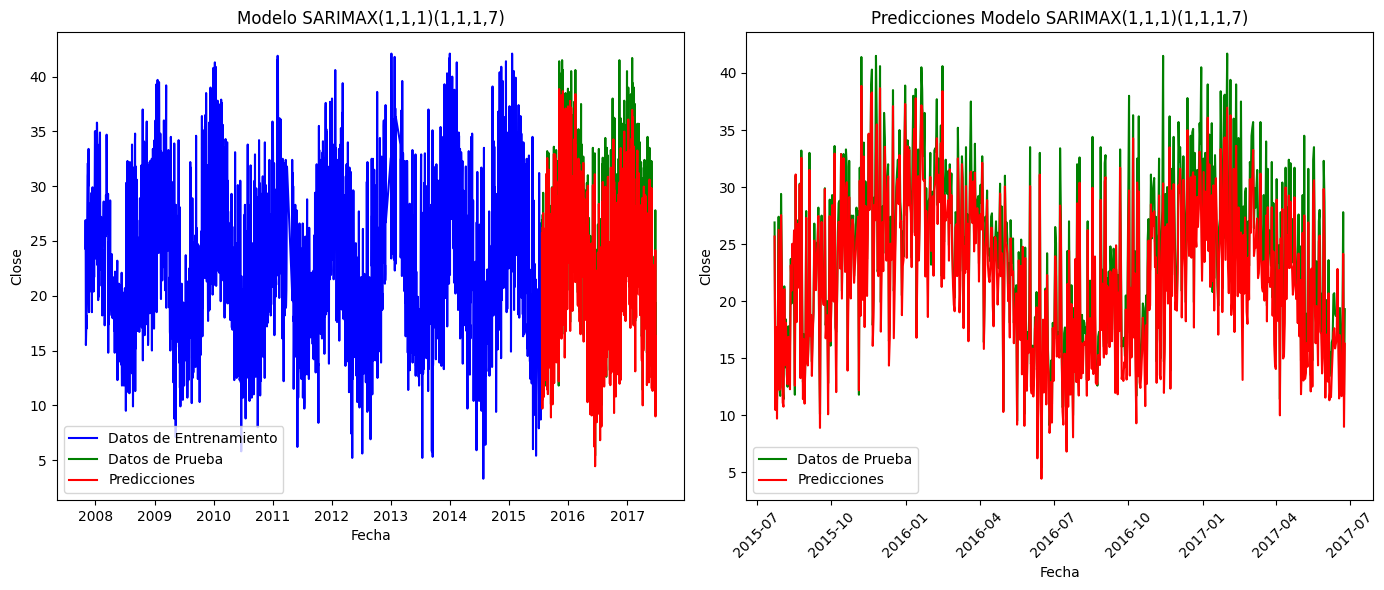

            Predicción SARIMAX(1,1,1)(1,1,1,7)  Observación
Fecha                                                      
2015-07-23                           25.663629    26.900000
2015-07-24                           10.459909    11.600000
2015-07-25                           17.714356    17.700000
2015-07-26                            9.708255    11.400000
2015-07-27                           17.801325    17.600000
2015-07-28                           26.250422    27.400000
2015-07-29                           12.218543    12.500000
2015-07-30                           12.416598    11.700000
2015-07-31                           27.544506    29.400000
2015-08-01                           22.252592    22.900000
2015-08-02                           11.121250    12.500000
2015-08-03                           10.751835    11.400000
2015-08-04                           21.052812    21.300000
2015-08-05                           14.420069    14.200000
2015-08-06                           18.

In [54]:
# -------------------- MODELAMIENTO -------------------- #
# Ajustar el modelo SARIMAX con los datos de entrenamiento
modelo_SARIMAX = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result = modelo_SARIMAX.fit()

# Hacer predicciones en el conjunto de prueba
pred_SARIMAX = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_SARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo SARIMAX(1,1,1)(1,1,1,7)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_SARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo SARIMAX(1,1,1)(1,1,1,7)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción SARIMAX(1,1,1)(1,1,1,7)": pred_SARIMAX, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))

In [55]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_SARIMAX = mean_absolute_error(y_test, pred_SARIMAX)
mape_SARIMAX = mean_absolute_percentage_error(y_test, pred_SARIMAX)
rmse_SARIMAX = rmse(y_test, pred_SARIMAX)
rmspe_SARIMAX = rmspe(y_test, pred_SARIMAX)
r2_SARIMAX = r2_score(y_test, pred_SARIMAX)

# Imprimir las métricas
print(f"MAE: {mae_SARIMAX:.2f}")
print(f"MAPE: {mape_SARIMAX:.2f}%")
print(f"RMSE: {rmse_SARIMAX:.2f}")
print(f"RMSPE: {rmspe_SARIMAX:.2f}%")
print(f"r2: {r2_SARIMAX:.2f}")

MAE: 2.09
MAPE: 0.09%
RMSE: 2.58
RMSPE: 1.07%
r2: 0.87


# REDES NEURONALES


# PREPROCESAMIENTO

In [56]:
# Fijar la semilla aleatoria para reproducibilidad
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# Calcular el índice que represente aproximadamente el 80% de tus datos
index_split = int(len(df) * 0.80)

# Especificar el punto de división del conjunto de entrenamiento y prueba
split_date = df.iloc[index_split].name  # Se utiliza como fecha de corte el último mes del dataset
# (Dependiendo del caso, el tamaño del conjunto de prueba puede ser mayor o menor)

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df.loc[df.index <= split_date]
test = df.loc[df.index > split_date]

# Definir variable objetivo
y_train = train["MaxTemp"]
y_test = test["MaxTemp"]

# Todas las columnas excepto "Close" son variables exógenas
X_train = train.drop(columns=["MaxTemp"])
X_test = test.drop(columns=["MaxTemp"])

# -------------------- NORMALIZACIÓN DE LOS DATOS -------------------- #

# Importar librerías necesarias
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Normalizar los datos de entrenamiento y prueba de las variables exógenas
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Convertir DataFrame a array de numpy
X_train = np.array(X_train)
X_test = np.array(X_test)

# Redimensionar los datos normalizados para que se ajusten al formato de entrada de la red neuronal
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [58]:
print(X_train.shape)
print(X_test.shape)

(2821, 1, 22)
(704, 1, 22)


# SimpleRNN

In [59]:
# Importar las bibliotecas necesarias
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# -------------------- DEFINICIÓN DEL MODELO -------------------- #
modelo_RNN = Sequential()

# ------------------ CAPAS DE LA RED NEURONAL ------------------ #

# 1. Capa de entrada:
modelo_RNN.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
modelo_RNN.add(Dropout(0.2))

# 2. Capas ocultas:
modelo_RNN.add(LSTM(units=50, activation='relu', return_sequences=True))
modelo_RNN.add(Dropout(0.2))
modelo_RNN.add(LSTM(units=50, activation='relu'))
modelo_RNN.add(Dropout(0.2))
modelo_RNN.add(Dense(50, activation='relu'))
modelo_RNN.add(Dropout(0.2))

# 3. Capa de salida
modelo_RNN.add(Dense(1))

# -------------------- COMPILACIÓN -------------------- #
modelo_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# -------------------- CALLBACKS -------------------- #
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# -------------------- ENTRENAMIENTO -------------------- #
entrenamiento = modelo_RNN.fit(X_train, y_train, 
                               epochs=100, 
                               batch_size=32, 
                               validation_data=(X_test, y_test), 
                               verbose=1,
                               callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 544.0572 - val_loss: 184.1454
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155.0161 - val_loss: 45.5712
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.2505 - val_loss: 21.3694
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.1356 - val_loss: 11.6622
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.3467 - val_loss: 9.4014
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.1958 - val_loss: 7.6236
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.3853 - val_loss: 5.3954
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3269 - val_loss: 6.4451
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.0837 - val_loss: 5.5678
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.2458 - val_loss: 4.7463
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.7222 - val_loss: 4.5447
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

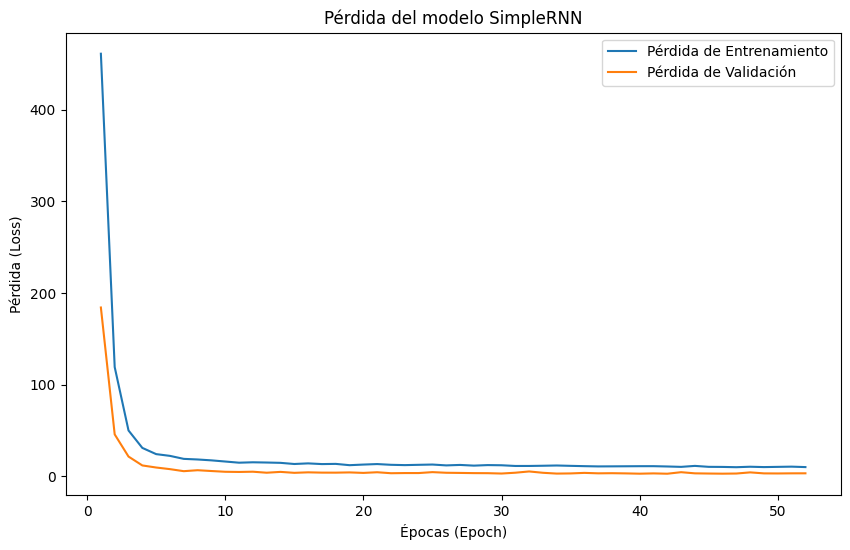

In [61]:
# ------------------- PÉRDIDA DEL MODELO ------------------- #

# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Graficar la función de pérdida versus las épocas
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de Validación')
plt.title('Pérdida del modelo SimpleRNN')
plt.xlabel('Épocas (Epoch)')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


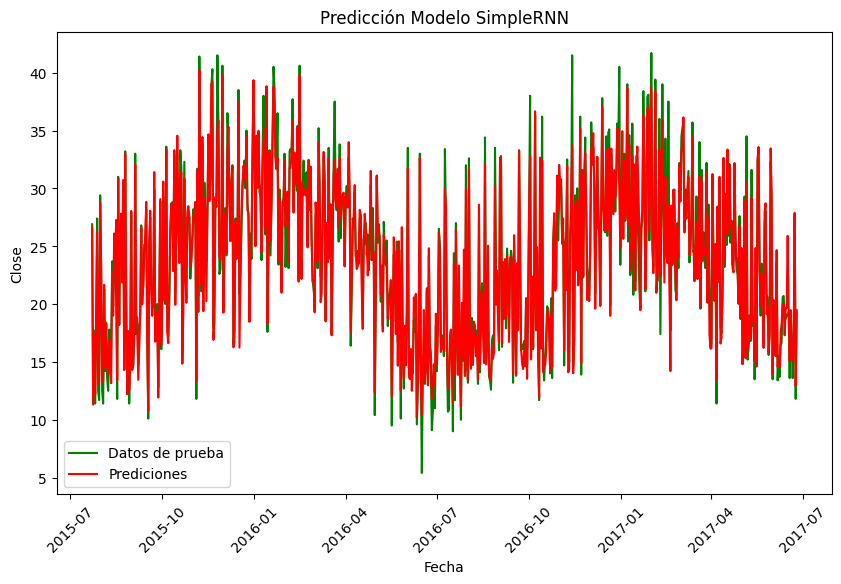

In [62]:
# -------------------- PREDICCIÓN -------------------- #

# Realizar predicciones con el conjunto de prueba de las variables exógenas
pred_RNN = modelo_RNN.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, color='green', label='Datos de prueba')
plt.plot(y_test.index, pred_RNN, color='red', label='Prediciones')
plt.title('Predicción Modelo SimpleRNN')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados
plt.show()

In [63]:
# -------------------- EVALUACIÓN -------------------- #

# Importar librerías necesarias
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

# Calcular las métricas
mae_RNN = mean_absolute_error(y_test, pred_RNN)
mape_RNN = mean_absolute_percentage_error(y_test, pred_RNN)
rmse_RNN = np.sqrt(mean_squared_error(y_test, pred_RNN))
rmspe_RNN = rmspe(y_test, pred_RNN)[0]  # Tomamos el primer valor del array
r2_RNN = r2_score(y_test, pred_RNN)

# Imprimir las métricas
print(f"MAE: {mae_RNN:.2f}")
print(f"MAPE: {mape_RNN:.2f}%")
print(f"RMSE: {rmse_RNN:.2f}")
print(f"RMSPE: {rmspe_RNN:.2f}%")
print(f"R2: {r2_RNN:.2f}")

MAE: 1.08
MAPE: 0.05%
RMSE: 1.62
RMSPE: 0.09%
R2: 0.95


# Red LSTM

In [64]:
# Importar librerías necesarias
from keras.layers import LSTM

# -------------------- DEFINICIÓN DEL MODELO -------------------- #

# Creación de un modelo con estructura secuencial
modelo_LSTM = Sequential()

# ------------------ CAPAS DE LA RED NEURONAL ------------------ #

# 1. Capa de entrada:
# Capa LSTM con 50 neuronas y función de activación ReLU para extraer características de la secuencia de entrada.
modelo_LSTM.add(LSTM(units=50, activation='relu'))

# 2. Capas ocultas:

# Capa densa con regularización L2 (λ = 0.01) para controlar el crecimiento de los pesos y reducir el sobreajuste:
modelo_LSTM.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))

# 3. Capa de salida
modelo_LSTM.add(Dense(1))

# -------------------- COMPILACIÓN -------------------- #

# Compilar el modelo con optimizador Adam con tasa de aprendizaje=0.001 para disminuir la función de pérdida mse
modelo_LSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# -------------------- ENTRENAMIENTO -------------------- #

# Entrenar el modelo con los conjuntos de entrenamiento
entrenamiento = modelo_LSTM.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 547.1689 - val_loss: 309.3908
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 174.9079 - val_loss: 58.1344
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 48.0940 - val_loss: 29.5161
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.5227 - val_loss: 19.3170
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.8741 - val_loss: 13.5371
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3775 - val_loss: 10.1776
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2613 - val_loss: 8.2409
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4208 - val_loss: 7.0839
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2726 - val_loss: 6.3364
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5198 - val_loss: 5.8184
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9995 - val_loss: 5.4270
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

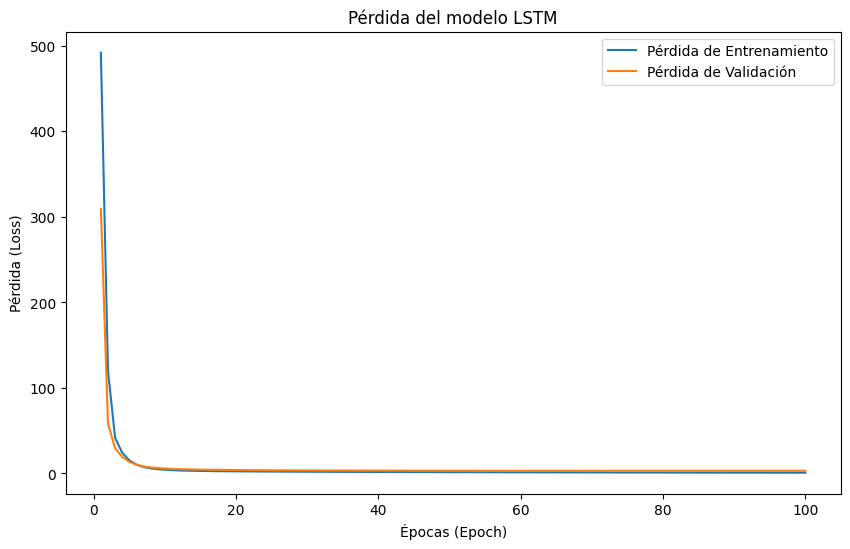

In [65]:
# ------------------- PÉRDIDA DEL MODELO ------------------- #

# Graficar la función de pérdida versus las épocas
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de Validación')
plt.title('Pérdida del modelo LSTM')
plt.xlabel('Épocas (Epoch)')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


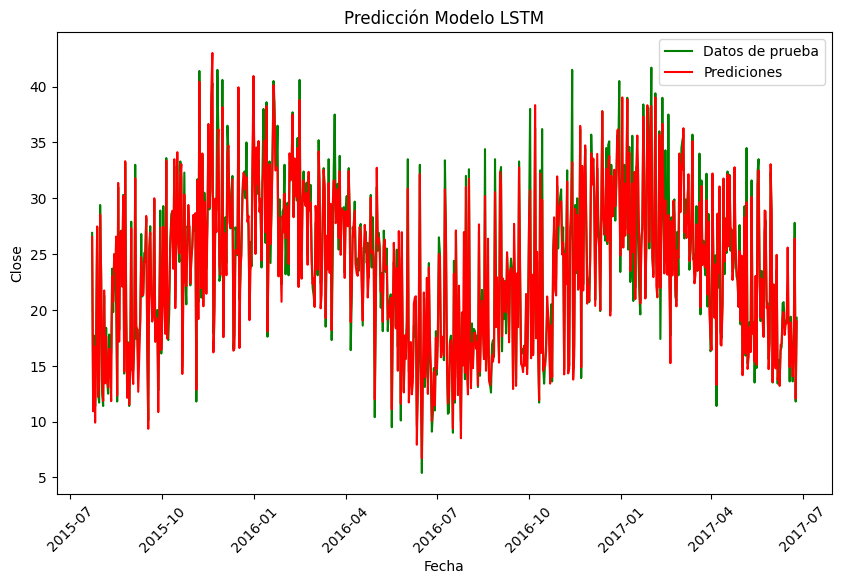

In [66]:
# -------------------- PREDICCIÓN -------------------- #

# Realizar predicciones con el conjunto de prueba de las variables exógenas
pred_LSTM = modelo_LSTM.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, color='green', label='Datos de prueba')
plt.plot(y_test.index, pred_LSTM, color='red', label='Prediciones')
plt.title('Predicción Modelo LSTM')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados
plt.show()

In [67]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas para el modelo LSTM
mae_LSTM = mean_absolute_error(y_test, pred_LSTM)
mape_LSTM = mean_absolute_percentage_error(y_test, pred_LSTM)
rmse_LSTM = np.sqrt(mean_squared_error(y_test, pred_LSTM))
rmspe_LSTM = rmspe(y_test, pred_LSTM)[0]  # Tomamos el primer valor del array
r2_LSTM = r2_score(y_test, pred_LSTM)

# Imprimir las métricas del modelo LSTM
print(f"MAE: {mae_LSTM:.2f}")
print(f"MAPE: {mape_LSTM:.2f}%")
print(f"RMSE: {rmse_LSTM:.2f}")
print(f"RMSPE: {rmspe_LSTM:.2f}%")
print(f"R2: {r2_LSTM:.2f}")


MAE: 1.14
MAPE: 0.05%
RMSE: 1.73
RMSPE: 0.14%
R2: 0.94


# Red GRU

In [68]:
# Importar librerías necesarias
from keras.layers import GRU

# -------------------- DEFINICIÓN DEL MODELO -------------------- #

# Creación de un modelo con estructura secuencial
modelo_GRU = Sequential()

# ------------------ CAPAS DE LA RED NEURONAL ------------------ #

# 1. Capa de entrada:
# Capa GRU con 50 unidades y función de activación relu
modelo_GRU.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# 2. Capas ocultas

# Capa de dropout con una tasa de 20% para regularizar y prevenir el sobreajuste:
modelo_GRU.add(Dropout(0.2))

# Capa densa con regularización L2 (λ = 0.01) para controlar el crecimiento de los pesos y reducir el sobreajuste:
modelo_GRU.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))

# 3. Capa de salida
modelo_GRU.add(Dense(1))

# -------------------- COMPILACIÓN -------------------- #

# Compilar el modelo con optimizador Adam con tasa de aprendizaje=0.001 para disminuir la función de pérdida mse
modelo_GRU.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# -------------------- ENTRENAMIENTO -------------------- #

# Entrenar el modelo con los conjuntos de entrenamiento
entrenamiento = modelo_GRU.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 512.9471 - mean_absolute_error: 21.5210 - val_loss: 146.0360 - val_mean_absolute_error: 10.9134
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 77.9586 - mean_absolute_error: 7.3085 - val_loss: 24.1551 - val_mean_absolute_error: 3.8783
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.6823 - mean_absolute_error: 4.2273 - val_loss: 14.6049 - val_mean_absolute_error: 2.9635
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.4579 - mean_absolute_error: 3.4662 - val_loss: 10.1977 - val_mean_absolute_error: 2.4361
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.3391 - mean_absolute_error: 3.0177 - val_loss: 7.7551 - val_mean_absolute_error: 2.0871
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.6767 - mean_absolute_error: 2.7340 - val_loss: 6.4402 - val_mean_absolute_error: 1.8632
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2120 - mean_absolute_error: 2.

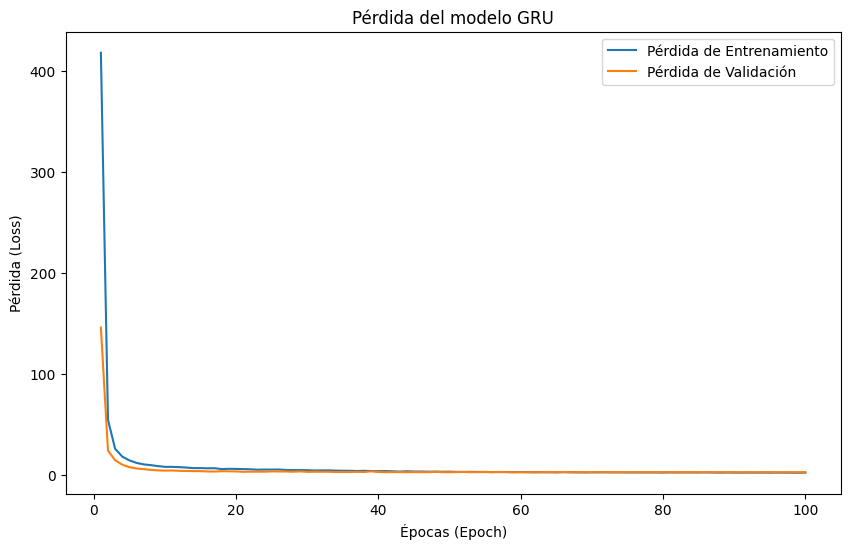

In [69]:
# ------------------- PÉRDIDA DEL MODELO ------------------- #

# Graficar la función de pérdida versus las épocas
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de Validación')
plt.title('Pérdida del modelo GRU')
plt.xlabel('Épocas (Epoch)')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


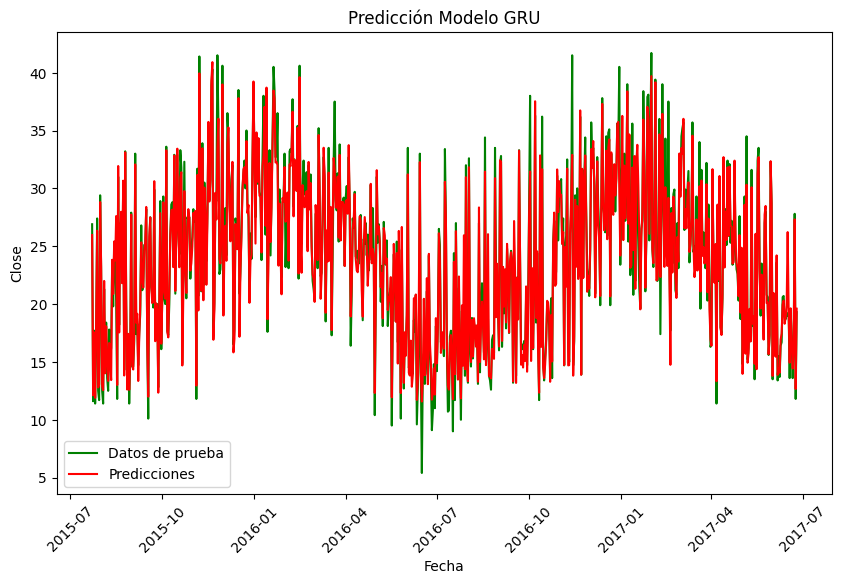

In [70]:
# -------------------- PREDICCIÓN -------------------- #

# Realizar predicciones con el conjunto de prueba de las variables exógenas
pred_GRU = modelo_GRU.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, color='green', label='Datos de prueba')
plt.plot(y_test.index, pred_GRU, color='red', label='Predicciones')
plt.title('Predicción Modelo GRU')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados
plt.show()

In [71]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_GRU = mean_absolute_error(y_test, pred_GRU)
mape_GRU = mean_absolute_percentage_error(y_test, pred_GRU)
rmse_GRU = np.sqrt(mean_squared_error(y_test, pred_GRU))
rmspe_GRU = rmspe(y_test, pred_GRU)[0]  # Tomamos el primer valor del array
r2_GRU = r2_score(y_test, pred_GRU)

# Imprimir las métricas
print(f"MAE: {mae_GRU:.2f}")
print(f"MAPE: {mape_GRU:.2f}%")
print(f"RMSE: {rmse_GRU:.2f}")
print(f"RMSPE: {rmspe_GRU:.2f}%")
print(f"R2: {r2_GRU:.2f}")

MAE: 1.01
MAPE: 0.05%
RMSE: 1.62
RMSPE: 0.35%
R2: 0.95


# EVALUACION

# MODELOS ESTOCASTICOS

In [72]:
# Crear tabla con las métricas de cada modelo
tabla = pd.DataFrame({'Métrica':['MAE:','MAPE:','RMSE:','RMSPE:','r2:'],
                      'AR':[mae_AR,mape_AR,rmse_AR,rmspe_AR,r2_AR],
                      'MA':[mae_MA,mape_MA,rmse_MA,rmspe_MA,r2_MA],
                      'ARMA':[mae_ARMA,mape_ARMA,rmse_ARMA,rmspe_ARMA,r2_ARMA],
                      'ARIMA':[mae_ARIMA,mape_ARIMA,rmse_ARIMA,rmspe_ARIMA,r2_ARIMA],
                      'SARIMA':[mae_SARIMA,mape_SARIMA,rmse_SARIMA,rmspe_SARIMA,r2_SARIMA],
                      'ARIMAX':[mae_ARIMAX,mape_ARIMAX,rmse_ARIMAX,rmspe_ARIMAX,r2_ARIMAX],
                      'SARIMAX':[mae_SARIMAX,mape_SARIMAX,rmse_SARIMAX,rmspe_SARIMAX,r2_SARIMAX]})

# Redondear los valores de la tabla a dos decimales
tabla = tabla.round(2)
tabla

Métrica    AR    MA  ARMA  ARIMA  SARIMA  ARIMAX  SARIMAX
0    MAE:  4.60  5.94  6.13   8.45    9.06    1.05     2.09
1   MAPE:  0.21  0.28  0.27   0.32    0.34    0.04     0.09
2   RMSE:  5.81  7.17  7.47  10.37   11.00    1.67     2.58
3  RMSPE:  2.82  3.81  3.62   3.63    3.81    0.68     1.07
4     r2:  0.33 -0.02 -0.11  -1.14   -1.41    0.94     0.87

El modelo ARIMAX es claramente el mejor según estas métricas, seguido muy de cerca por el SARIMAX. Ambos modelos tienen errores muy bajos y explican casi toda la varianza en los datos, lo que los hace modelos muy adecuados para esta serie temporal en particular. Los modelos ARIMA y SARIMA tienen los peores rendimientos, sugiriendo que no son adecuados para estos datos.

In [73]:

# Definir función para realizar las pruebas de diagnóstico
def diagnostico(predicciones):
    # Calcular residuos
    residuos = y_test.values - predicciones.values

    # Prueba de Normalidad
    stat_normalidad, p_normalidad = shapiro(residuos)
    resultado_normalidad = "Distribución normal." if p_normalidad >= 0.05 else "No siguen una distribución normal."

    # Prueba de Heterocedasticidad
    stat_heterocedasticidad, p_heterocedasticidad = bartlett(residuos, np.arange(len(residuos)))
    resultado_heterocedasticidad = "Homocedásticos." if p_heterocedasticidad >= 0.05 else "Heterocedásticos."

    # Mostrar resultados
    print("Prueba de Normalidad:")
    print(f"  - Estadístico: {stat_normalidad}")
    print(f"  - P-value: {p_normalidad}")
    print(f"  - Resultado: {resultado_normalidad}")
    print("\nPrueba de Heterocedasticidad:")
    print(f"  - Estadístico: {stat_heterocedasticidad}")
    print(f"  - P-value: {p_heterocedasticidad}")
    print(f"  - Resultado: {resultado_heterocedasticidad}")

# Realizar pruebas de diagnóstico para cada modelo
print("Modelo AR:")
diagnostico(pred_AR)

print("\nModelo MA:")
diagnostico(pred_MA)

print("\nModelo ARMA:")
diagnostico(pred_ARMA)

print("\nModelo ARIMA:")
diagnostico(pred_ARIMA)

print("\nModelo SARIMA:")
diagnostico(pred_SARIMA)

print("\nModelo ARIMAX:")
diagnostico(pred_ARIMAX)

print("\nModelo SARIMAX:")
diagnostico(pred_SARIMAX)


Modelo AR:
Prueba de Normalidad:
  - Estadístico: 0.9910331330501317
  - P-value: 0.00028104259502877713
  - Resultado: No siguen una distribución normal.

Prueba de Heterocedasticidad:
  - Estadístico: 4037.6037203744754
  - P-value: 0.0
  - Resultado: Heterocedásticos.

Modelo MA:
Prueba de Normalidad:
  - Estadístico: 0.989020353075483
  - P-value: 4.0158140393894844e-05
  - Resultado: No siguen una distribución normal.

Prueba de Heterocedasticidad:
  - Estadístico: 3743.4961013810403
  - P-value: 0.0
  - Resultado: Heterocedásticos.

Modelo ARMA:
Prueba de Normalidad:
  - Estadístico: 0.9903584913339862
  - P-value: 0.00014375524428890504
  - Resultado: No siguen una distribución normal.

Prueba de Heterocedasticidad:
  - Estadístico: 3733.007430664351
  - P-value: 0.0
  - Resultado: Heterocedásticos.

Modelo ARIMA:
Prueba de Normalidad:
  - Estadístico: 0.9891804094822145
  - P-value: 4.6605047990731504e-05
  - Resultado: No siguen una distribución normal.

Prueba de Heterocedast

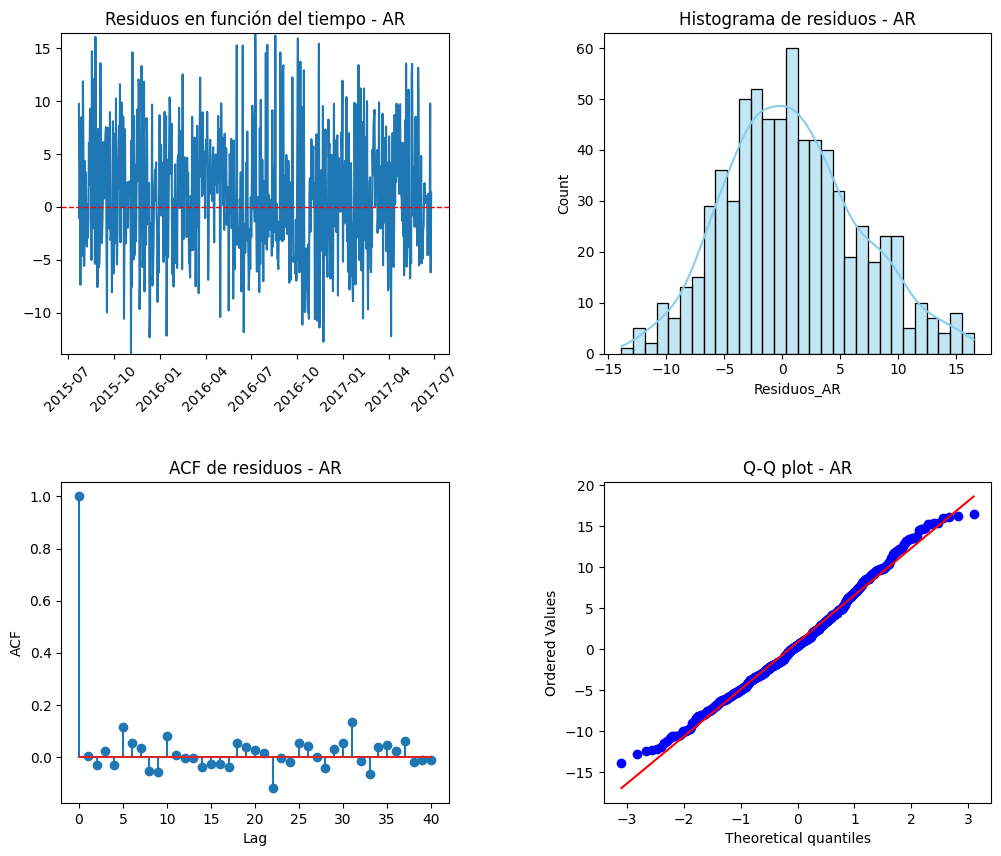

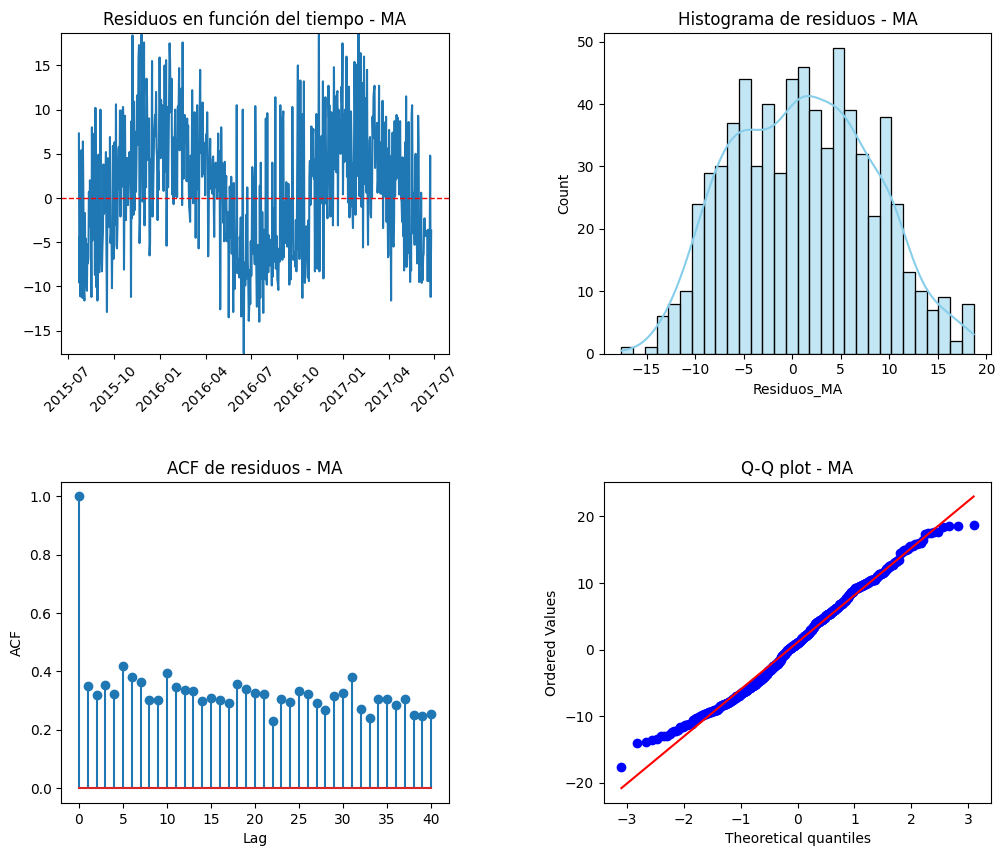

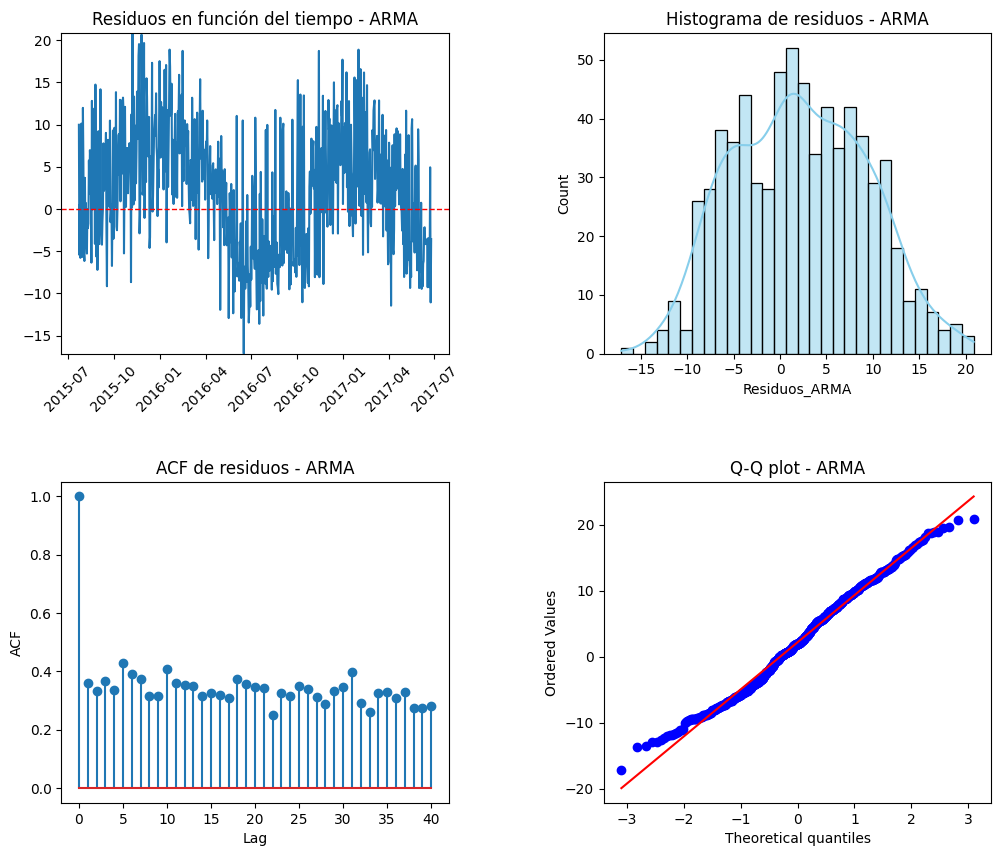

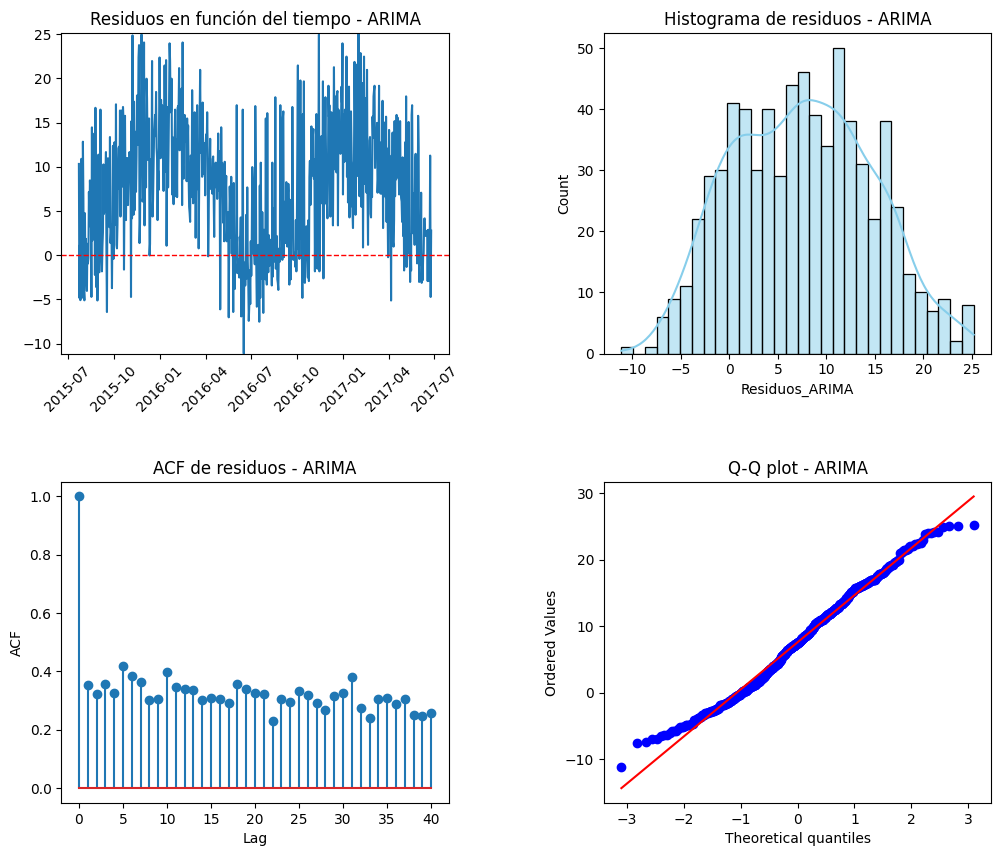

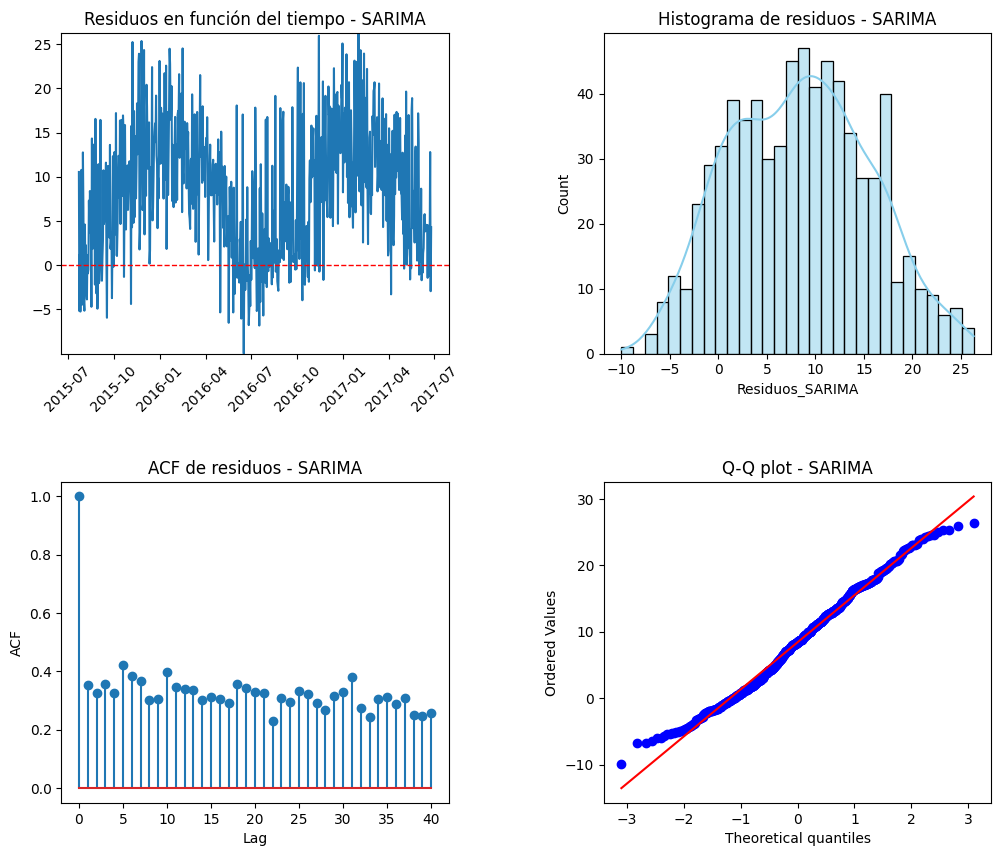

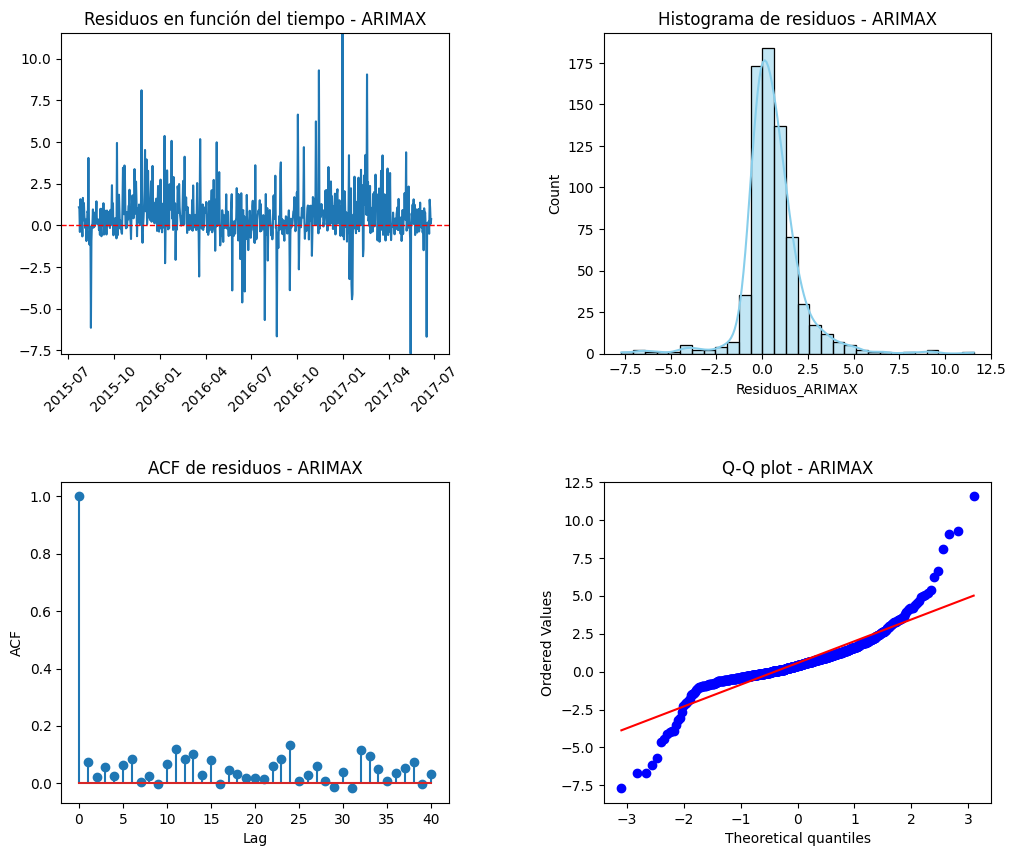

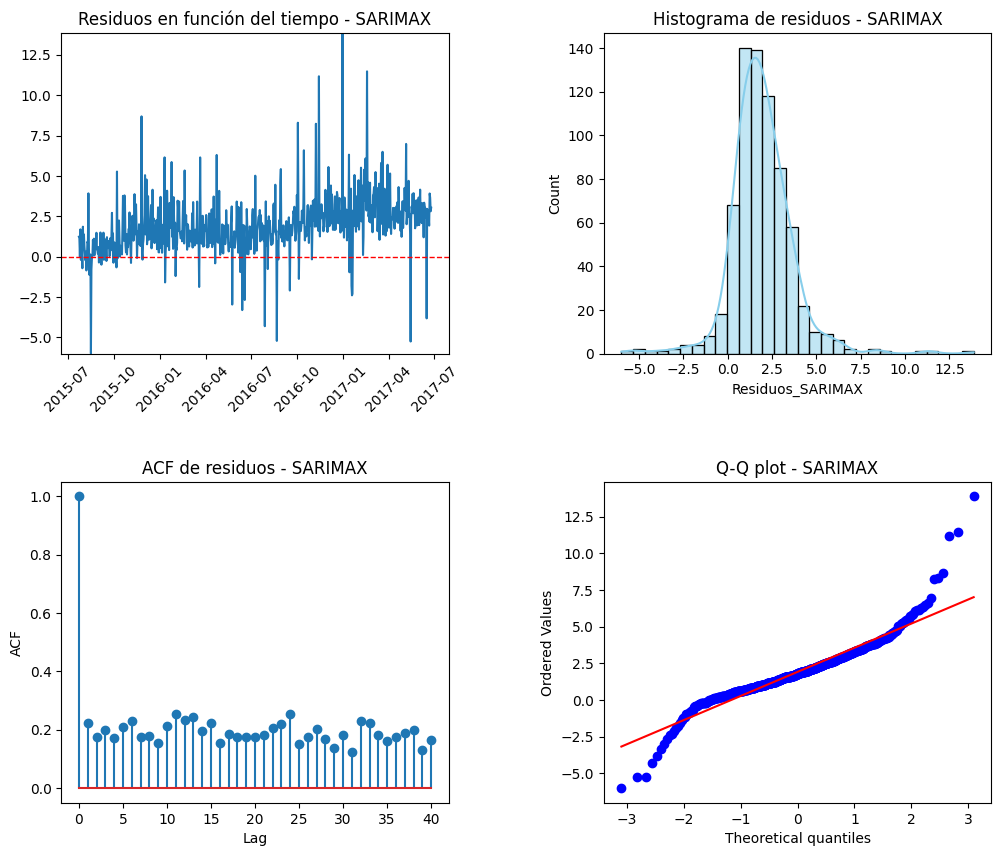

In [74]:

def plot_diagnostics(predicciones, modelo):
    residuos = y_test.values - predicciones
    residuos_df = pd.DataFrame({"Fecha": y_test.index, f"Residuos_{modelo}": residuos})

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Residuos en función del tiempo
    axes[0, 0].plot(residuos_df["Fecha"], residuos_df[f"Residuos_{modelo}"])
    axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1)  # Agregar línea en cero
    axes[0, 0].set_title(f'Residuos en función del tiempo - {modelo}')
    axes[0, 0].set_ylim([min(residuos_df[f"Residuos_{modelo}"]), max(residuos_df[f"Residuos_{modelo}"])])  # Ajustar la escala del eje y
    axes[0, 0].tick_params(axis='x', rotation=45)  # Ajustar el formato de las etiquetas del eje x

    # Histograma de los residuos
    sns.histplot(residuos_df[f"Residuos_{modelo}"], bins=30, ax=axes[0, 1], kde=True, color='skyblue', edgecolor='black')
    axes[0, 1].set_title(f'Histograma de residuos - {modelo}')

    # ACF de los residuos
    acf = [1. if lag == 0 else np.corrcoef(residuos[:-lag], residuos[lag:])[0, 1] for lag in range(41)]
    axes[1, 0].stem(np.arange(41), acf)
    axes[1, 0].set_title(f'ACF de residuos - {modelo}')
    axes[1, 0].set_xlabel('Lag')
    axes[1, 0].set_ylabel('ACF')

    # Q-Q plot de los residuos
    stats.probplot(residuos_df[f"Residuos_{modelo}"], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title(f'Q-Q plot - {modelo}')

    # Ajustar manualmente el espaciado entre subparcelas
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.show()
    
plot_diagnostics(pred_AR, 'AR')
plot_diagnostics(pred_MA, 'MA')
plot_diagnostics(pred_ARMA, 'ARMA')
plot_diagnostics(pred_ARIMA, 'ARIMA')
plot_diagnostics(pred_SARIMA, 'SARIMA')
plot_diagnostics(pred_ARIMAX, 'ARIMAX')
plot_diagnostics(pred_SARIMAX, 'SARIMAX')


# REDES NEURONALES

In [75]:
# Crear tabla con las métricas de cada modelo
tabla = pd.DataFrame({'Metrica':['MAE:','MAPE:','RMSE:','RMSPE:','r2:'],
                      'SimpleRNN':[mae_RNN,mape_RNN,rmse_RNN,rmspe_RNN,r2_RNN],
                      'LSTM':[mae_LSTM,mape_LSTM,rmse_LSTM,rmspe_LSTM,r2_LSTM],
                      'GRU':[mae_LSTM,mape_LSTM,rmse_LSTM,rmspe_LSTM,r2_GRU]})

# Redondear los valores de la tabla a dos decimales
tabla = tabla.round(2)

#  Mostrar tabla
tabla

Metrica  SimpleRNN  LSTM   GRU
0    MAE:       1.08  1.14  1.14
1   MAPE:       0.05  0.05  0.05
2   RMSE:       1.62  1.73  1.73
3  RMSPE:       0.09  0.14  0.14
4     r2:       0.95  0.94  0.95

In [76]:

# Definir función para realizar las pruebas de diagnóstico
def diagnostico_nn(predicciones):
    # Calcular residuos
    residuos = y_test.values - predicciones.ravel()

    # Prueba de Normalidad
    stat_normalidad, p_normalidad = shapiro(residuos)
    resultado_normalidad = "Distribución normal" if p_normalidad >= 0.05 else "No sigue una distribución normal"

    # Prueba de Heterocedasticidad
    stat_heterocedasticidad, p_heterocedasticidad = bartlett(residuos, np.arange(len(residuos)))
    resultado_heterocedasticidad = "Homocedástico" if p_heterocedasticidad >= 0.05 else "Heterocedástico"

    # Mostrar resultados
    print("Prueba de Normalidad:")
    print(f"  - Estadístico: {stat_normalidad}")
    print(f"  - P-value: {p_normalidad}")
    print(f"  - Resultado: {resultado_normalidad}")
    print("\nPrueba de Heterocedasticidad:")
    print(f"  - Estadístico: {stat_heterocedasticidad}")
    print(f"  - P-value: {p_heterocedasticidad}")
    print(f"  - Resultado: {resultado_heterocedasticidad}")

# Realizar pruebas de diagnóstico para cada modelo de red neuronal
print("Modelo SimpleRNN:")
diagnostico_nn(pred_RNN)

print("\nModelo LSTM:")
diagnostico_nn(pred_LSTM)

print("\nModelo GRU:")
diagnostico_nn(pred_GRU)

Modelo SimpleRNN:
Prueba de Normalidad:
  - Estadístico: 0.9012984430028665
  - P-value: 6.861282486391312e-21
  - Resultado: No sigue una distribución normal

Prueba de Heterocedasticidad:
  - Estadístico: 5820.5185507294445
  - P-value: 0.0
  - Resultado: Heterocedástico

Modelo LSTM:
Prueba de Normalidad:
  - Estadístico: 0.8878648591402546
  - P-value: 3.49407998593195e-22
  - Resultado: No sigue una distribución normal

Prueba de Heterocedasticidad:
  - Estadístico: 5731.875178459102
  - P-value: 0.0
  - Resultado: Heterocedástico

Modelo GRU:
Prueba de Normalidad:
  - Estadístico: 0.8534891486417162
  - P-value: 4.994315745848392e-25
  - Resultado: No sigue una distribución normal

Prueba de Heterocedasticidad:
  - Estadístico: 5818.12828107843
  - P-value: 0.0
  - Resultado: Heterocedástico


### Prueba de Normalidad
La prueba de normalidad evalúa si los residuos del modelo siguen una distribución normal. 

Estadístico: Es el valor del estadístico de prueba calculado. Dependiendo de la prueba, este valor tiene una interpretación específica en relación a la distribución de los residuos.

P-value: Es el valor p de la prueba. Un valor p bajo (generalmente menor a 0.05) indica que los residuos no siguen una distribución normal.

Resultado: Basado en el valor p, se concluye si los residuos siguen una distribución normal o no.

Para todos los modelos (SimpleRNN, LSTM y GRU), el valor p es extremadamente bajo (cercano a cero), lo que indica que los residuos no siguen una distribución normal.

### Prueba de Heterocedasticidad
La prueba de heterocedasticidad evalúa si los residuos tienen una varianza constante (homocedasticidad) o si la varianza cambia (heterocedasticidad) a lo largo de los valores predichos.

Estadístico: Es el valor del estadístico de prueba calculado. Este valor evalúa la varianza de los residuos.

P-value: Es el valor p de la prueba. Un valor p bajo (generalmente menor a 0.05) indica que hay heterocedasticidad (la varianza de los residuos no es constante).

Resultado: Basado en el valor p, se concluye si hay heterocedasticidad o no.

Para todos los modelos (SimpleRNN, LSTM y GRU), el valor p es extremadamente bajo (cercano a cero), lo que indica que los residuos son heterocedásticos (no tienen una varianza constante).

Todos los modelos muestran residuos que no siguen una distribución normal y presentan heterocedasticidad. Esto indica que hay problemas en los modelos que podrían necesitar atención, como mejorar la arquitectura del modelo, ajustar hiperparámetros, o aplicar técnicas para manejar la heterocedasticidad y mejorar la normalidad de los residuos.

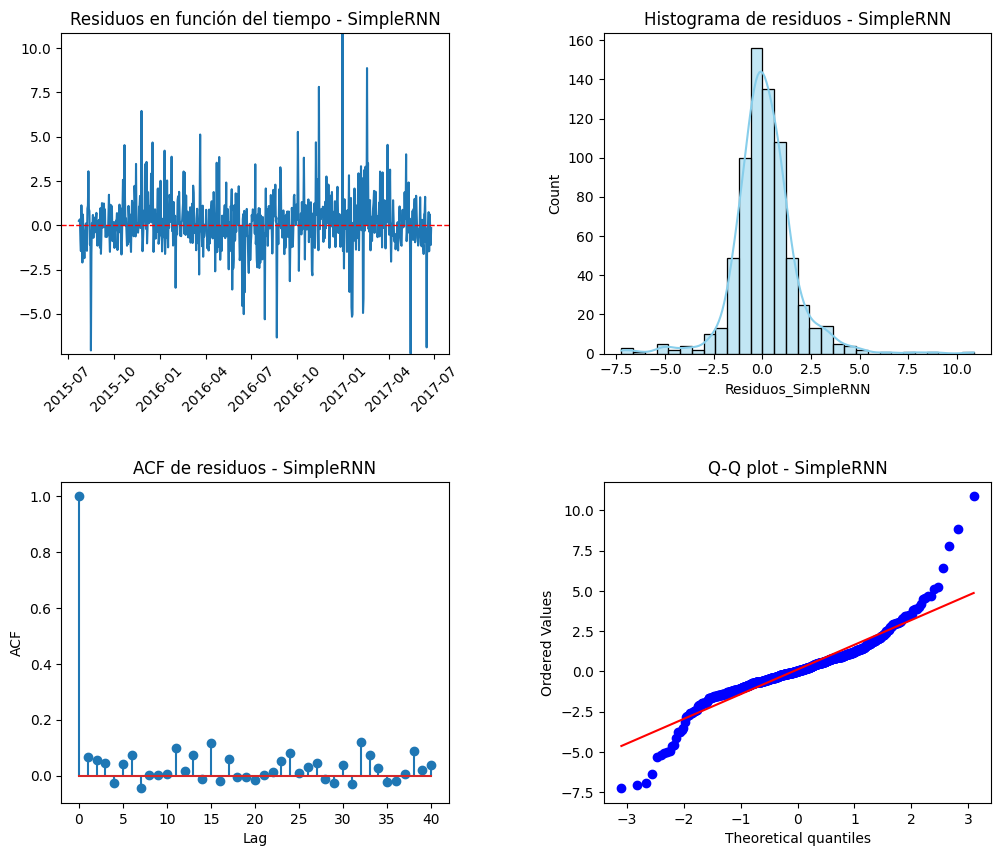

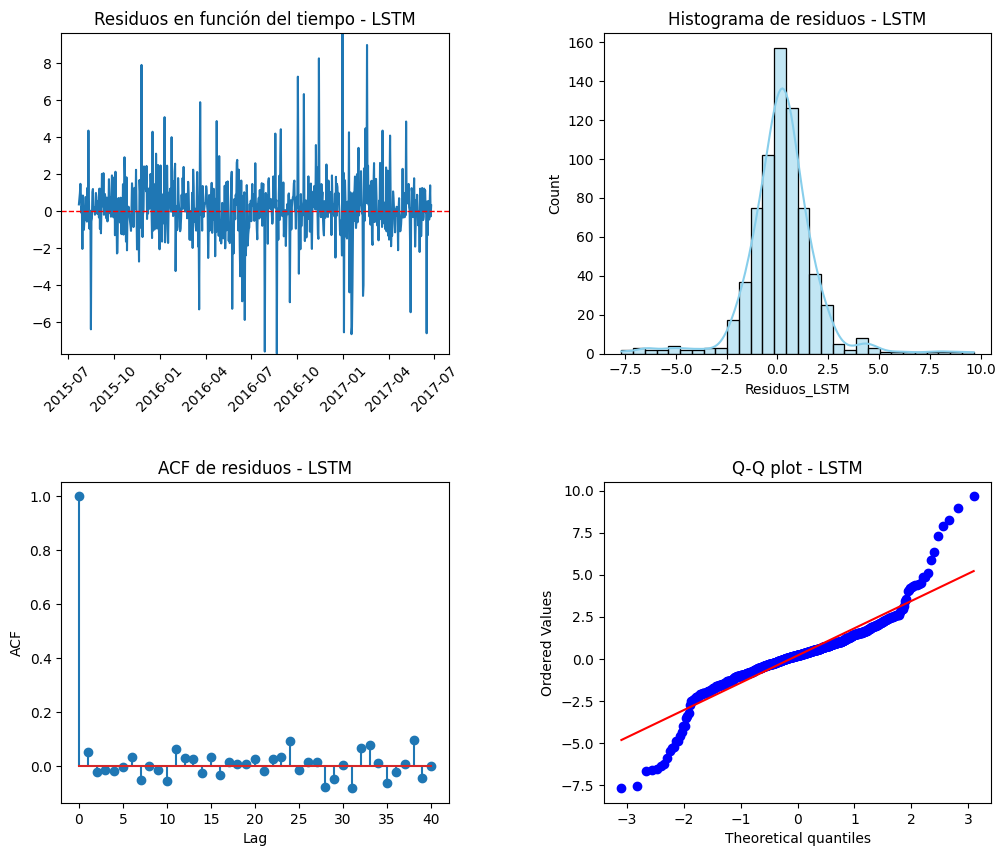

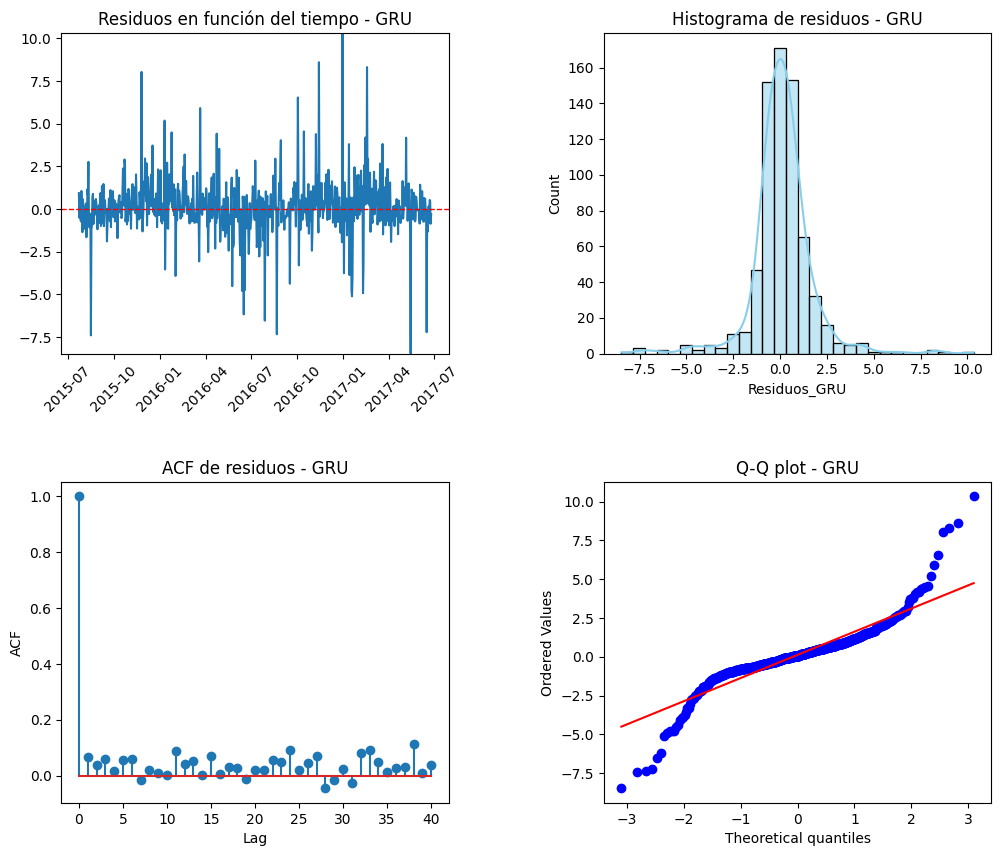

In [77]:

def plot_diagnostics_nn(y_test, predicciones, modelo):
    residuos = y_test.values - predicciones.flatten()
    residuos_df = pd.DataFrame({"Fecha": y_test.index, f"Residuos_{modelo}": residuos})

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Residuos en función del tiempo
    axes[0, 0].plot(residuos_df["Fecha"], residuos_df[f"Residuos_{modelo}"])
    axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1)  # Agregar línea en cero
    axes[0, 0].set_title(f'Residuos en función del tiempo - {modelo}')
    axes[0, 0].set_ylim([min(residuos_df[f"Residuos_{modelo}"]), max(residuos_df[f"Residuos_{modelo}"])])  # Ajustar la escala del eje y
    axes[0, 0].tick_params(axis='x', rotation=45)  # Ajustar el formato de las etiquetas del eje x

    # Histograma de los residuos
    sns.histplot(residuos_df[f"Residuos_{modelo}"], bins=30, ax=axes[0, 1], kde=True, color='skyblue', edgecolor='black')
    axes[0, 1].set_title(f'Histograma de residuos - {modelo}')

    # ACF de los residuos
    acf = [1. if lag == 0 else np.corrcoef(residuos[:-lag], residuos[lag:])[0, 1] for lag in range(41)]
    axes[1, 0].stem(np.arange(41), acf)
    axes[1, 0].set_title(f'ACF de residuos - {modelo}')
    axes[1, 0].set_xlabel('Lag')
    axes[1, 0].set_ylabel('ACF')

    # Q-Q plot de los residuos
    stats.probplot(residuos_df[f"Residuos_{modelo}"], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title(f'Q-Q plot - {modelo}')

    # Ajustar manualmente el espaciado entre subparcelas
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.show()

plot_diagnostics_nn(y_test, pred_RNN, 'SimpleRNN')
plot_diagnostics_nn(y_test, pred_LSTM, 'LSTM')
plot_diagnostics_nn(y_test, pred_GRU, 'GRU')

In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Asegurarse de que se está utilizando la GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convertir tus datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# Crear DataLoader para manejo de los datos
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Definir el modelo LSTM
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size=X_train.shape[2], hidden_size=50, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.lstm2 = nn.LSTM(input_size=50, hidden_size=50, num_layers=1, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.dropout(x)
        x, _ = self.lstm2(x)
        x = self.dropout(x)
        x = x[:, -1, :]  # Tomar la última salida de la secuencia LSTM
        x = self.fc(x)
        return x

# Inicializar el modelo, el criterio de pérdida y el optimizador
model = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Definir los callbacks de PyTorch (EarlyStopping manual)
class EarlyStopping:
    def __init__(self, patience=10, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model = None

    def __call__(self, val_loss, model):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            self.best_model = model.state_dict()
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
                model.load_state_dict(self.best_model)
                if self.verbose:
                    print("Early stopping")

# Entrenar el modelo
def train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=100):
    early_stopping = EarlyStopping(patience=10, verbose=True)
    
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(test_loader.dataset)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        early_stopping(val_loss, model)

        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

    return model, train_losses, val_losses

# Entrenar el modelo
model, train_losses, val_losses = train_model(model, criterion, optimizer, train_loader, test_loader)
# Guardar el modelo entrenado
model_path = 'best_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved as {model_path}")

Using device: cuda
Epoch 1/100, Train Loss: 543.2953, Validation Loss: 491.0935
Epoch 2/100, Train Loss: 315.7836, Validation Loss: 228.2113
Epoch 3/100, Train Loss: 149.6913, Validation Loss: 129.8919
Epoch 4/100, Train Loss: 89.0240, Validation Loss: 85.5512
Epoch 5/100, Train Loss: 61.5528, Validation Loss: 61.0041
Epoch 6/100, Train Loss: 44.2360, Validation Loss: 44.3318
Epoch 7/100, Train Loss: 33.3983, Validation Loss: 33.6158
Epoch 8/100, Train Loss: 26.6371, Validation Loss: 26.8675
Epoch 9/100, Train Loss: 22.6318, Validation Loss: 22.2199
Epoch 10/100, Train Loss: 19.3119, Validation Loss: 18.8158
Epoch 11/100, Train Loss: 16.7341, Validation Loss: 16.1257
Epoch 12/100, Train Loss: 14.8107, Validation Loss: 14.0189
Epoch 13/100, Train Loss: 13.0506, Validation Loss: 12.3026
Epoch 14/100, Train Loss: 11.8606, Validation Loss: 10.8492
Epoch 15/100, Train Loss: 10.8919, Validation Loss: 9.6180
Epoch 16/100, Train Loss: 9.9428, Validation Loss: 8.5661
Epoch 17/100, Train Loss: 9

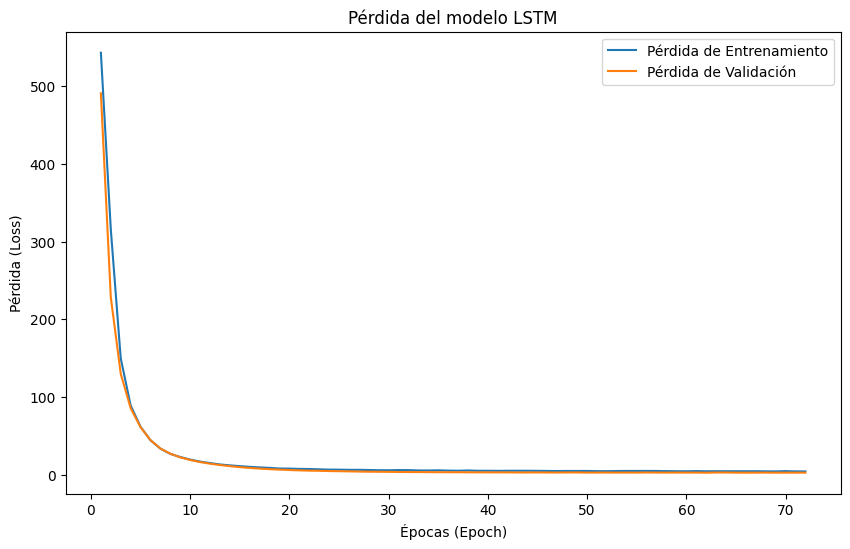

In [80]:
import matplotlib.pyplot as plt

# Función para graficar la curva de pérdida
def plot_loss_curve(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Pérdida de Entrenamiento')
    plt.plot(epochs, val_losses, label='Pérdida de Validación')
    plt.title('Pérdida del modelo LSTM')
    plt.xlabel('Épocas (Epoch)')
    plt.ylabel('Pérdida (Loss)')
    plt.legend()
    plt.show()

# Graficar la curva de pérdida
plot_loss_curve(train_losses, val_losses)


## Conclusión

 En base a los modelos vistos en clase, decidí probarlos todos a ver cual funcionaba mejor por lo cual me basé en el codigo proporcionado en el GitHub para realizar las distintas comparaciones. Llegué a la conclusión de que los modelos de redes neuronales estaban funcionando mejor en cuanto a las métricas proporcionadas, sin embargo no estaba del todo satisfecho con la curva de pérdida de los modelos ejecutados por lo cual decidí aplicar pytorch a la ecuación y así mejorar los tiempos de carga y las métricas para así obtener el resultado esperado